## Kütüphanelerin import edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('carrefoursa_urunler.csv')
df.head(13)

Ürün İsmi   Fiyat
0                      Carrefour Hindi Füme 50 G   17.95
1            Apikoğlu Dana Pastırma (Parça) 80 g  144.90
2                     Namet 7/24 Hindi Füme 60 G   22.00
3                     Carrefour Hindi Salam 50 G   14.50
4                Carrefour Dana Macar Salam 50 G   25.50
5                    Namet 7/24 Hindi Salam 60 G   17.60
6          Apikoğlu Parmak Fermente Sucuk 200 Gr  199.90
7                Pınar Sucuk Mangal Keyfi 300 Gr  119.90
8   Sultan Isıl İşlem Görmüş Kangal Sucuk 200 Gr   89.90
9                      Namet Kangal Sucuk 200 Gr  218.50
10                 Banvit Jumbo Sosis 4'lü 330 G   68.00
11              Namet 7/24 Dana Macar Salam 60 G   34.85
12                    Pınar Aç Bitir Salam 75 Gr   30.50

## Veri Düzenleme

In [2]:
# Gramajı ayırma
df['Gramaj'] = df['Ürün İsmi'].str.extract(r'(\d+)\s*([gG]|(?:[Kk][gG]))')[0]
df['Birimi'] = df['Ürün İsmi'].str.extract(r'(\d+)\s*([gG]|(?:[Kk][gG]))')[1]

# Gramajı grama çevirme
def convert_to_grams(row):
    if row['Birimi'] in ['Kg', 'kg']:
        try:
            return int(row['Gramaj']) * 1000
        except ValueError:
            return None # NaN değerlerini None olarak döndür
    else:
        try:
            return int(row['Gramaj'])
        except ValueError:
            return None # NaN değerlerini None olarak döndür

df['Gramaj (G)'] = df.apply(convert_to_grams, axis=1)

# Ürün İsmi sütununu güncelleme ve Birimi sütununu kaldırma
df['Ürün İsmi'] = df['Ürün İsmi'].str.replace(r'\s*\d+\s*[gG]|(?:[Kk][gG])', '', regex=True)
df.drop(columns=['Birimi'], inplace=True)

# Sonucu gösterme
print(df[['Ürün İsmi', 'Fiyat', 'Gramaj (G)']])

                            Ürün İsmi   Fiyat  Gramaj (G)
0                Carrefour Hindi Füme   17.95        50.0
1      Apikoğlu Dana Pastırma (Parça)  144.90        80.0
2               Namet 7/24 Hindi Füme   22.00        60.0
3               Carrefour Hindi Salam   14.50        50.0
4          Carrefour Dana Macar Salam   25.50        50.0
..                                ...     ...         ...
298                Aytaç Hindi Salamr  137.90       500.0
299        Banvit Piliç Kokteyl Sosis  102.50       500.0
300                 Mr.No Tavuk Dürüm   75.00       135.0
301                    Mr.No Kruvasan   99.90       100.0
302  Mr.No Humus Klasik Kıtır Ekmekli   74.90       130.0

[303 rows x 3 columns]


In [3]:
df.drop(columns=['Gramaj'], inplace=True)

In [4]:
df.fillna(1000, inplace=True)

In [5]:
df.head(50)

Ürün İsmi   Fiyat  Gramaj (G)
0                       Carrefour Hindi Füme   17.95        50.0
1             Apikoğlu Dana Pastırma (Parça)  144.90        80.0
2                      Namet 7/24 Hindi Füme   22.00        60.0
3                      Carrefour Hindi Salam   14.50        50.0
4                 Carrefour Dana Macar Salam   25.50        50.0
5                     Namet 7/24 Hindi Salam   17.60        60.0
6            Apikoğlu Parmak Fermente Sucukr  199.90       200.0
7                  Pınar Sucuk Mangal Keyfir  119.90       300.0
8     Sultan Isıl İşlem Görmüş Kangal Sucukr   89.90       200.0
9                        Namet Kangal Sucukr  218.50       200.0
10                   Banvit Jumbo Sosis 4'lü   68.00       330.0
11               Namet 7/24 Dana Macar Salam   34.85        60.0
12                     Pınar Aç Bitir Salamr   30.50        75.0
13    Pınar Aç Bitir Büyük Dilim Hindi Salam   27.90        60.0
14              Pınar Aç-Bitir Kokteyl Sosis   50.50       180.0
15                     Polonez Hindi Jambonr   32.90        50.0
16        Sultan Doğalköy Açık Kangal Sucuk   399.90      1000.0
17                   Sultan Dilimli Kavurmar   99.90       100.0
18                Beşler Kokteyl Piliç Sosis   58.50       220.0
19                     Namet Piliç Füme 7/24   25.50        50.0
20                     Banvit Kokteyl Sosis   125.00      1000.0
21               Erşan Vakumlu Kangal Sucukr  135.00       200.0
22                         Namet Dana Jambon   62.50        60.0
23                    Carrefour Dana Kavurma  125.00       150.0
24                        Namet Piliç Jambon   25.25        50.0
25                          Maret Hindi Füme   59.90       110.0
26     Aytaç Şipşak Hindi Füme Dilimli Salam   30.50        60.0
27                         Pınar Gurme Sucuk  259.90       250.0
28        Carrefour Isıl İşlem Görmüş Sucukr  108.00       200.0
29                        Erşan Dana Kavurma   98.00        90.0
30                        Pınar Doyum Salamr  166.75       700.0
31           Namet Hindi Fıstıklı Salam 7/24   38.50        50.0
32                  Maret Pratik Macar Salam   34.90        50.0
33                         Pınar Sosis 10'lu  275.90       430.0
34  Carrefour Çemeni Sıyrılmış Dana Pastırma  171.90       120.0
35                  Banvit Piliç Macar Salam   38.00       250.0
36                       Polonez Piliç Fümer   25.90        50.0
37                  Erşan Dana Antrikot Füme  165.00       100.0
38       Pınar Aç Bitir Hindi Fıstıklı Salam   29.00        50.0
39                       Pınar Klasik Sucukr  195.90       225.0
40                   Aytaç Dana Kangal Sucuk  209.25       220.0
41                   Namet Hindi Füme Paketr   88.00       200.0
42                Namet Dilimli Jambon Tavuk   70.50       150.0
43                  Banvit Piliç Baton Sucuk  104.25       450.0
44                Maret 10'lu Soyulmuş Sosis  279.00       432.0
45                        Pınar Minik Sosisr  165.90       215.0
46                      Polonez Kangal Sucuk  189.90       180.0
47    Polonez Tütsülenmiş Piliç Jumbo Sosisr   89.90       320.0
48                         Dana Kangal Sucuk  186.90       200.0
49                  Namet Dana Kavurma Kare   899.90      1000.0

In [6]:
df['Marka'] = df['Ürün İsmi'].str.split().str[0]  # İlk kelimeyi al
df['Ürün İsmi'] = df['Ürün İsmi'].str.replace(r'^\S+\s+', '', regex=True)  # İlk kelimeyi sil

In [7]:
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('Marka')))
df = df[cols]

In [8]:
df.head(13)

Marka                        Ürün İsmi   Fiyat  Gramaj (G)
0   Carrefour                       Hindi Füme   17.95        50.0
1    Apikoğlu            Dana Pastırma (Parça)  144.90        80.0
2       Namet                  7/24 Hindi Füme   22.00        60.0
3   Carrefour                      Hindi Salam   14.50        50.0
4   Carrefour                 Dana Macar Salam   25.50        50.0
5       Namet                 7/24 Hindi Salam   17.60        60.0
6    Apikoğlu           Parmak Fermente Sucukr  199.90       200.0
7       Pınar              Sucuk Mangal Keyfir  119.90       300.0
8      Sultan  Isıl İşlem Görmüş Kangal Sucukr   89.90       200.0
9       Namet                    Kangal Sucukr  218.50       200.0
10     Banvit                 Jumbo Sosis 4'lü   68.00       330.0
11      Namet            7/24 Dana Macar Salam   34.85        60.0
12      Pınar                  Aç Bitir Salamr   30.50        75.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Marka       303 non-null    object 
 1   Ürün İsmi   303 non-null    object 
 2   Fiyat       303 non-null    float64
 3   Gramaj (G)  303 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.6+ KB


In [10]:
df["Marka"].unique()

array(['Carrefour', 'Apikoğlu', 'Namet', 'Pınar', 'Sultan', 'Banvit',
       'Polonez', 'Beşler', 'Erşan', 'Maret', 'Aytaç', 'Dana',
       'Cumhuriyet', 'Riva', 'Tada', 'Mr.', 'Fümeci', 'Torku',
       'Başyazıcı', 'Mr.No', 'Piliç', 'Yayla', 'Yaylatürk', 'Dardanel'],
      dtype=object)

In [11]:
# Marka bazında toplam fiyatları hesaplama
marka_fiyatlari = df.groupby('Marka')['Fiyat'].sum().reset_index()

# Markaların toplam fiyatlarına göre sıralama
marka_fiyatlari = marka_fiyatlari.sort_values(by='Fiyat', ascending=False)

# En pahalı markayı belirleme
en_pahali_marka = marka_fiyatlari.iloc[0]

print(marka_fiyatlari)
print("\nEn pahalı marka:")
print(en_pahali_marka)


         Marka     Fiyat
10      Fümeci  57278.20
16     Polonez  50334.35
14       Namet  26129.35
0     Apikoğlu  16885.30
3    Başyazıcı   8262.30
22       Yayla   5590.10
9        Erşan   5519.00
19      Sultan   3857.75
21       Torku   2999.70
6   Cumhuriyet   2390.00
17       Pınar   2146.45
11       Maret   2060.00
12         Mr.   1483.90
1        Aytaç   1428.10
23   Yaylatürk   1159.90
20        Tada   1015.00
13       Mr.No    629.60
4       Beşler    529.15
5    Carrefour    462.85
2       Banvit    456.75
18        Riva    410.50
15       Piliç    257.50
7         Dana    186.90
8     Dardanel    104.90

En pahalı marka:
Marka     Fümeci
Fiyat    57278.2
Name: 10, dtype: object


In [18]:

fumeci_products = df[df['Marka'] == 'Fümeci']

# Fiyata göre sırala ve en düşük fiyatlı ürünü al
en_dusuk_fiyatli_fumeci_urun = fumeci_products.loc[fumeci_products['Fiyat'].idxmin()]

print("Markası Fümeci olan en düşük fiyatlı ürün:")
print(en_dusuk_fiyatli_fumeci_urun)


Markası Fümeci olan en düşük fiyatlı ürün:
Marka                          Fümeci
Ürün İsmi     Wasabi&Cheddarlı Sosis 
Fiyat                           819.9
Gramaj (G)                     1000.0
Name: 279, dtype: object


In [17]:
df.loc[df['Marka'] == 'Fümeci']

Marka                              Ürün İsmi   Fiyat  Gramaj (G)
126  Fümeci                       Kontrafile Füme   2399.9      1000.0
127  Fümeci                         Antrikot Füme   2439.0      1000.0
128  Fümeci                            Dana Cotto   2199.9      1000.0
129  Fümeci                            Kuzu Cotto   2549.9      1000.0
130  Fümeci                   Hindi But Füme Sade   1119.9      1000.0
131  Fümeci                 Hindi But Karabiberli   1179.9      1000.0
132  Fümeci             Atıştırmalık Et Çubukları   2089.0      1000.0
133  Fümeci            Dilimli Dana Roastbef Sade   2299.9      1000.0
134  Fümeci                  Dilimli Dana Bresola   2999.9      1000.0
135  Fümeci                            Dana Bacon   2029.9      1000.0
136  Fümeci                           Baton Sucuk   1529.9      1000.0
164  Fümeci                 Fermente Kangal Sucuk   1559.9      1000.0
165  Fümeci  Fermente Dilimli Chorizo Acılı Sucuk   2349.9      1000.0
194  Fümeci                      Tavuk Füme Göğüs    829.9      1000.0
237  Fümeci         Sucuk Fıstıklı Hellimli Baton   1539.9      1000.0
239  Fümeci                Sosis Dana Frankfurter   1279.9      1000.0
240  Fümeci              Dilimli Hindi Göğüs Füme   1129.9      1000.0
241  Fümeci                 Dilimli Dana Dil Füme   3099.9      1000.0
242  Fümeci                         İtalyan Salam   2089.0      1000.0
250  Fümeci                         Kuru Et Baton   2724.0      1000.0
251  Fümeci                  Kafkas Usulü Füme Et   2949.9      1000.0
252  Fümeci                  Sosis Dana Bratwurst   1279.9      1000.0
253  Fümeci     Sosis Dana Bbq Jalapeno-Ched.Pey.   1359.9      1000.0
263  Fümeci     Dilimli Dana Roasbeef Karabiberli   2329.9      1000.0
264  Fümeci                               Krakova   1079.9      1000.0
265  Fümeci                 Biberli İtalyan Salam   2189.9      1000.0
266  Fümeci                       Gravyerli Sosis   1359.9      1000.0
276  Fümeci  Smokehouse Cheddarlı Bratwurst Sosis   1359.9      1000.0
277  Fümeci          Frankfurter Emmentalli Sosis   1359.9      1000.0
279  Fümeci                Wasabi&Cheddarlı Sosis    819.9      1000.0
281  Fümeci              Parmesanlı İtalyan Salam   1469.9      1000.0

In [16]:
df = df.drop(index=275) # Aykırı veriyi sildim

## İstatistiksel Analiz


In [20]:
import pandas as pd

def marka_analizi(df):
    # Boş bir sonuç listesi
    analiz_sonuclari = []

    # Her markaya göre gruplama yaparak analiz yap
    for marka, grup in df.groupby('Marka'):
        # Her markanın ürün sayısı
        toplam_urun_sayisi = grup.shape[0]

        # Fiyat analizi (ortalama, maksimum, minimum)
        ortalama_fiyat = grup['Fiyat'].mean()
        max_fiyat = grup['Fiyat'].max()
        min_fiyat = grup['Fiyat'].min()

        # Gramaj analizi (ortalama, maksimum, minimum)
        ortalama_gramaj = grup['Gramaj (G)'].mean()
        max_gramaj = grup['Gramaj (G)'].max()
        min_gramaj = grup['Gramaj (G)'].min()

        # Fiyat/Gramaj oranı (ortalama)
        fiyat_gramaj_orani = (grup['Fiyat'] / grup['Gramaj (G)']).mean()

        # Sonuçları bir sözlük halinde depolayalım
        analiz_sonuclari.append({
            'Marka': marka,
            'Toplam Ürün Sayısı': toplam_urun_sayisi,
            'Ortalama Fiyat': round(ortalama_fiyat, 2),
            'Max Fiyat': round(max_fiyat, 2),
            'Min Fiyat': round(min_fiyat, 2),
            'Ortalama Gramaj': round(ortalama_gramaj, 2),
            'Max Gramaj': round(max_gramaj, 2),
            'Min Gramaj': round(min_gramaj, 2),
            'Fiyat/Gramaj Oranı': round(fiyat_gramaj_orani, 2)
        })

    # Sonuçları bir DataFrame'e çevir
    sonuc_df = pd.DataFrame(analiz_sonuclari)

    # Fiyat/Gramaj oranına göre sıralayarak döndür
    return sonuc_df.sort_values(by='Fiyat/Gramaj Oranı', ascending=False)

# Fonksiyonu veri seti üzerinde çalıştır
sonuclar = marka_analizi(df)
print(sonuclar)


         Marka  Toplam Ürün Sayısı  Ortalama Fiyat  Max Fiyat  Min Fiyat  \
10      Fümeci                  31         1838.65    3099.90     819.90   
0     Apikoğlu                  21          804.06    2799.90     129.90   
3    Başyazıcı                  15          550.82    1399.90      90.50   
22       Yayla                   7          798.59    1359.90     163.50   
6   Cumhuriyet                   2         1195.00    1195.00    1195.00   
16     Polonez                  59          853.12    3479.90      25.90   
23   Yaylatürk                   1         1159.90    1159.90    1159.90   
19      Sultan                   7          551.11    1599.90      52.00   
9        Erşan                  15          367.93    1099.90      49.00   
21       Torku                   3          999.90    1399.90     799.90   
7         Dana                   1          186.90     186.90     186.90   
14       Namet                  43          607.66    2079.90      17.60   
12         M

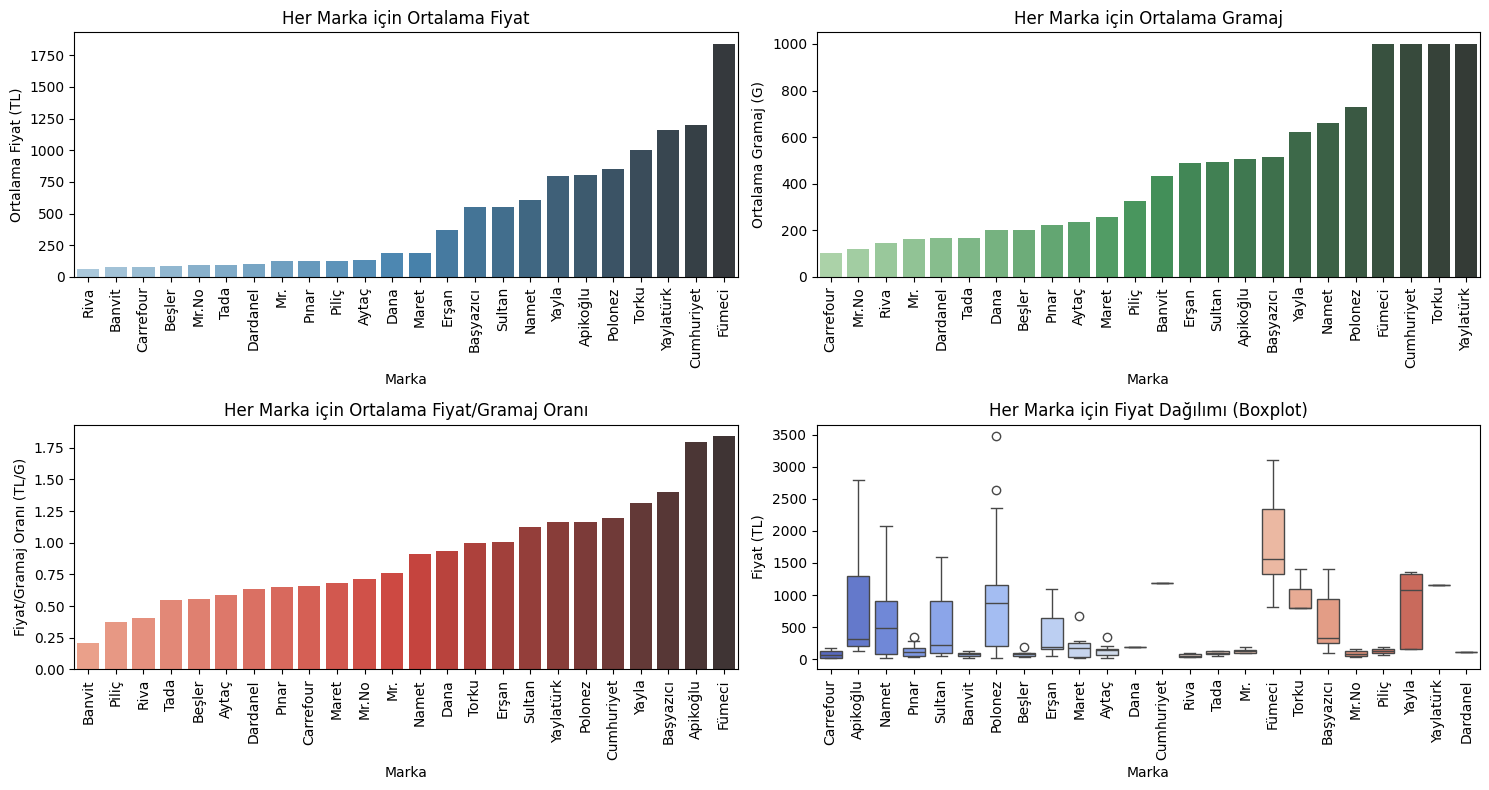

In [23]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def marka_gorsel_analizi(df):
    # Görselleştirme ayarları
    plt.figure(figsize=(15, 8))

    # Her marka için ortalama fiyat grafiği
    plt.subplot(2, 2, 1)
    ortalama_fiyat = df.groupby('Marka')['Fiyat'].mean().sort_values()
    sns.barplot(x=ortalama_fiyat.index, y=ortalama_fiyat.values, palette='Blues_d')
    plt.title('Her Marka için Ortalama Fiyat')
    plt.xticks(rotation=90)
    plt.ylabel('Ortalama Fiyat (TL)')

    # Her marka için ortalama gramaj grafiği
    plt.subplot(2, 2, 2)
    ortalama_gramaj = df.groupby('Marka')['Gramaj (G)'].mean().sort_values()
    sns.barplot(x=ortalama_gramaj.index, y=ortalama_gramaj.values, palette='Greens_d')
    plt.title('Her Marka için Ortalama Gramaj')
    plt.xticks(rotation=90)
    plt.ylabel('Ortalama Gramaj (G)')

    # Her marka için Fiyat/Gramaj Oranı
    plt.subplot(2, 2, 3)
    df['Fiyat/Gramaj Oranı'] = df['Fiyat'] / df['Gramaj (G)']
    fiyat_gramaj_orani = df.groupby('Marka')['Fiyat/Gramaj Oranı'].mean().sort_values()
    sns.barplot(x=fiyat_gramaj_orani.index, y=fiyat_gramaj_orani.values, palette='Reds_d')
    plt.title('Her Marka için Ortalama Fiyat/Gramaj Oranı')
    plt.xticks(rotation=90)
    plt.ylabel('Fiyat/Gramaj Oranı (TL/G)')

    # Her marka için fiyat dağılımı (Boxplot)
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Marka', y='Fiyat', data=df, palette='coolwarm')
    plt.title('Her Marka için Fiyat Dağılımı (Boxplot)')
    plt.xticks(rotation=90)
    plt.ylabel('Fiyat (TL)')

    # Grafiklerin düzenlenmesi ve gösterimi
    plt.tight_layout()
    plt.show()

# Fonksiyonu veri seti üzerinde çalıştır
marka_gorsel_analizi(df)


## Kiloyla satılan ürünlerin analizleri

Kiloyla Satılan Ürünler İçin Sayısal Analiz:

            Ortalama_Fiyat  Ortalama_Gramaj  Adet  Fiyat_Gramaj_Orani
Marka                                                                
Fümeci         1838.654839           1000.0    31            1.838655
Apikoğlu       1544.244444           1000.0     9            1.544244
Yayla          1274.900000           1000.0     4            1.274900
Cumhuriyet     1195.000000           1000.0     2            1.195000
Polonez        1185.872500           1000.0    40            1.185873
Yaylatürk      1159.900000           1000.0     1            1.159900
Sultan         1133.233333           1000.0     3            1.133233
Torku           999.900000           1000.0     3            0.999900
Başyazıcı       964.933333           1000.0     6            0.964933
Namet           915.130769           1000.0    26            0.915131
Erşan           696.083333           1000.0     6            0.696083
Maret           679.000000           1000.0 

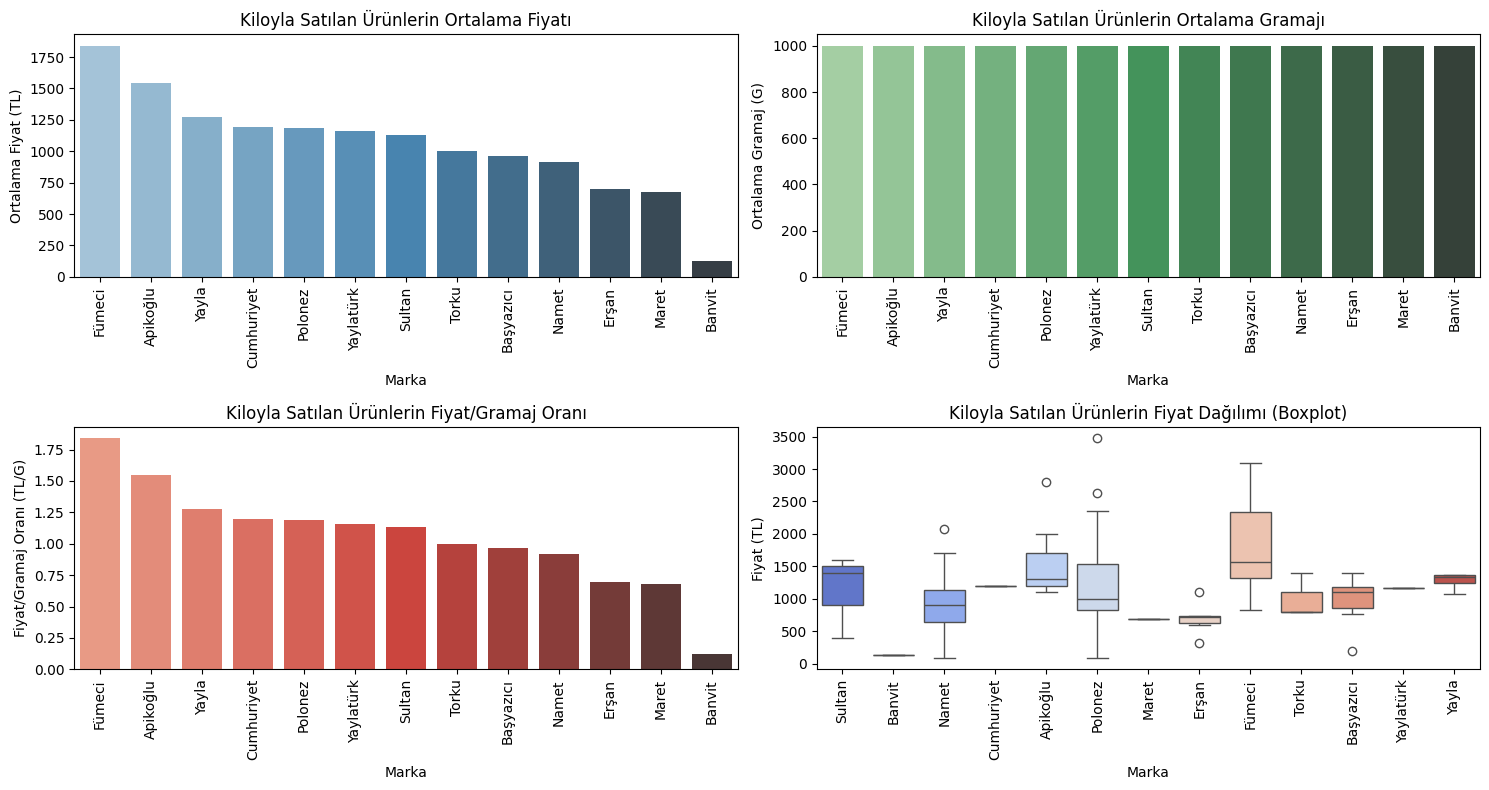

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def kilo_urun_analizi(df):
    # 1000 gram ve üzeri ürünleri filtrele
    kilo_urunler = df[df['Gramaj (G)'] >= 1000]

    # Sayısal analiz: Ortalama Fiyat, Ortalama Gramaj ve Fiyat/Gramaj Oranı
    sayisal_analiz = kilo_urunler.groupby('Marka').agg(
        Ortalama_Fiyat=('Fiyat', 'mean'),
        Ortalama_Gramaj=('Gramaj (G)', 'mean'),
        Adet=('Marka', 'count'),
        Fiyat_Gramaj_Orani=('Fiyat', lambda x: (x / kilo_urunler['Gramaj (G)']).mean())
    ).sort_values(by='Ortalama_Fiyat', ascending=False)

    # Sayısal analiz sonuçlarını göster
    print("Kiloyla Satılan Ürünler İçin Sayısal Analiz:\n")
    print(sayisal_analiz)

    # Görselleştirme ayarları
    plt.figure(figsize=(15, 8))

    # Kiloyla satılan ürünler için ortalama fiyat grafiği
    plt.subplot(2, 2, 1)
    sns.barplot(x=sayisal_analiz.index, y=sayisal_analiz['Ortalama_Fiyat'], palette='Blues_d', legend=False)
    plt.title('Kiloyla Satılan Ürünlerin Ortalama Fiyatı')
    plt.xticks(rotation=90)
    plt.ylabel('Ortalama Fiyat (TL)')

    # Kiloyla satılan ürünler için ortalama gramaj grafiği
    plt.subplot(2, 2, 2)
    sns.barplot(x=sayisal_analiz.index, y=sayisal_analiz['Ortalama_Gramaj'], palette='Greens_d', legend=False)
    plt.title('Kiloyla Satılan Ürünlerin Ortalama Gramajı')
    plt.xticks(rotation=90)
    plt.ylabel('Ortalama Gramaj (G)')

    # Kiloyla satılan ürünler için Fiyat/Gramaj Oranı
    plt.subplot(2, 2, 3)
    sns.barplot(x=sayisal_analiz.index, y=sayisal_analiz['Fiyat_Gramaj_Orani'], palette='Reds_d', legend=False)
    plt.title('Kiloyla Satılan Ürünlerin Fiyat/Gramaj Oranı')
    plt.xticks(rotation=90)
    plt.ylabel('Fiyat/Gramaj Oranı (TL/G)')

    # Kiloyla satılan ürünler için fiyat dağılımı (Boxplot)
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Marka', y='Fiyat', data=kilo_urunler, palette='coolwarm')
    plt.title('Kiloyla Satılan Ürünlerin Fiyat Dağılımı (Boxplot)')
    plt.xticks(rotation=90)
    plt.ylabel('Fiyat (TL)')

    # Grafiklerin düzenlenmesi ve gösterimi
    plt.tight_layout()
    plt.show()

# Fonksiyonu veri seti üzerinde çalıştır
kilo_urun_analizi(df)


## Her ürün için ayrı ayrı istatistiksel ve görsel analiz

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Carrefour Analizi ===
Ortalama Fiyat: 77.14 TL
Min Fiyat: 14.50 TL, Max Fiyat: 171.90 TL
Ortalama Gramaj: 103.33 g
Min Gramaj: 50.00 g, Max Gramaj: 200.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6608 TL/g
Ürün Çeşitliliği: 6 çeşit ürün
Carrefour pazarda fiyat açısından uygun bir segmentte.


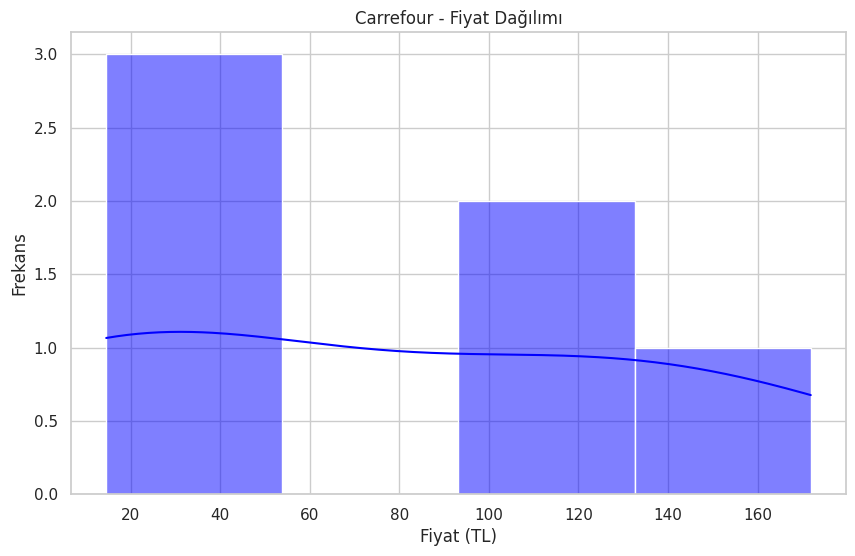

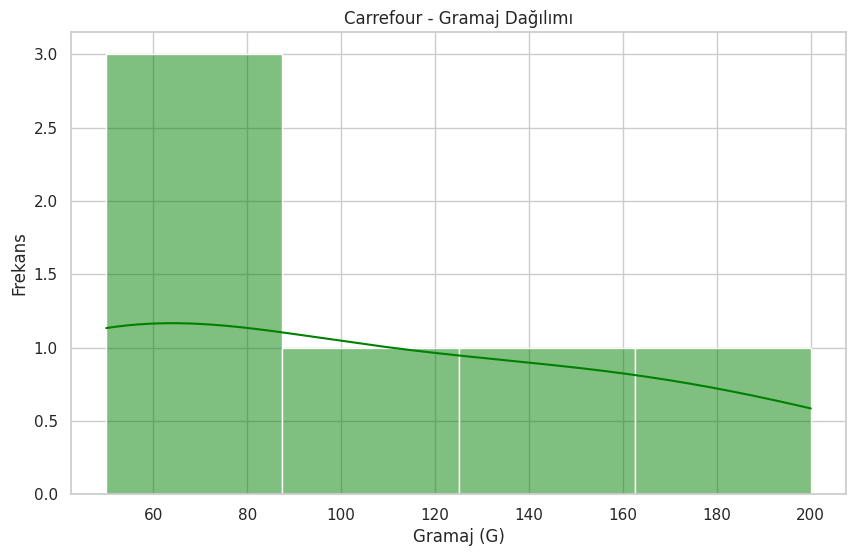

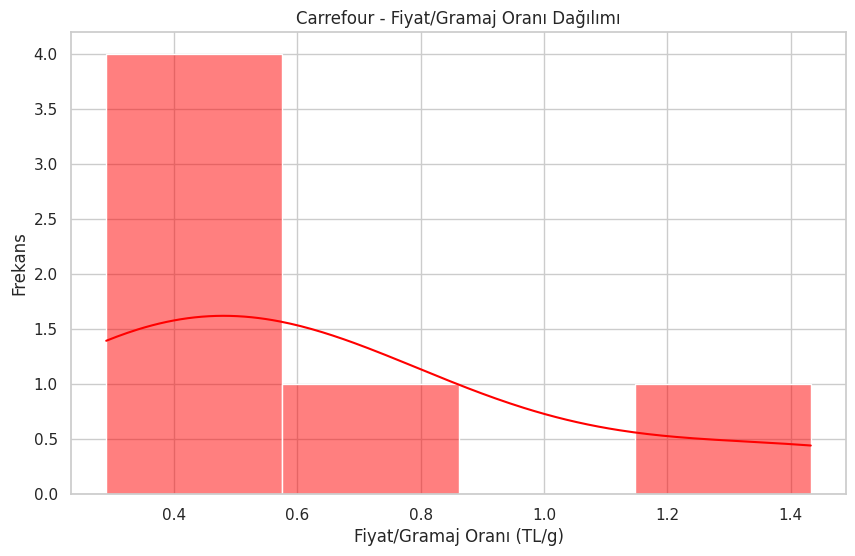

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Apikoğlu Analizi ===
Ortalama Fiyat: 804.06 TL
Min Fiyat: 129.90 TL, Max Fiyat: 2799.90 TL
Ortalama Gramaj: 508.10 g
Min Gramaj: 80.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.7934 TL/g
Ürün Çeşitliliği: 21 çeşit ürün
Apikoğlu pazarda fiyat açısından premium bir segmentte.


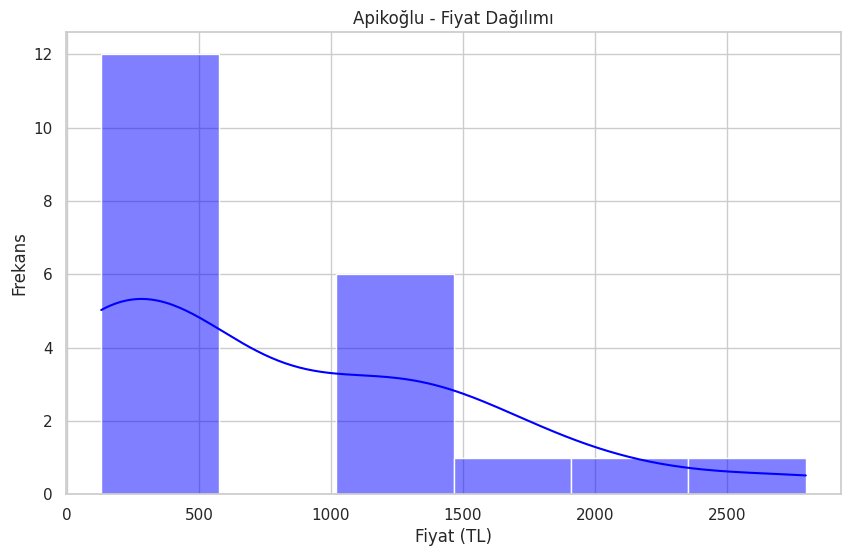

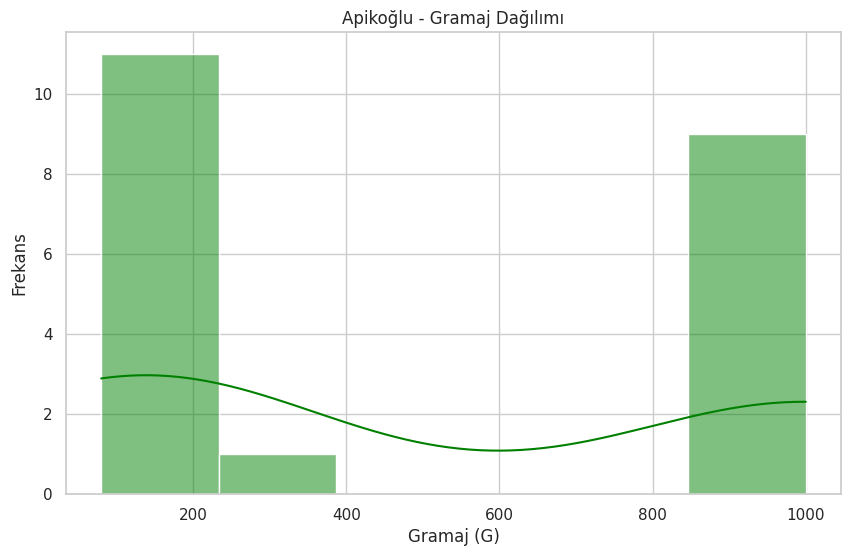

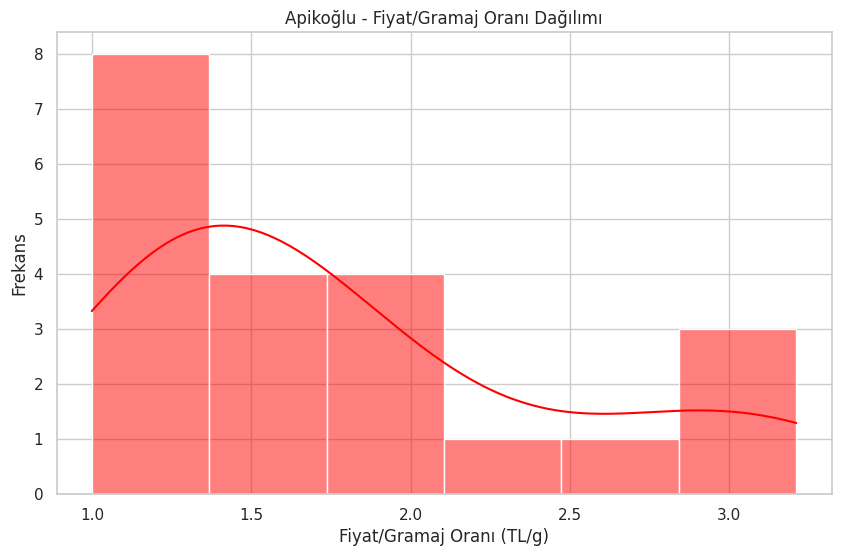

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Namet Analizi ===
Ortalama Fiyat: 607.66 TL
Min Fiyat: 17.60 TL, Max Fiyat: 2079.90 TL
Ortalama Gramaj: 660.47 g
Min Gramaj: 50.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.9091 TL/g
Ürün Çeşitliliği: 43 çeşit ürün
Namet pazarda fiyat açısından uygun bir segmentte.


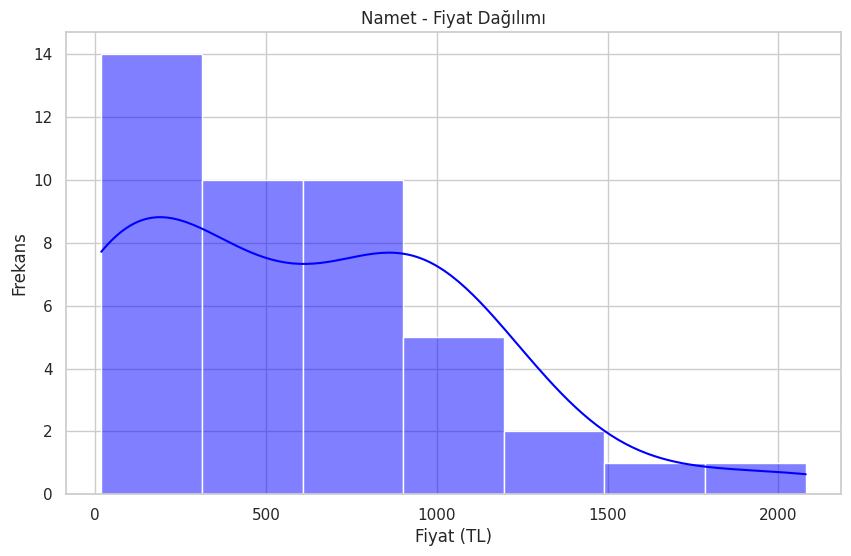

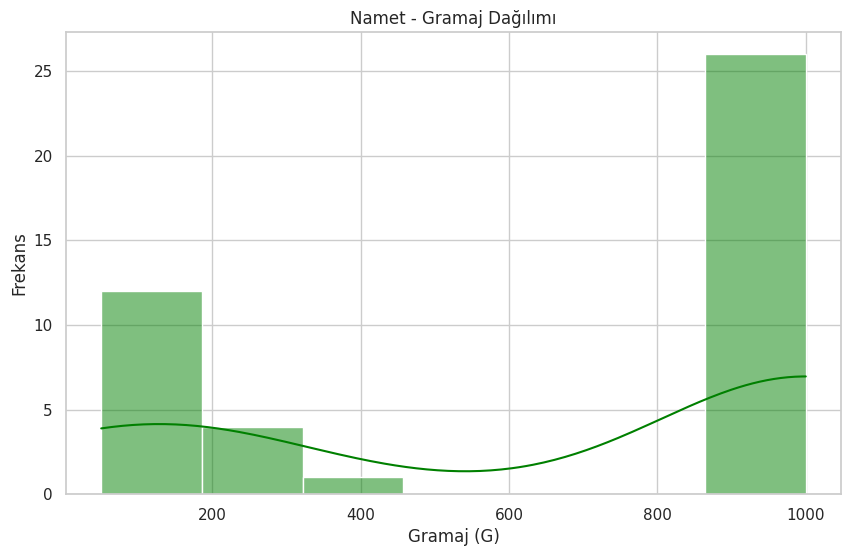

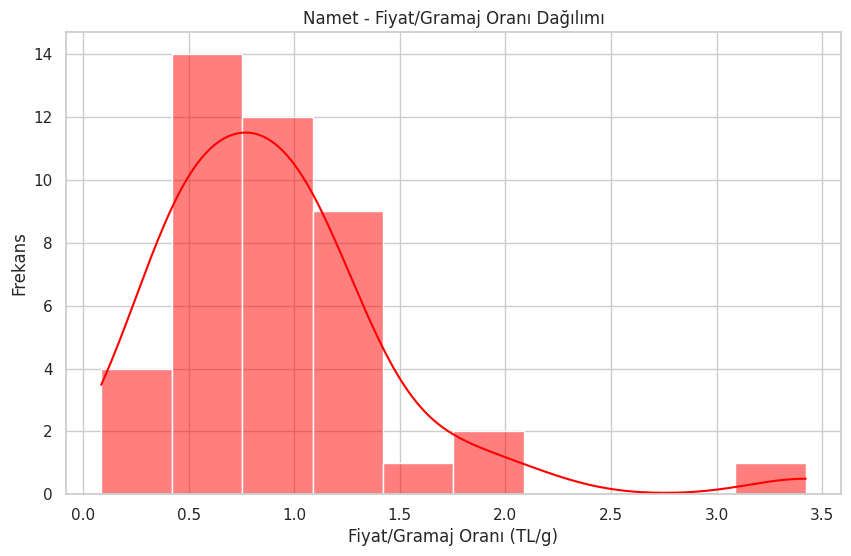

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Pınar Analizi ===
Ortalama Fiyat: 126.26 TL
Min Fiyat: 27.90 TL, Max Fiyat: 339.50 TL
Ortalama Gramaj: 223.24 g
Min Gramaj: 50.00 g, Max Gramaj: 700.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6537 TL/g
Ürün Çeşitliliği: 17 çeşit ürün
Pınar pazarda fiyat açısından uygun bir segmentte.


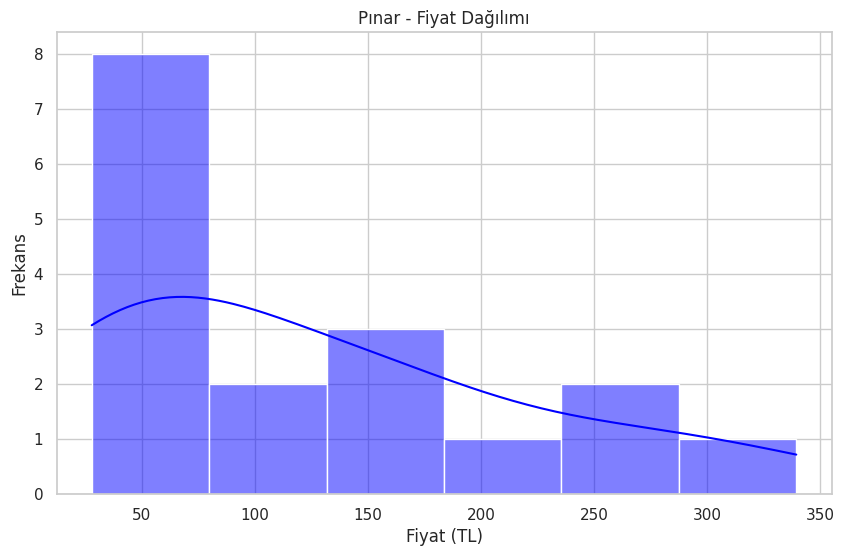

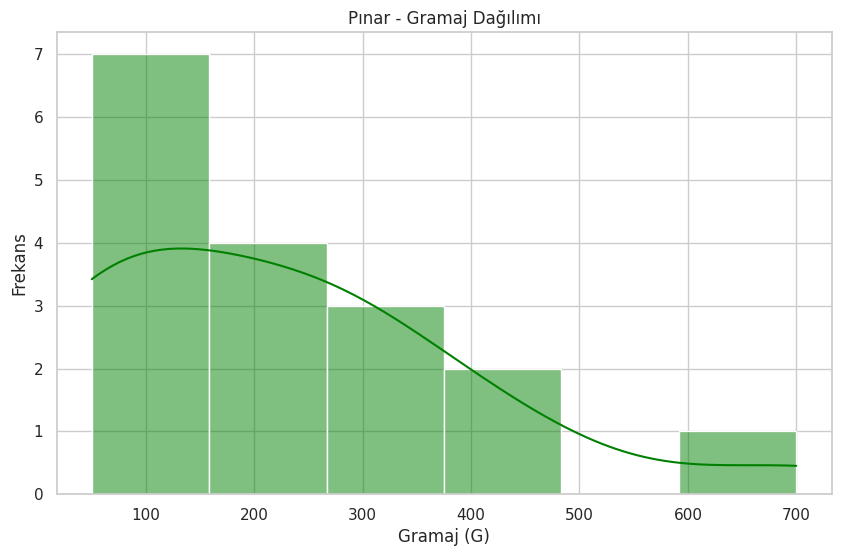

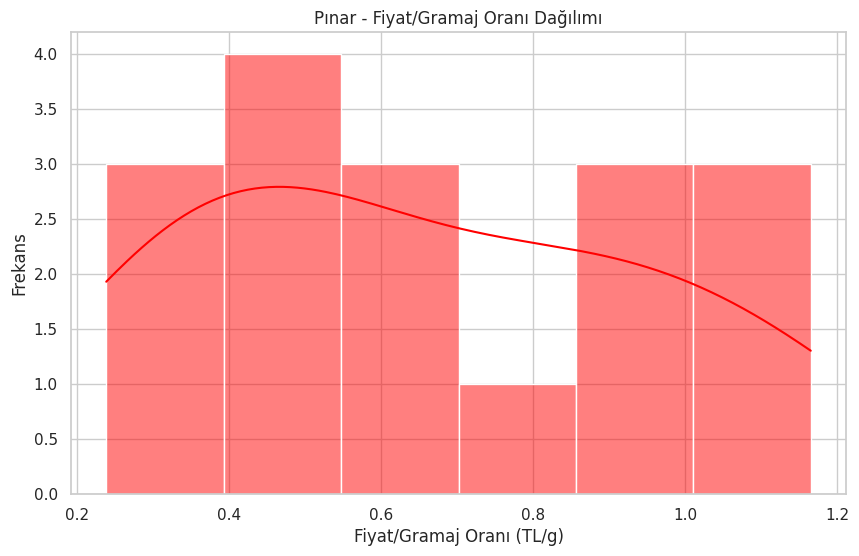

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Sultan Analizi ===
Ortalama Fiyat: 551.11 TL
Min Fiyat: 52.00 TL, Max Fiyat: 1599.90 TL
Ortalama Gramaj: 494.29 g
Min Gramaj: 60.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1253 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Sultan pazarda fiyat açısından uygun bir segmentte.


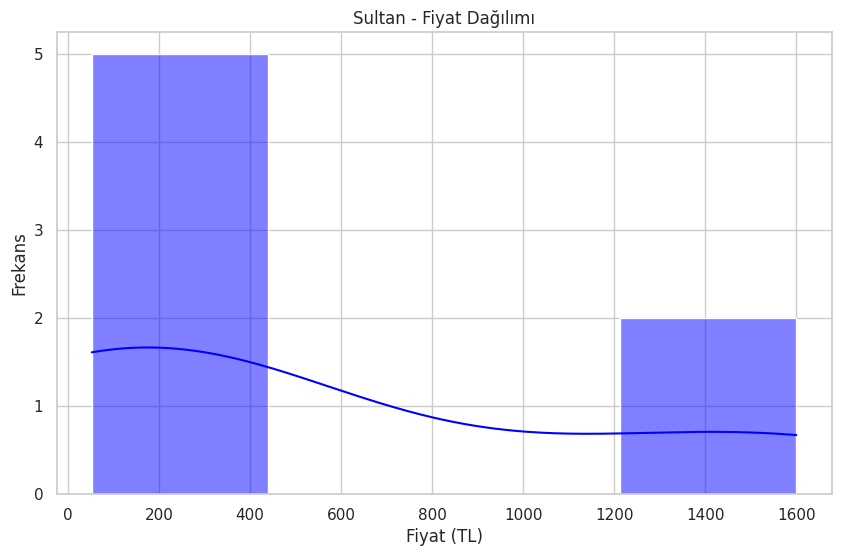

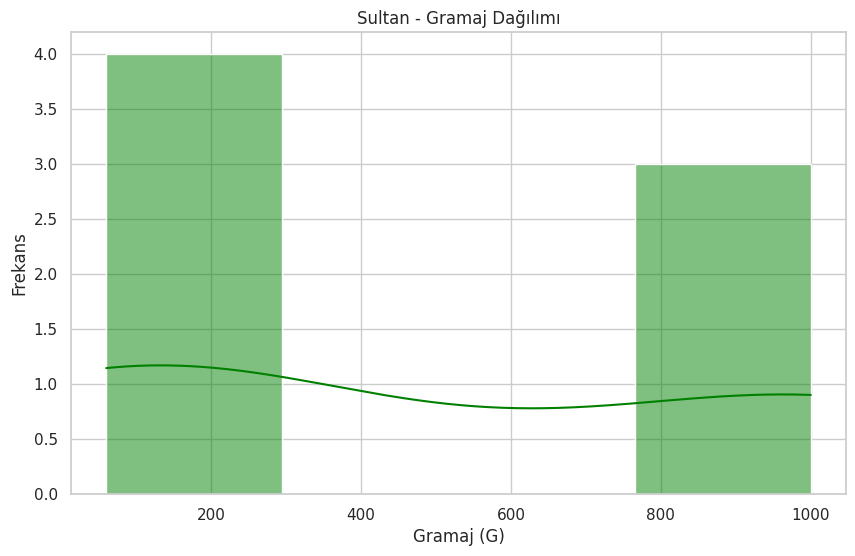

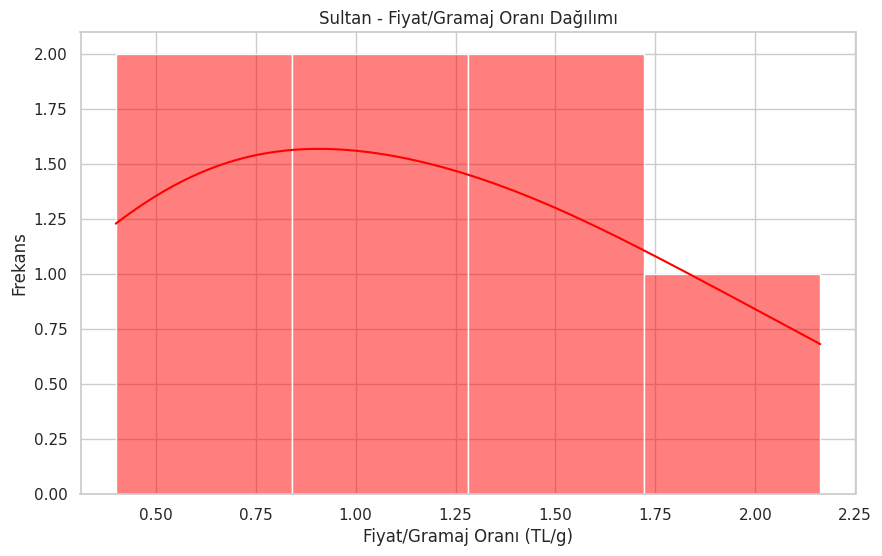

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Banvit Analizi ===
Ortalama Fiyat: 76.12 TL
Min Fiyat: 19.00 TL, Max Fiyat: 125.00 TL
Ortalama Gramaj: 431.67 g
Min Gramaj: 60.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.2061 TL/g
Ürün Çeşitliliği: 6 çeşit ürün
Banvit pazarda fiyat açısından uygun bir segmentte.


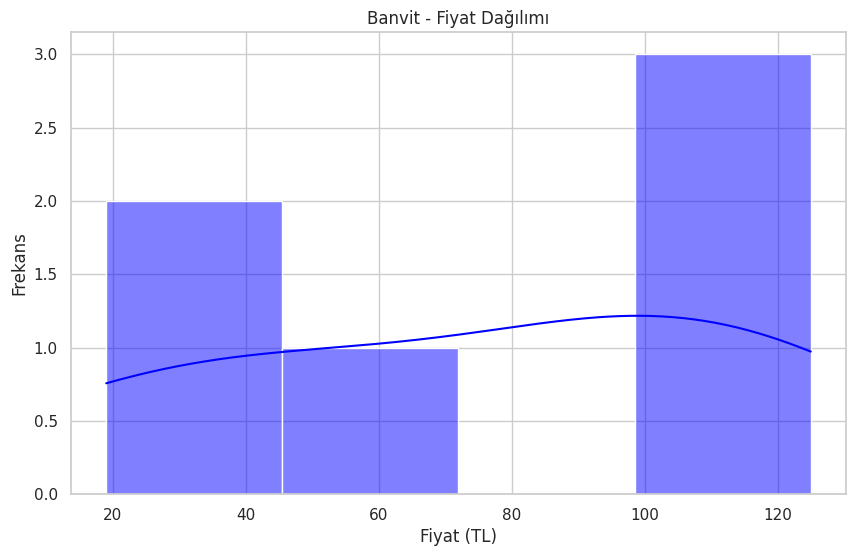

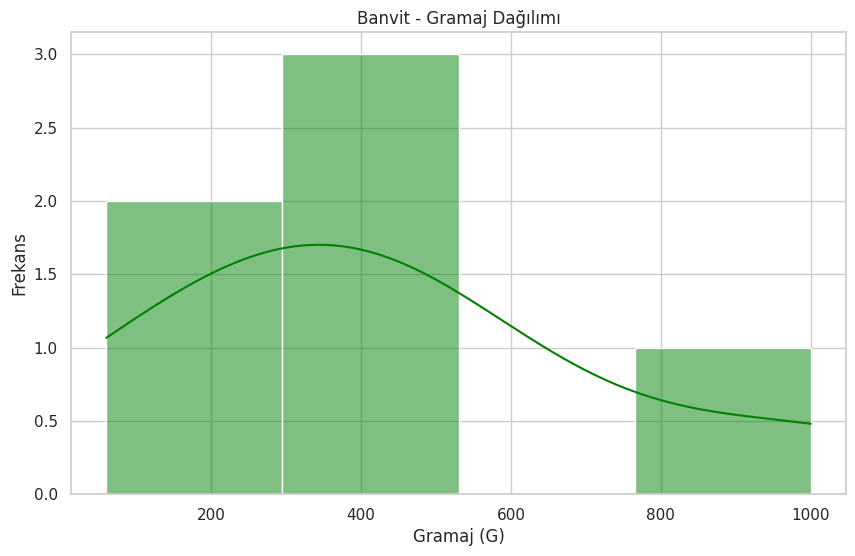

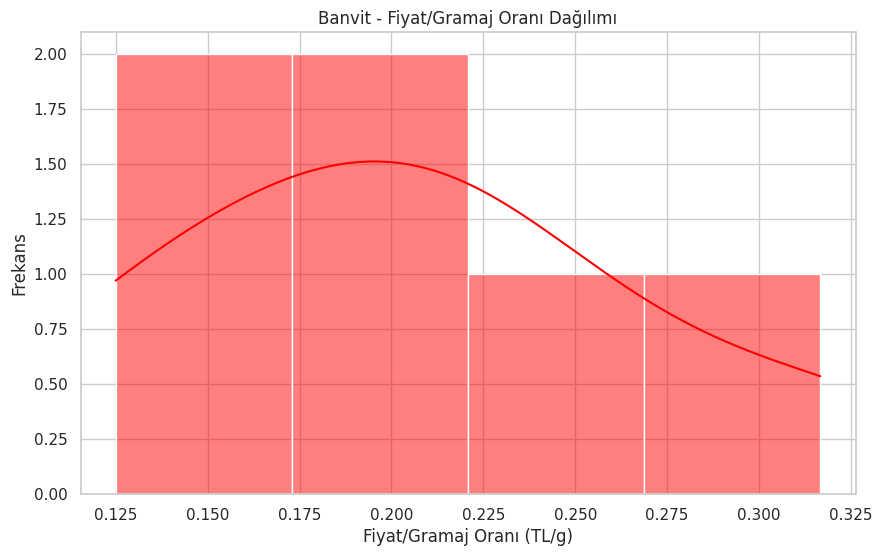

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Polonez Analizi ===
Ortalama Fiyat: 853.12 TL
Min Fiyat: 25.90 TL, Max Fiyat: 3479.90 TL
Ortalama Gramaj: 729.24 g
Min Gramaj: 50.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1648 TL/g
Ürün Çeşitliliği: 58 çeşit ürün
Polonez pazarda fiyat açısından premium bir segmentte.


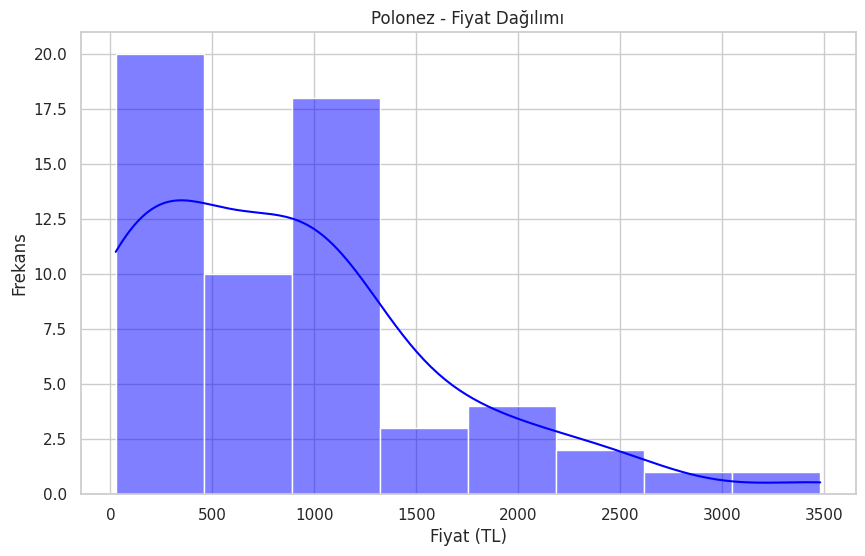

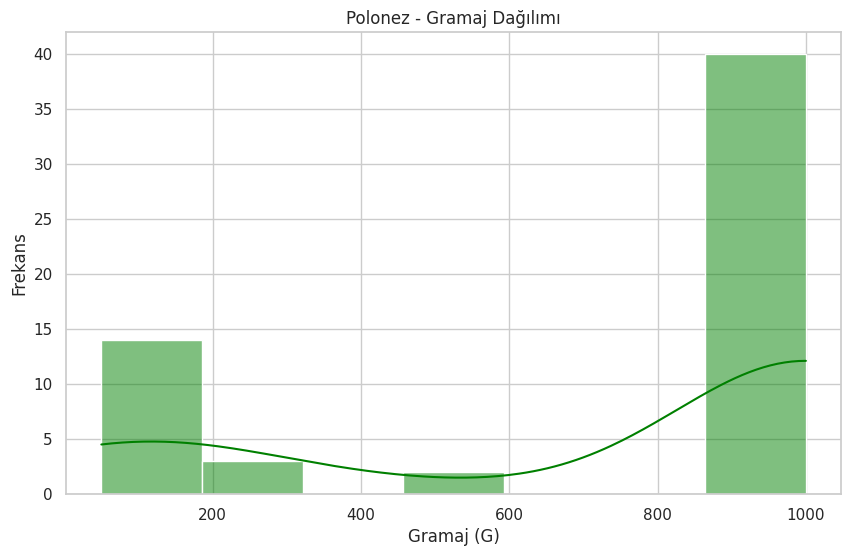

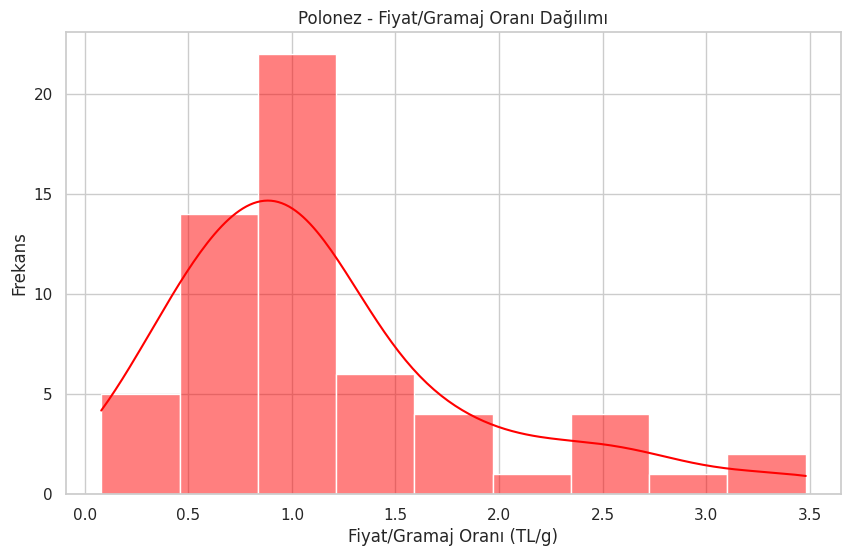

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Beşler Analizi ===
Ortalama Fiyat: 88.19 TL
Min Fiyat: 32.75 TL, Max Fiyat: 192.50 TL
Ortalama Gramaj: 200.83 g
Min Gramaj: 50.00 g, Max Gramaj: 400.00 g
Ortalama Fiyat/Gramaj Oranı: 0.5573 TL/g
Ürün Çeşitliliği: 6 çeşit ürün
Beşler pazarda fiyat açısından uygun bir segmentte.


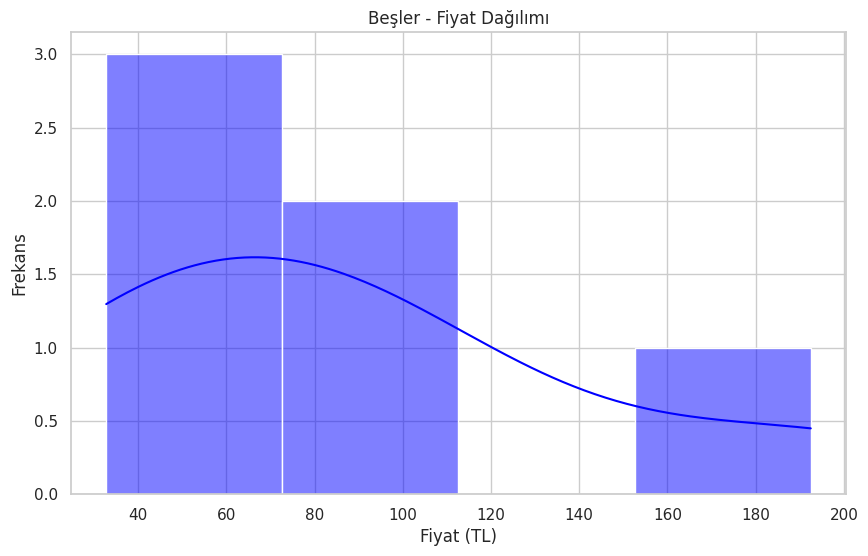

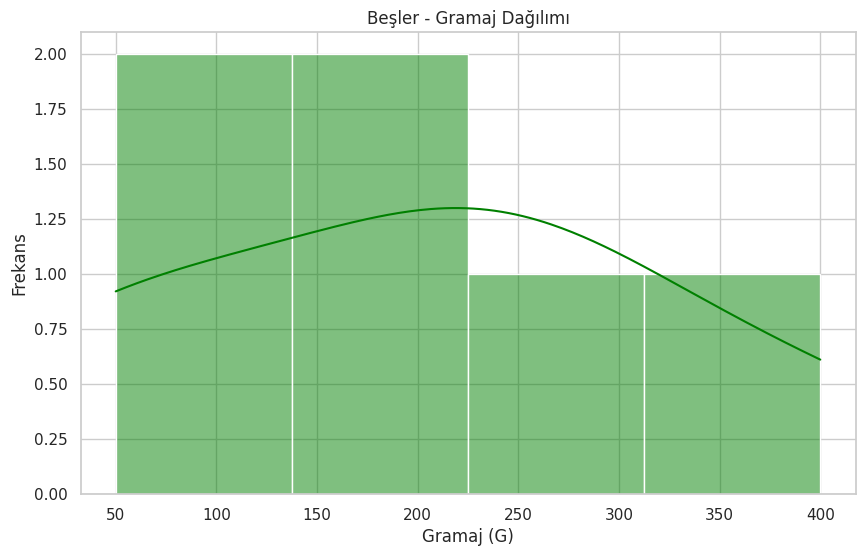

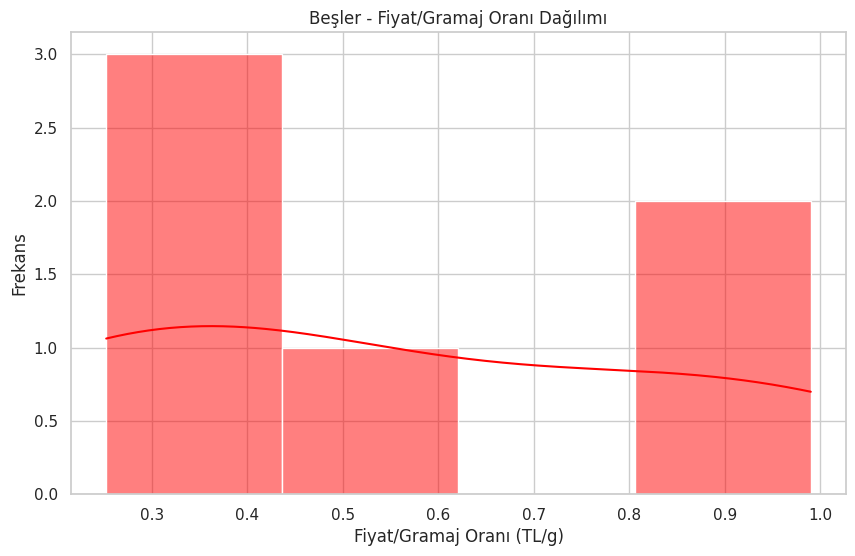

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Erşan Analizi ===
Ortalama Fiyat: 367.93 TL
Min Fiyat: 49.00 TL, Max Fiyat: 1099.90 TL
Ortalama Gramaj: 488.67 g
Min Gramaj: 90.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.0052 TL/g
Ürün Çeşitliliği: 15 çeşit ürün
Erşan pazarda fiyat açısından uygun bir segmentte.


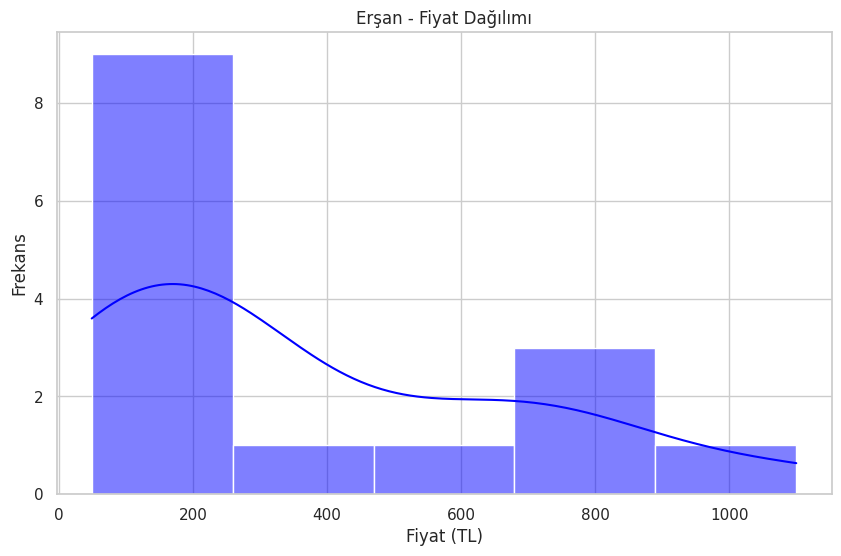

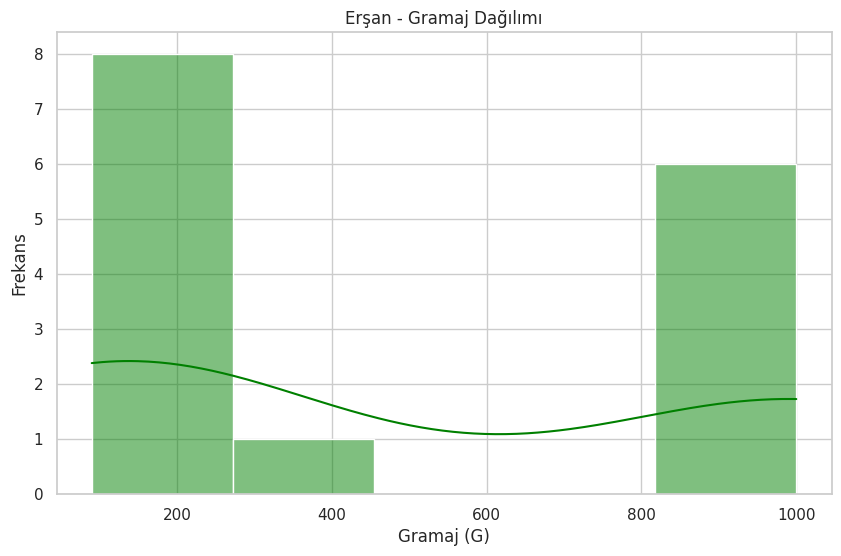

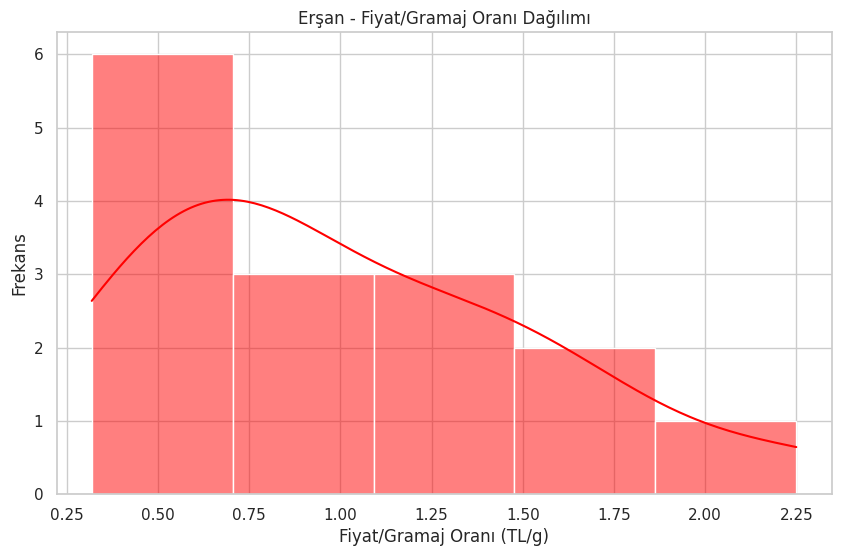

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Maret Analizi ===
Ortalama Fiyat: 187.27 TL
Min Fiyat: 24.50 TL, Max Fiyat: 679.00 TL
Ortalama Gramaj: 258.36 g
Min Gramaj: 50.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6843 TL/g
Ürün Çeşitliliği: 11 çeşit ürün
Maret pazarda fiyat açısından uygun bir segmentte.


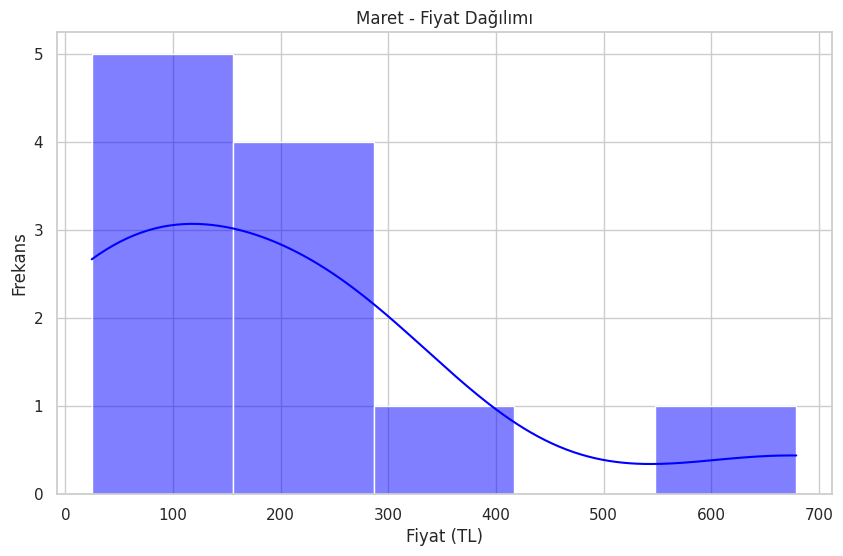

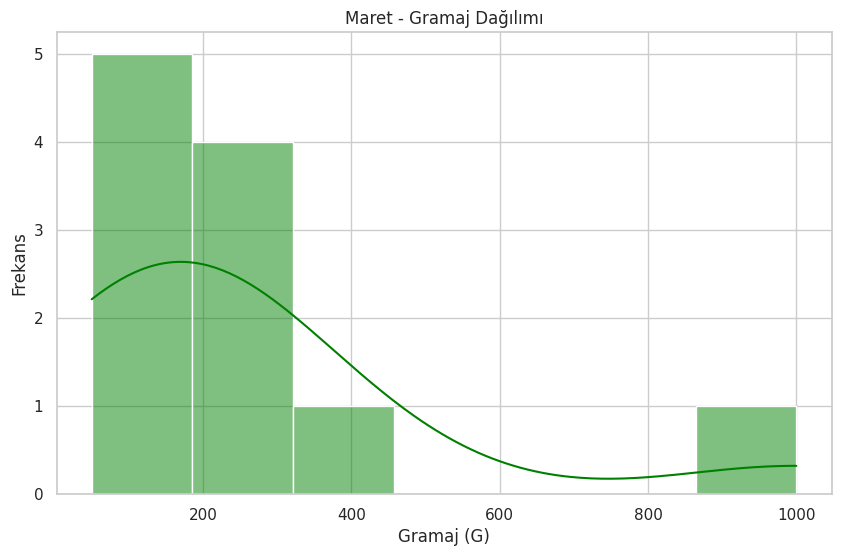

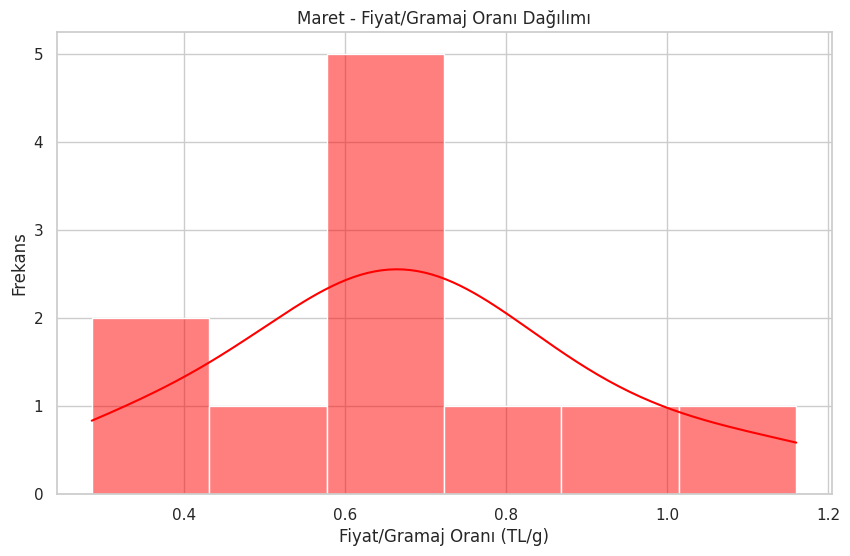

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Aytaç Analizi ===
Ortalama Fiyat: 129.83 TL
Min Fiyat: 19.25 TL, Max Fiyat: 340.25 TL
Ortalama Gramaj: 235.00 g
Min Gramaj: 50.00 g, Max Gramaj: 500.00 g
Ortalama Fiyat/Gramaj Oranı: 0.5843 TL/g
Ürün Çeşitliliği: 11 çeşit ürün
Aytaç pazarda fiyat açısından uygun bir segmentte.


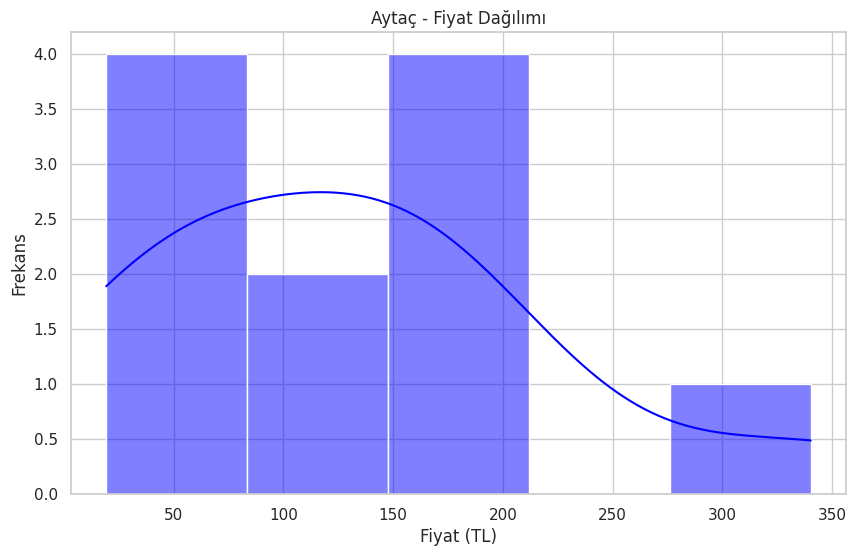

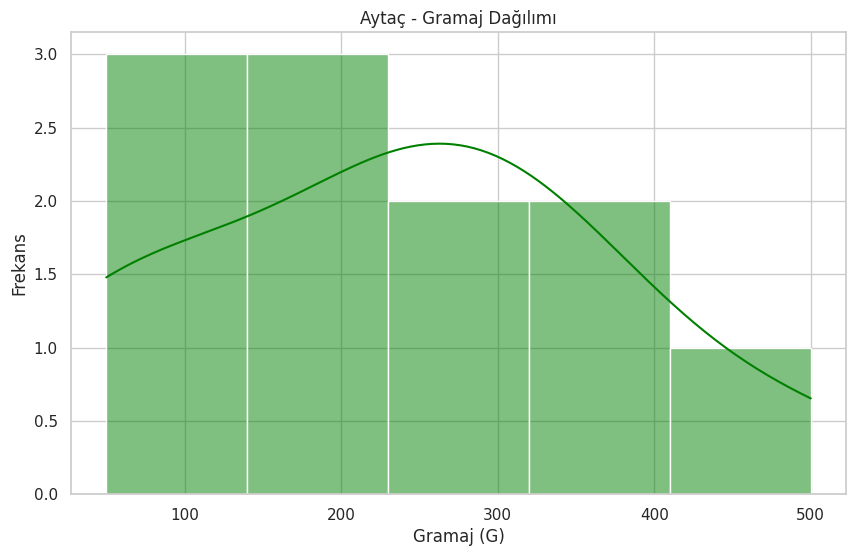

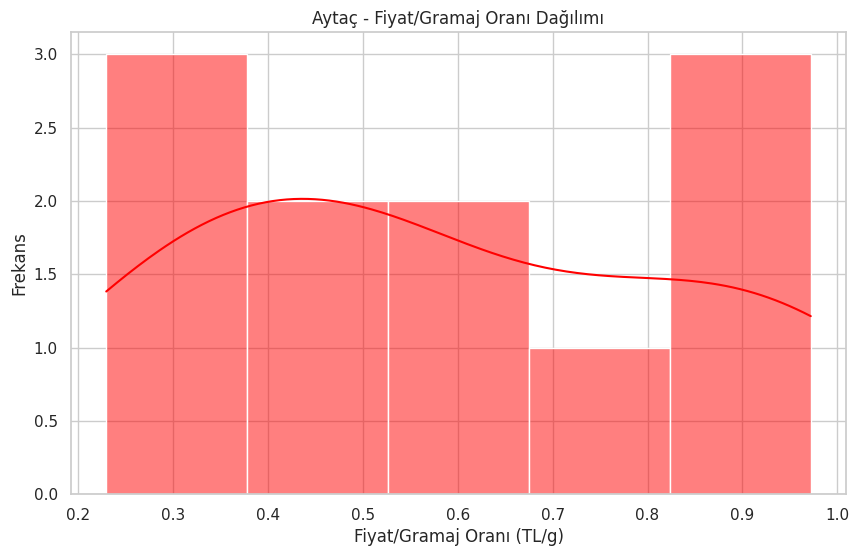

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Dana Analizi ===
Ortalama Fiyat: 186.90 TL
Min Fiyat: 186.90 TL, Max Fiyat: 186.90 TL
Ortalama Gramaj: 200.00 g
Min Gramaj: 200.00 g, Max Gramaj: 200.00 g
Ortalama Fiyat/Gramaj Oranı: 0.9345 TL/g
Ürün Çeşitliliği: 1 çeşit ürün
Dana pazarda fiyat açısından uygun bir segmentte.


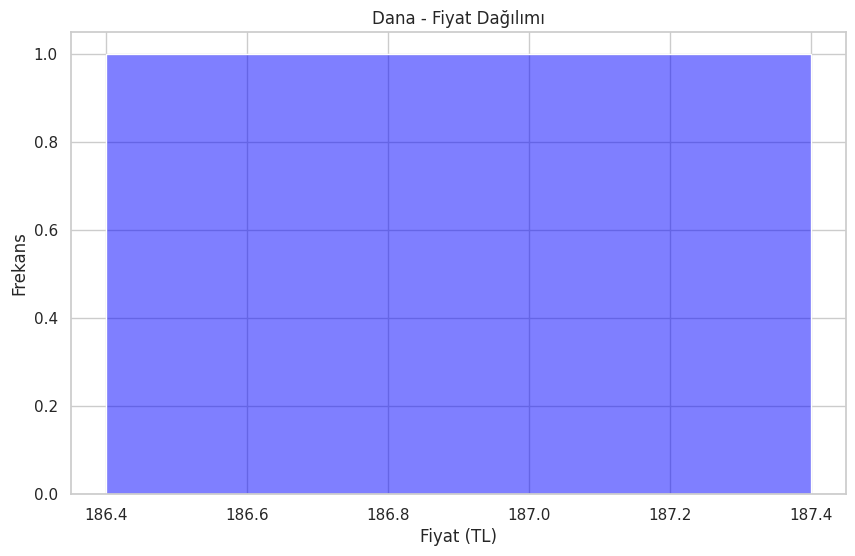

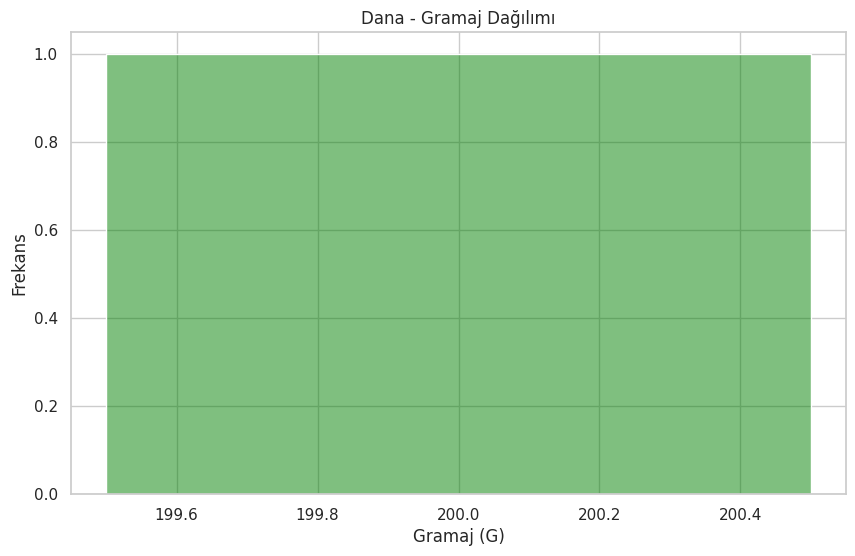

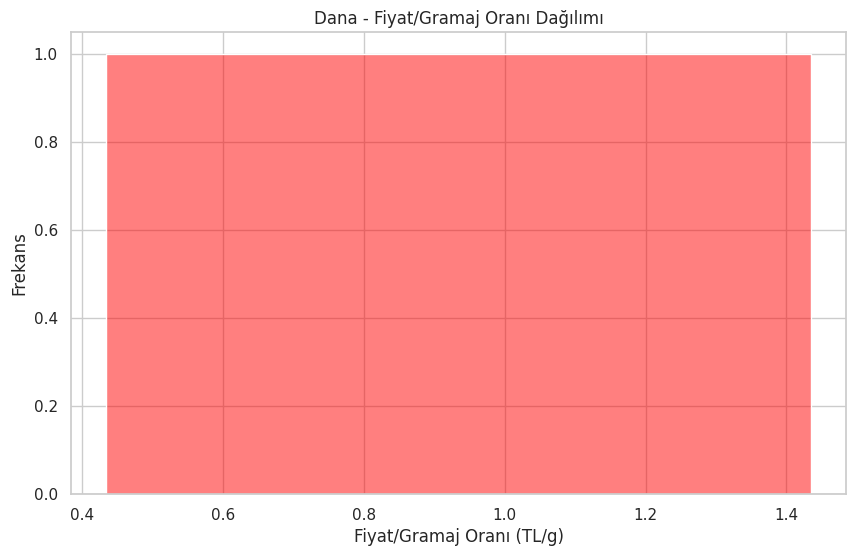

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Cumhuriyet Analizi ===
Ortalama Fiyat: 1195.00 TL
Min Fiyat: 1195.00 TL, Max Fiyat: 1195.00 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1950 TL/g
Ürün Çeşitliliği: 2 çeşit ürün
Cumhuriyet pazarda fiyat açısından premium bir segmentte.


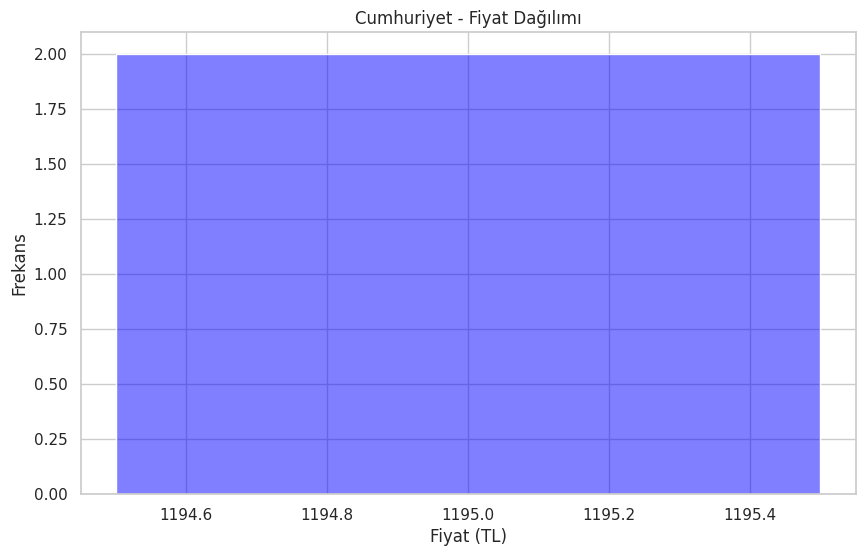

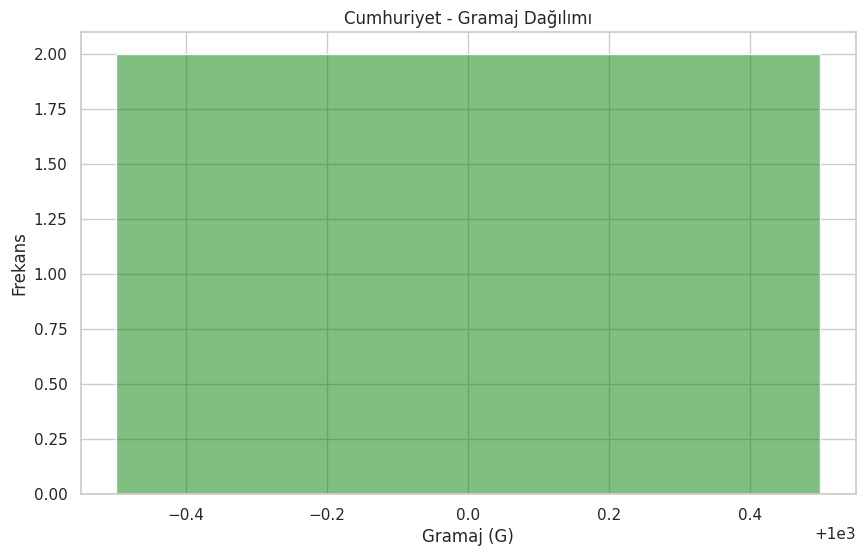

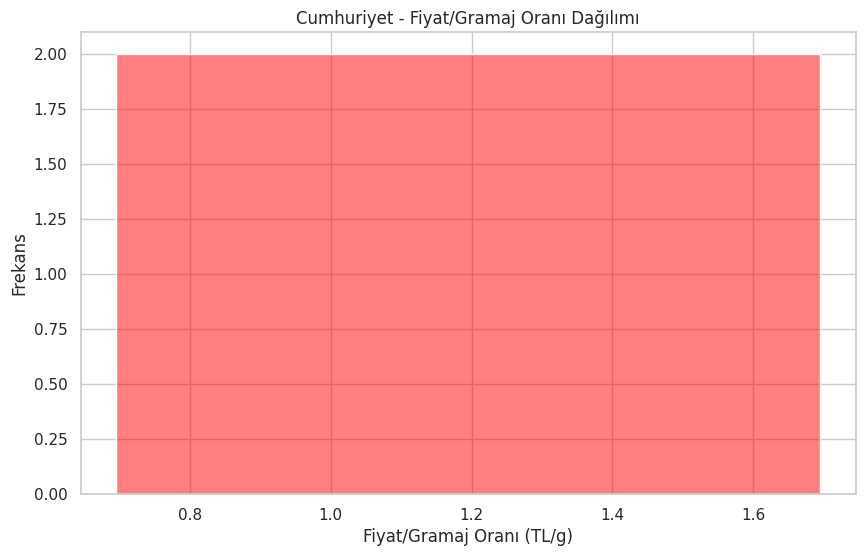

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Riva Analizi ===
Ortalama Fiyat: 58.64 TL
Min Fiyat: 35.50 TL, Max Fiyat: 89.00 TL
Ortalama Gramaj: 143.57 g
Min Gramaj: 130.00 g, Max Gramaj: 180.00 g
Ortalama Fiyat/Gramaj Oranı: 0.4083 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Riva pazarda fiyat açısından uygun bir segmentte.


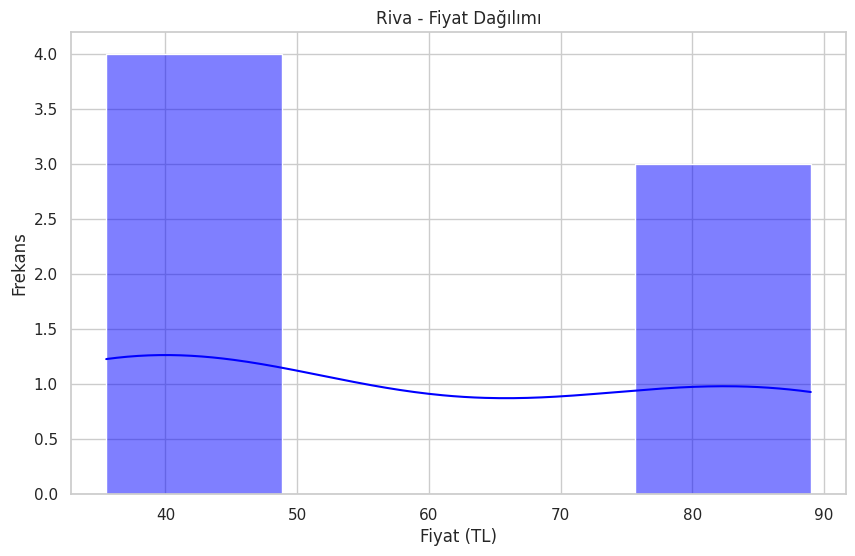

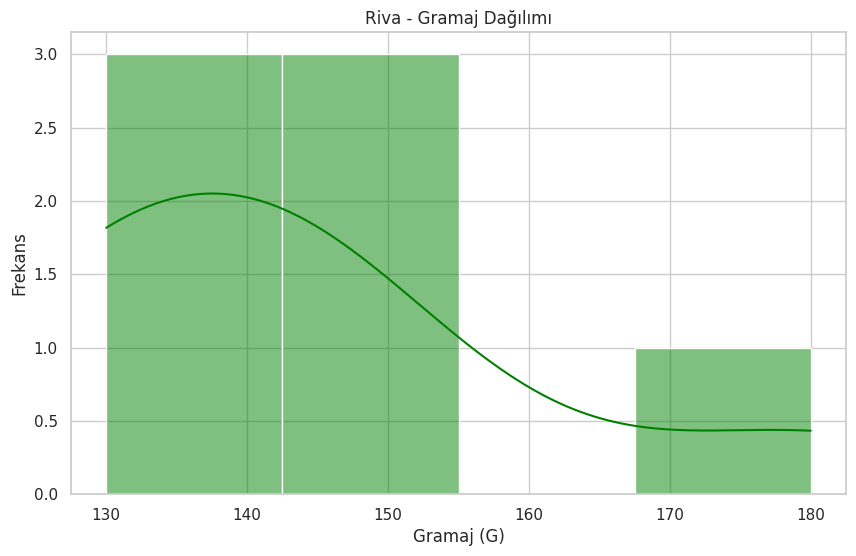

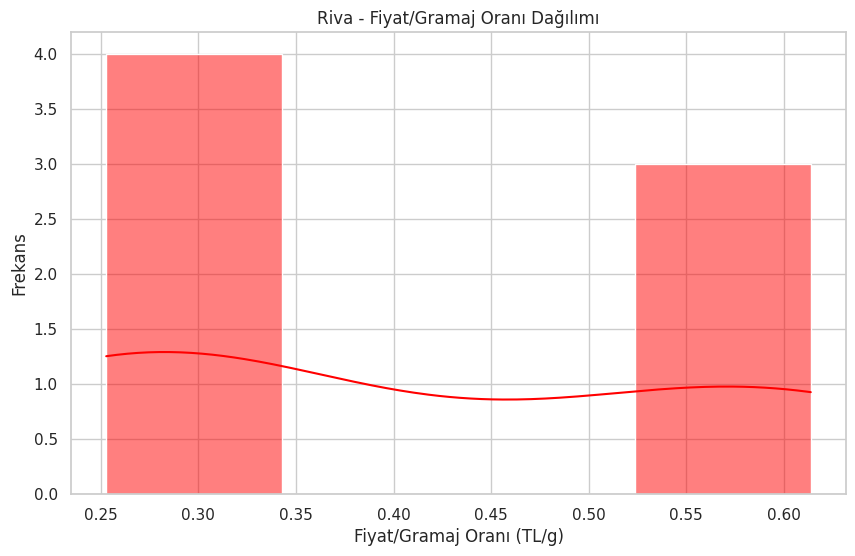

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Tada Analizi ===
Ortalama Fiyat: 92.27 TL
Min Fiyat: 45.00 TL, Max Fiyat: 120.00 TL
Ortalama Gramaj: 168.18 g
Min Gramaj: 160.00 g, Max Gramaj: 220.00 g
Ortalama Fiyat/Gramaj Oranı: 0.5513 TL/g
Ürün Çeşitliliği: 11 çeşit ürün
Tada pazarda fiyat açısından uygun bir segmentte.


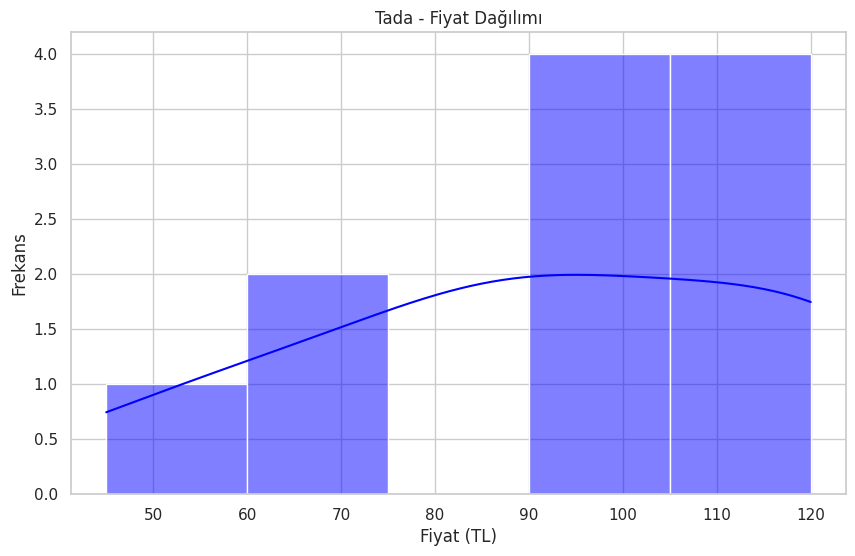

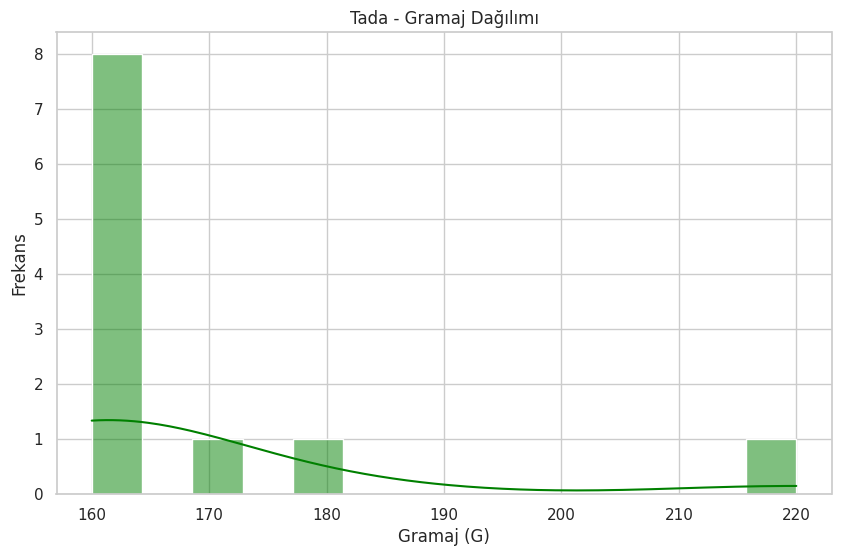

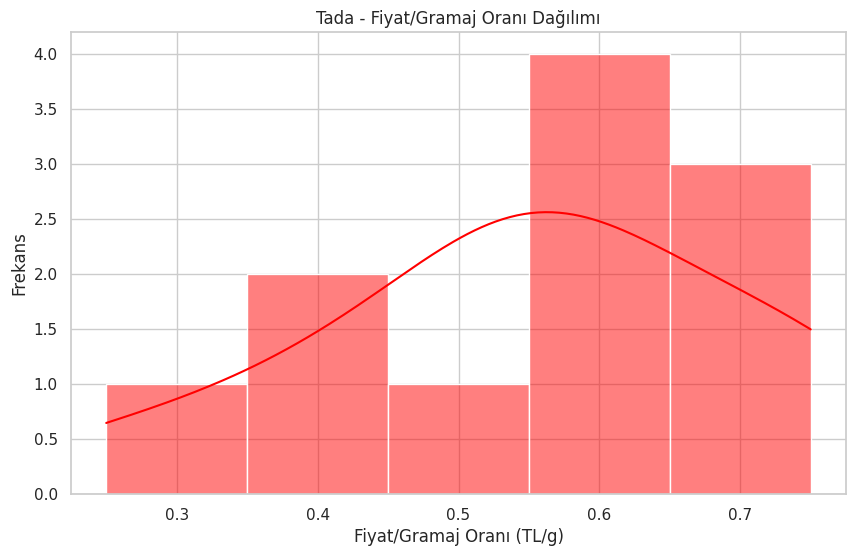

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Mr. Analizi ===
Ortalama Fiyat: 123.66 TL
Min Fiyat: 99.00 TL, Max Fiyat: 189.00 TL
Ortalama Gramaj: 163.33 g
Min Gramaj: 145.00 g, Max Gramaj: 230.00 g
Ortalama Fiyat/Gramaj Oranı: 0.7618 TL/g
Ürün Çeşitliliği: 12 çeşit ürün
Mr. pazarda fiyat açısından uygun bir segmentte.


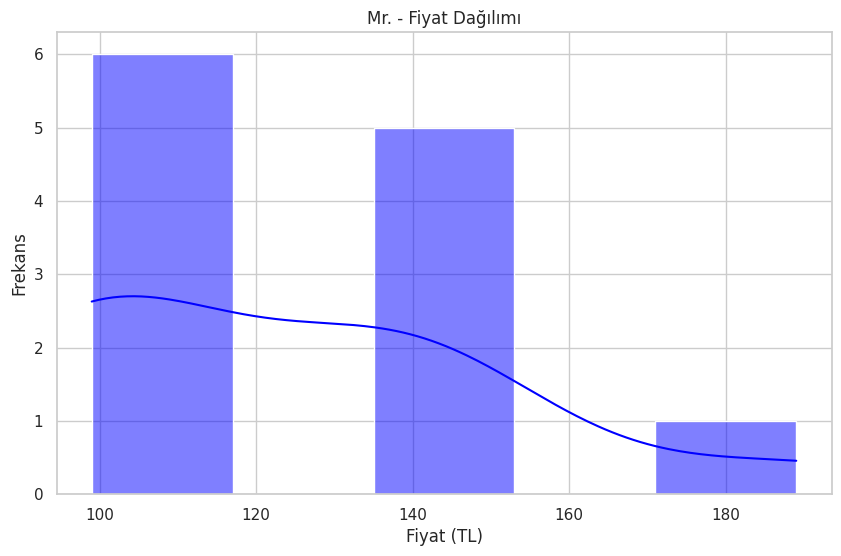

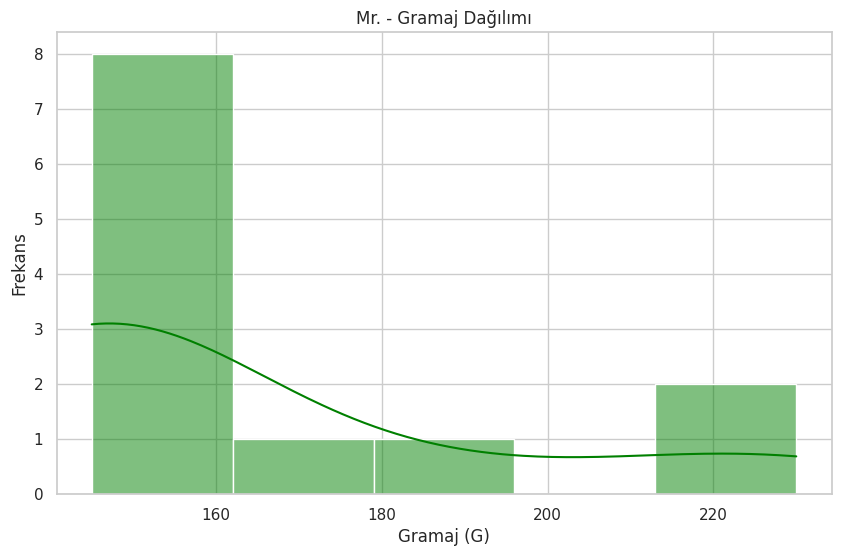

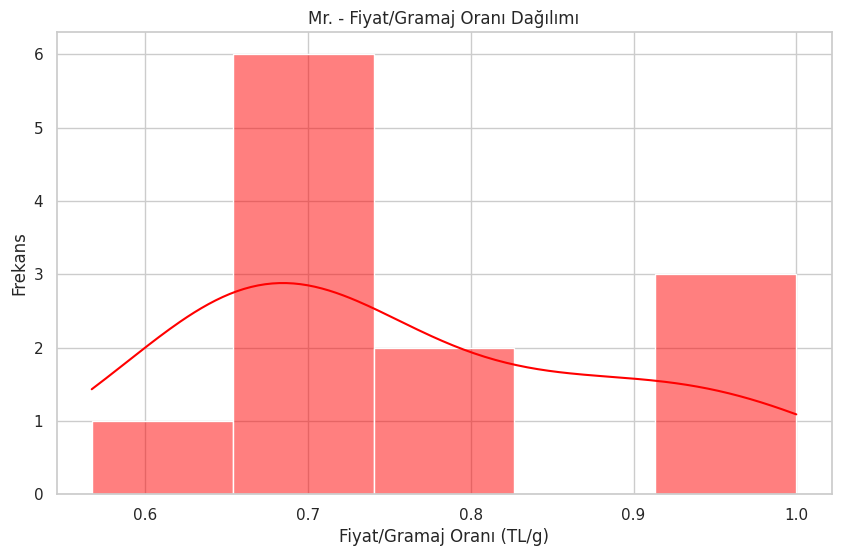

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Fümeci Analizi ===
Ortalama Fiyat: 1838.65 TL
Min Fiyat: 819.90 TL, Max Fiyat: 3099.90 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.8387 TL/g
Ürün Çeşitliliği: 31 çeşit ürün
Fümeci pazarda fiyat açısından premium bir segmentte.


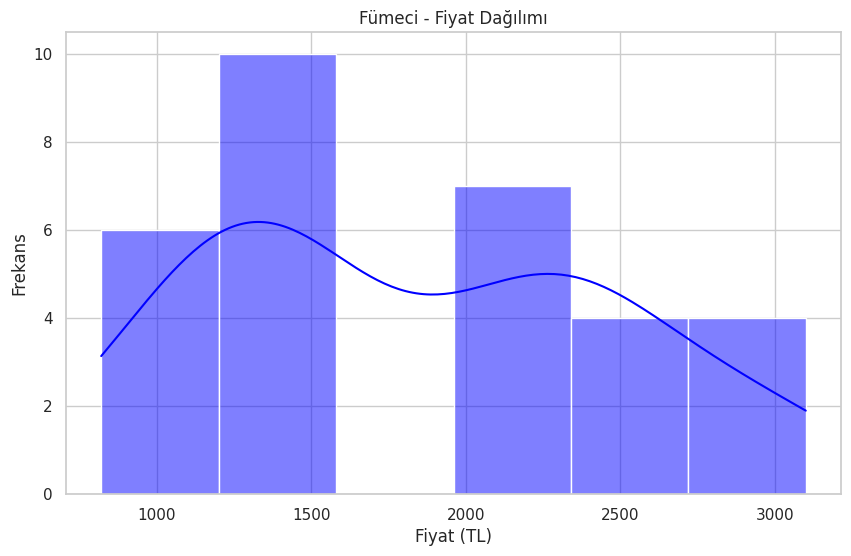

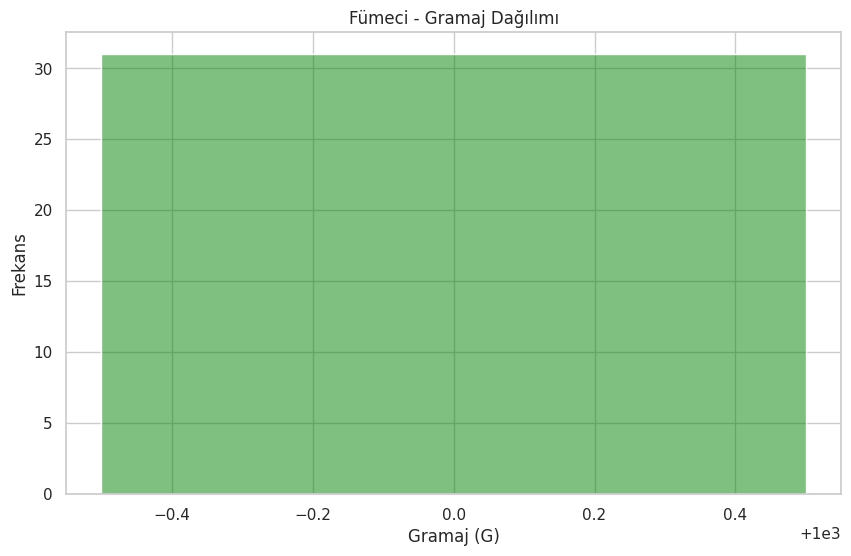

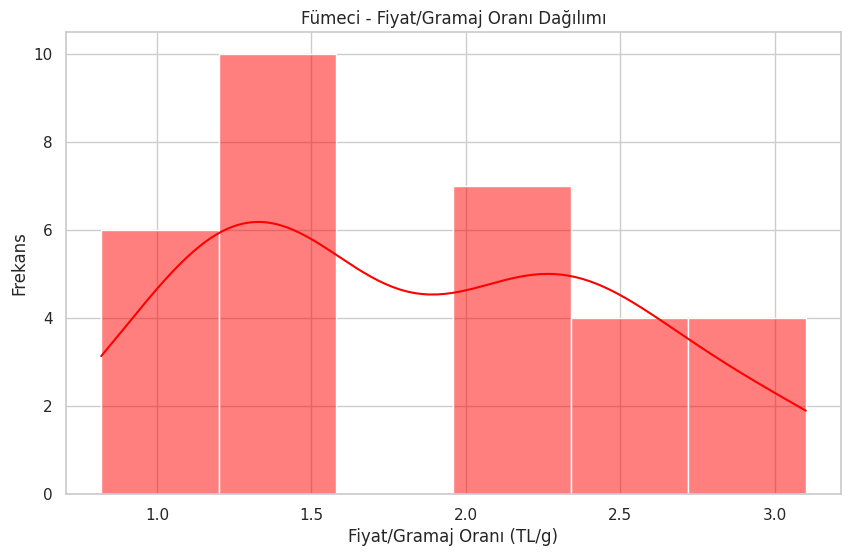

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Torku Analizi ===
Ortalama Fiyat: 999.90 TL
Min Fiyat: 799.90 TL, Max Fiyat: 1399.90 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.9999 TL/g
Ürün Çeşitliliği: 3 çeşit ürün
Torku pazarda fiyat açısından premium bir segmentte.


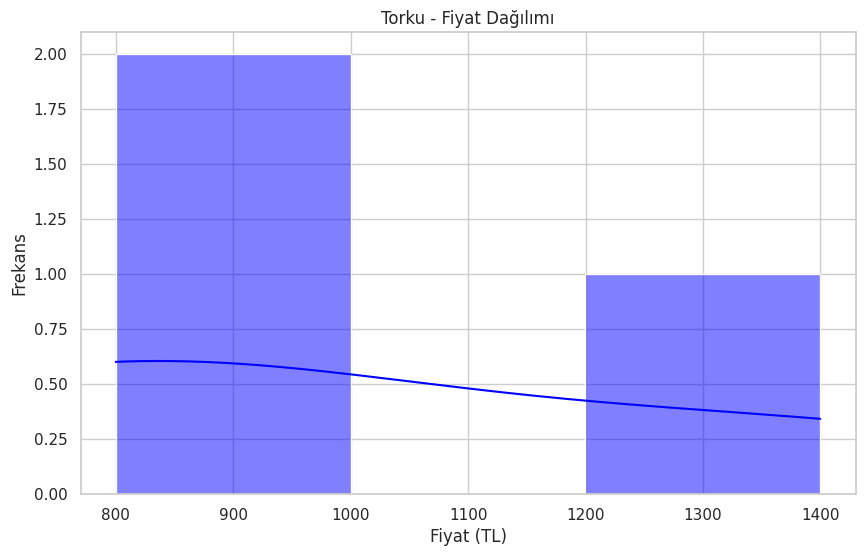

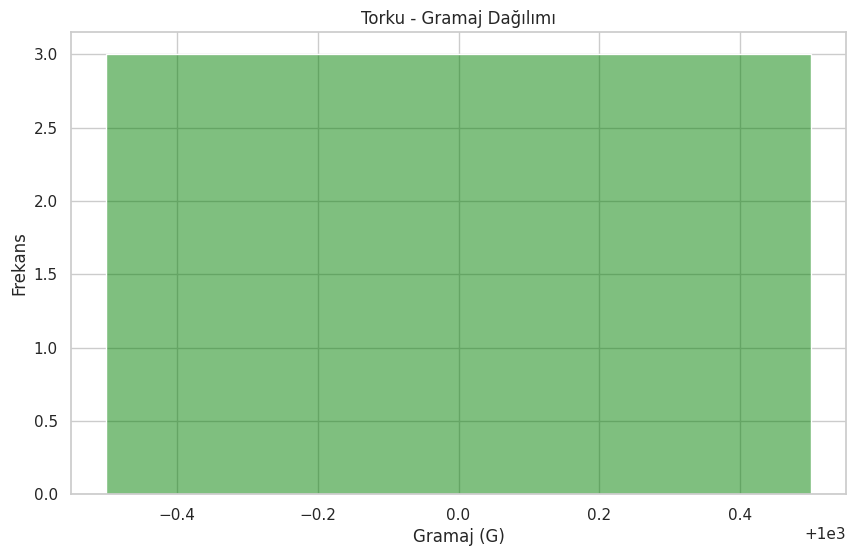

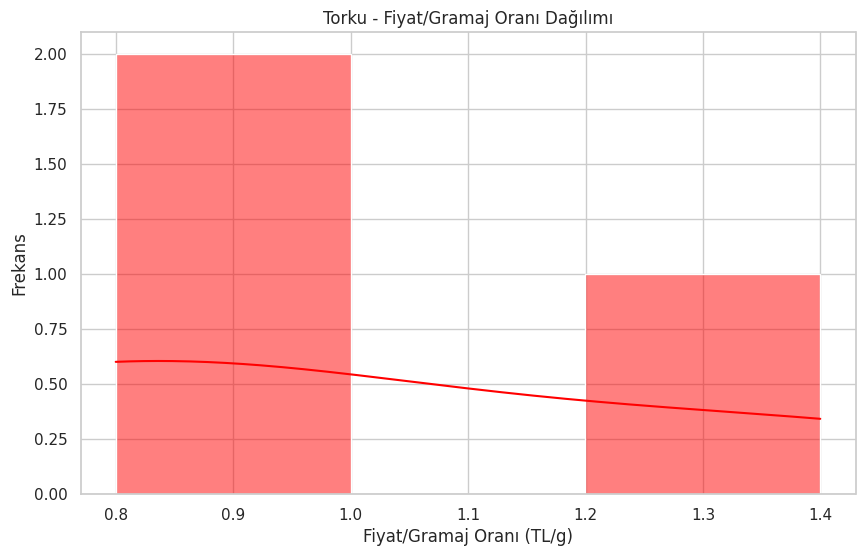

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Başyazıcı Analizi ===
Ortalama Fiyat: 550.82 TL
Min Fiyat: 90.50 TL, Max Fiyat: 1399.90 TL
Ortalama Gramaj: 514.67 g
Min Gramaj: 100.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.4010 TL/g
Ürün Çeşitliliği: 15 çeşit ürün
Başyazıcı pazarda fiyat açısından uygun bir segmentte.


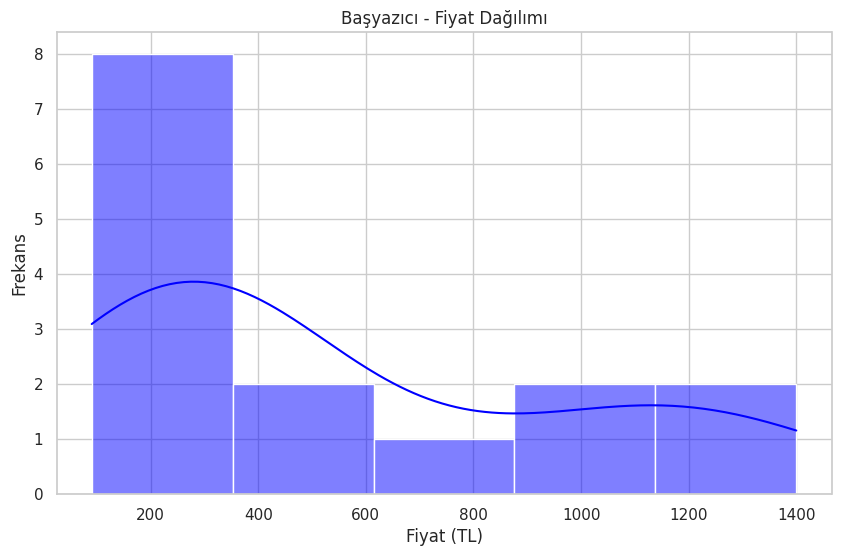

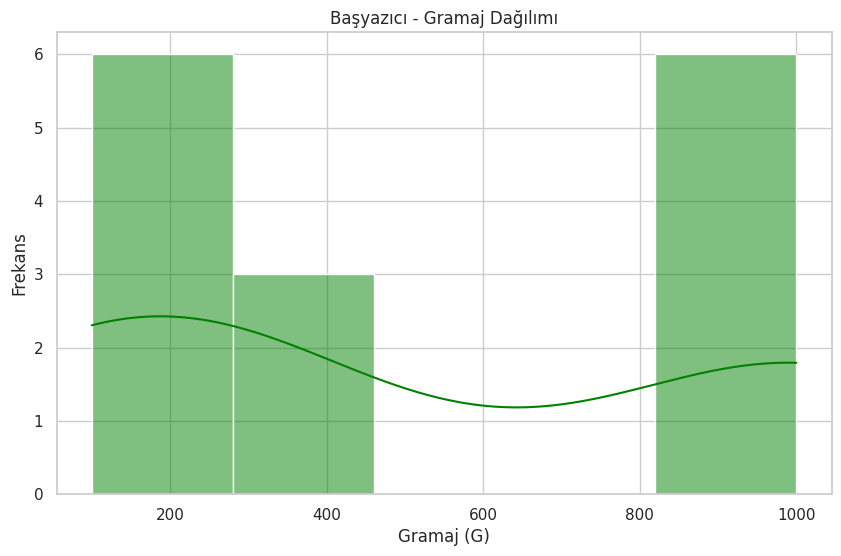

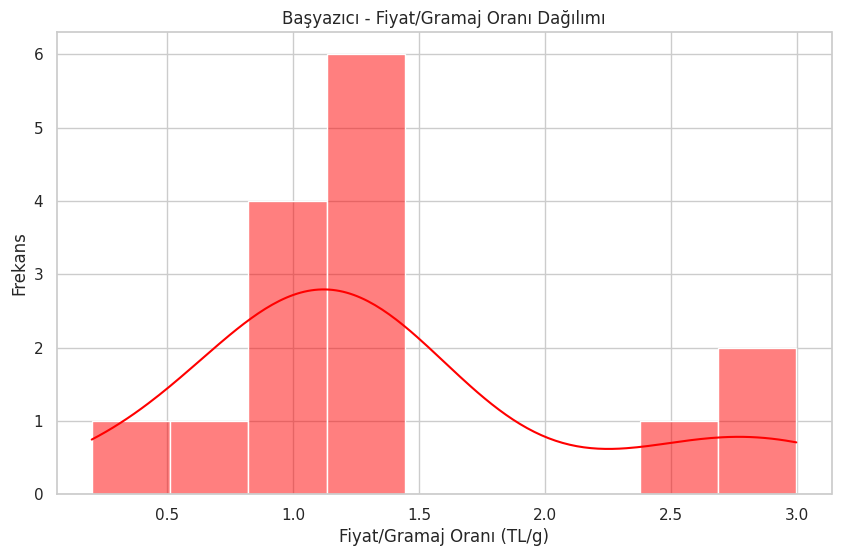

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Mr.No Analizi ===
Ortalama Fiyat: 89.94 TL
Min Fiyat: 34.90 TL, Max Fiyat: 155.00 TL
Ortalama Gramaj: 121.43 g
Min Gramaj: 60.00 g, Max Gramaj: 185.00 g
Ortalama Fiyat/Gramaj Oranı: 0.7133 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Mr.No pazarda fiyat açısından uygun bir segmentte.


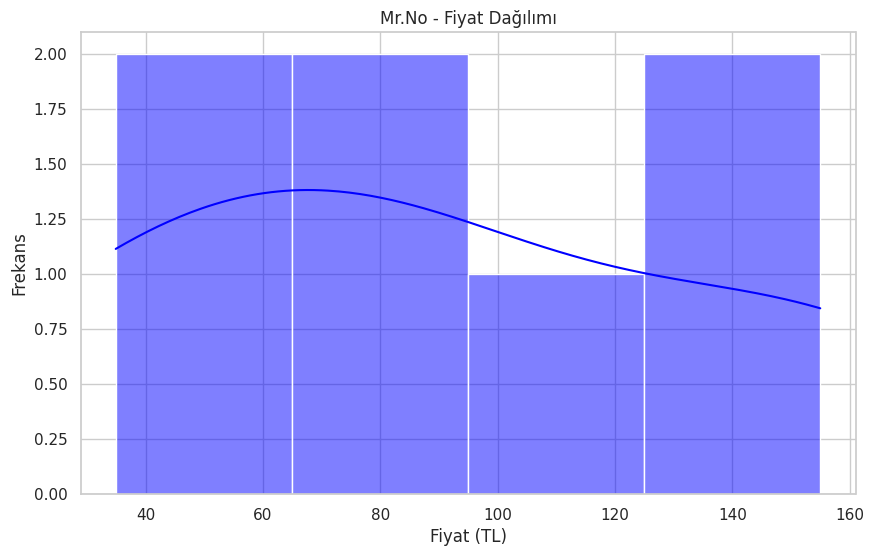

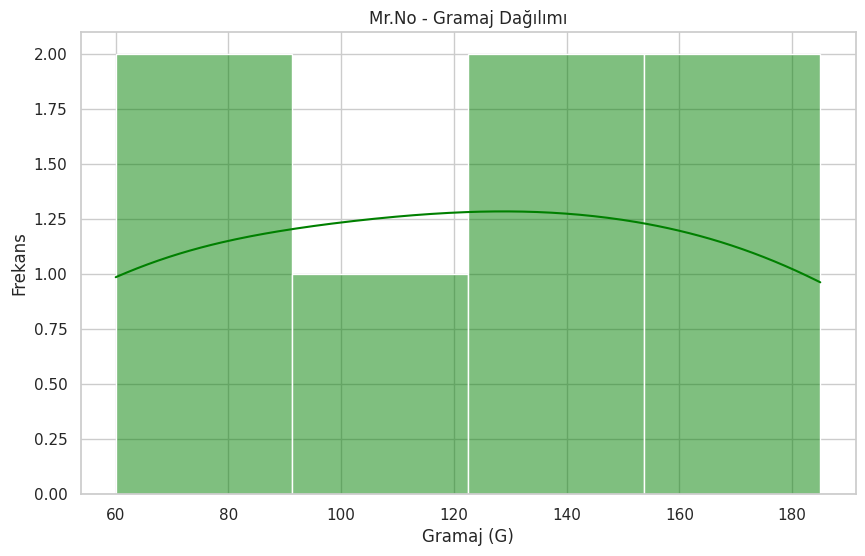

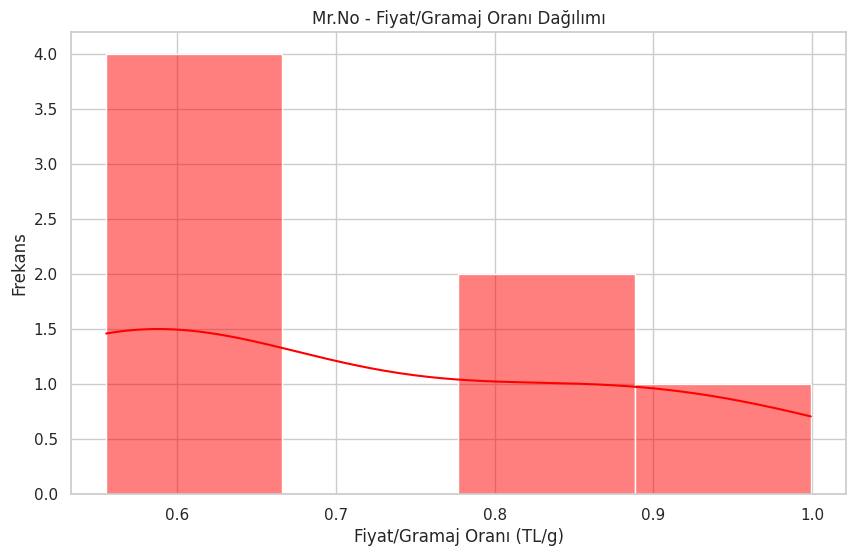

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Piliç Analizi ===
Ortalama Fiyat: 128.75 TL
Min Fiyat: 64.25 TL, Max Fiyat: 193.25 TL
Ortalama Gramaj: 325.00 g
Min Gramaj: 250.00 g, Max Gramaj: 400.00 g
Ortalama Fiyat/Gramaj Oranı: 0.3701 TL/g
Ürün Çeşitliliği: 2 çeşit ürün
Piliç pazarda fiyat açısından uygun bir segmentte.


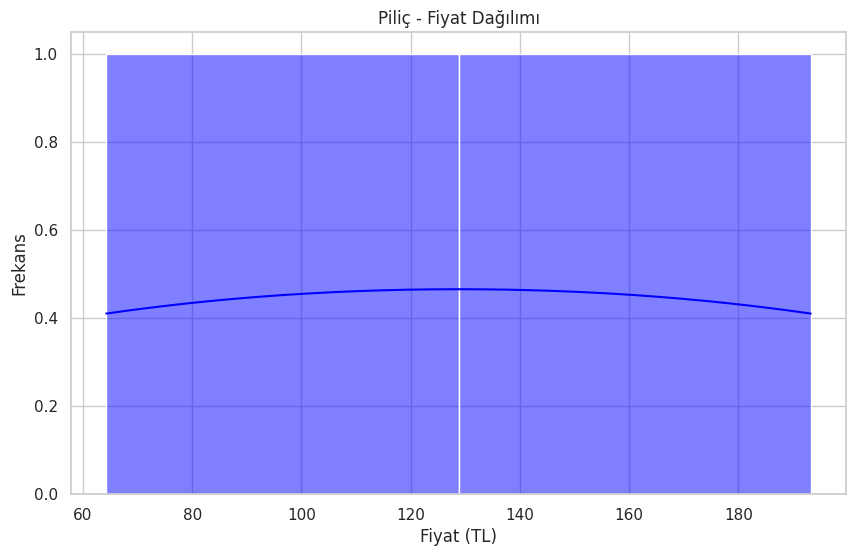

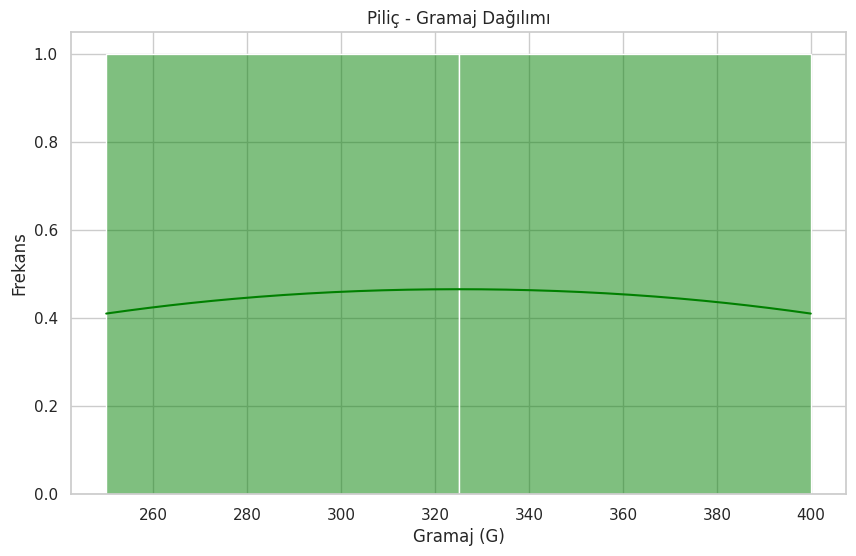

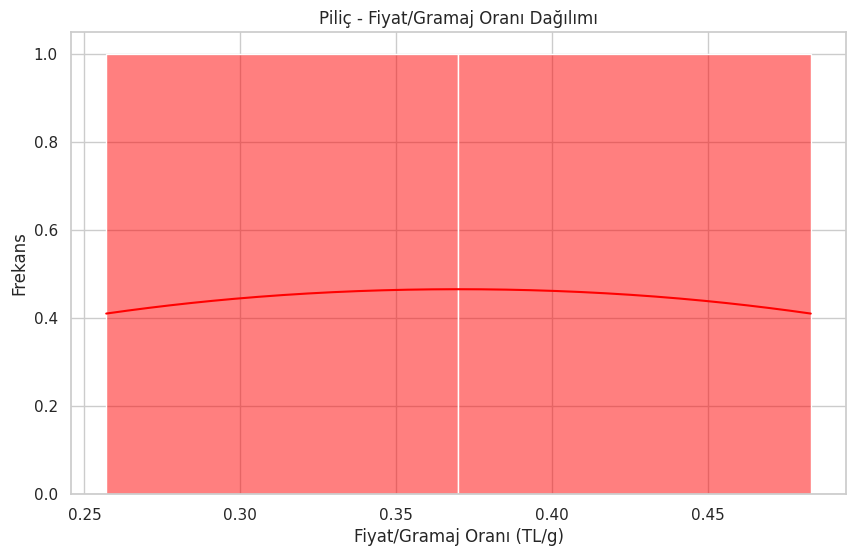

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Yayla Analizi ===
Ortalama Fiyat: 798.59 TL
Min Fiyat: 163.50 TL, Max Fiyat: 1359.90 TL
Ortalama Gramaj: 622.86 g
Min Gramaj: 120.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.3124 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Yayla pazarda fiyat açısından premium bir segmentte.


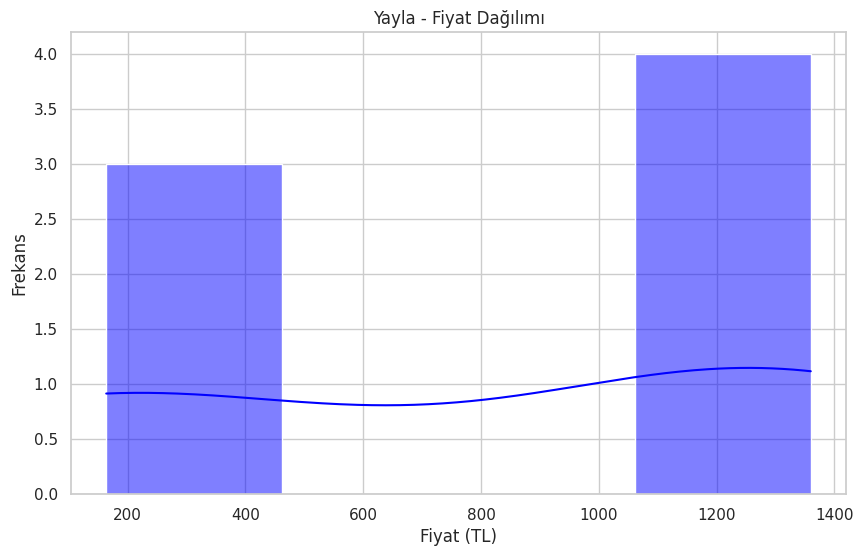

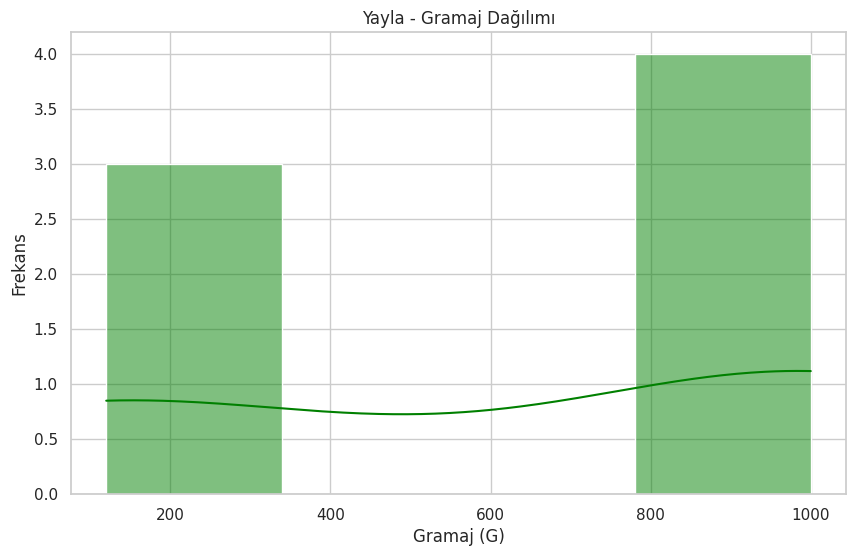

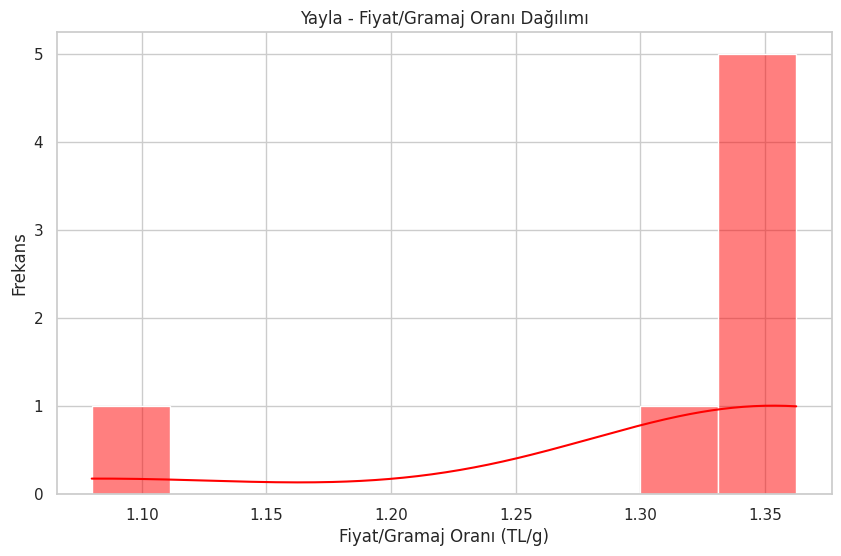

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Yaylatürk Analizi ===
Ortalama Fiyat: 1159.90 TL
Min Fiyat: 1159.90 TL, Max Fiyat: 1159.90 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1599 TL/g
Ürün Çeşitliliği: 1 çeşit ürün
Yaylatürk pazarda fiyat açısından premium bir segmentte.


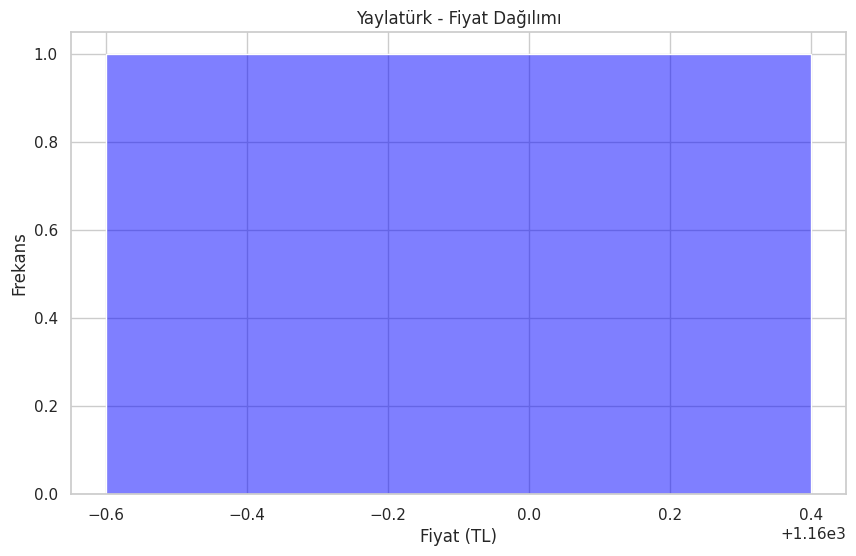

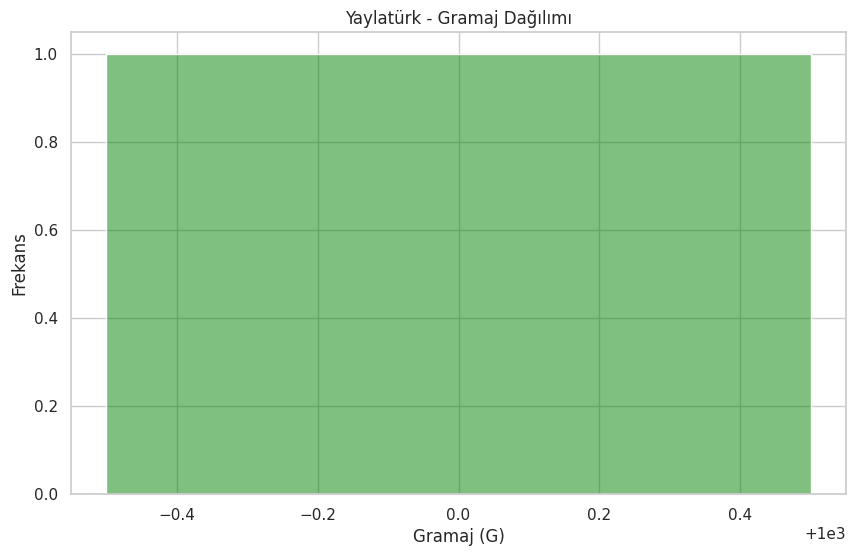

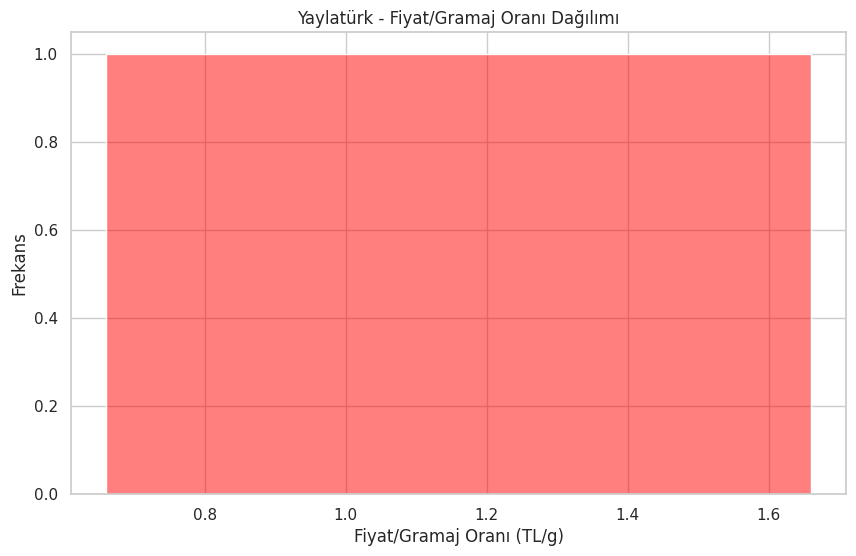

<ipython-input-29-ef9a698600fb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Dardanel Analizi ===
Ortalama Fiyat: 104.90 TL
Min Fiyat: 104.90 TL, Max Fiyat: 104.90 TL
Ortalama Gramaj: 165.00 g
Min Gramaj: 165.00 g, Max Gramaj: 165.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6358 TL/g
Ürün Çeşitliliği: 1 çeşit ürün
Dardanel pazarda fiyat açısından uygun bir segmentte.


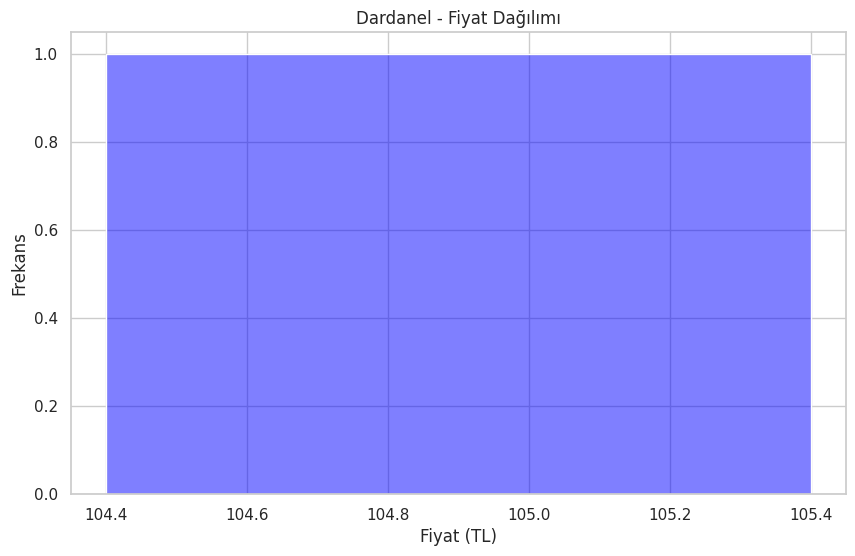

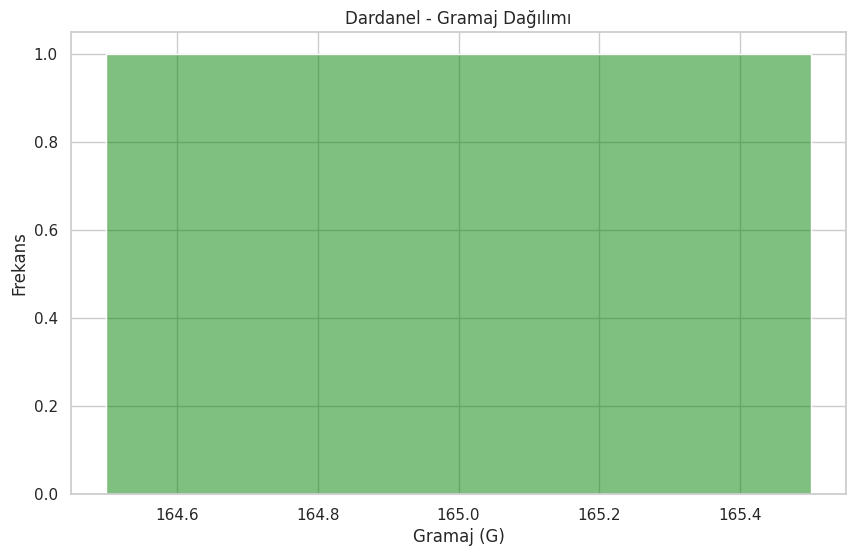

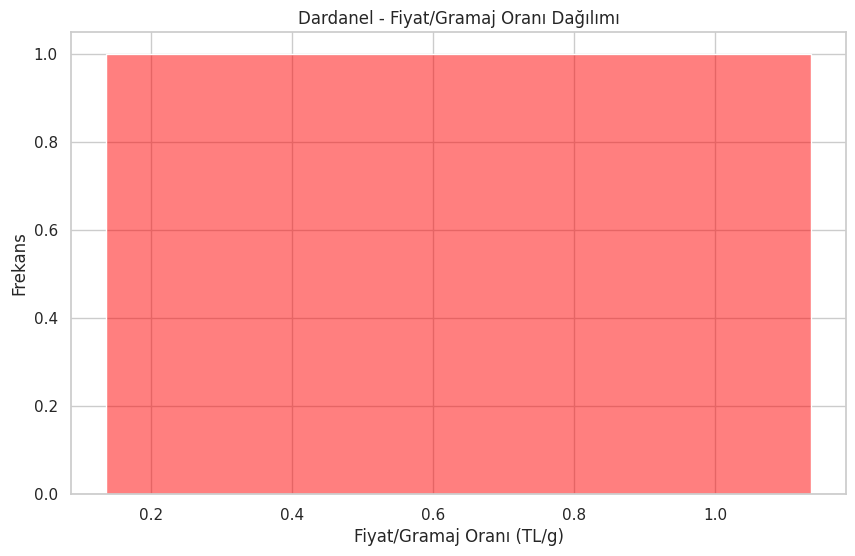

In [29]:
# Her marka için analiz fonksiyonu
def marka_analizi(df, marka):
    marka_df = df[df['Marka'] == marka]

    # 1. Fiyat Analizi
    ortalama_fiyat = marka_df['Fiyat'].mean()
    min_fiyat = marka_df['Fiyat'].min()
    max_fiyat = marka_df['Fiyat'].max()

    # 2. Gramaj Analizi
    ortalama_gramaj = marka_df['Gramaj (G)'].mean()
    min_gramaj = marka_df['Gramaj (G)'].min()
    max_gramaj = marka_df['Gramaj (G)'].max()

    # 3. Fiyat/Gramaj Oranı
    marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']
    ortalama_fiyat_gramaj_orani = marka_df['Fiyat/Gramaj Oranı'].mean()

    # 4. Ürün Çeşitliliği
    urun_sayisi = marka_df['Ürün İsmi'].nunique()

    # 5. Piyasa Pozisyonu (Genel fiyat karşılaştırması)
    genel_ortalama_fiyat = df['Fiyat'].mean()

    print(f"=== {marka} Analizi ===")
    print(f"Ortalama Fiyat: {ortalama_fiyat:.2f} TL")
    print(f"Min Fiyat: {min_fiyat:.2f} TL, Max Fiyat: {max_fiyat:.2f} TL")
    print(f"Ortalama Gramaj: {ortalama_gramaj:.2f} g")
    print(f"Min Gramaj: {min_gramaj:.2f} g, Max Gramaj: {max_gramaj:.2f} g")
    print(f"Ortalama Fiyat/Gramaj Oranı: {ortalama_fiyat_gramaj_orani:.4f} TL/g")
    print(f"Ürün Çeşitliliği: {urun_sayisi} çeşit ürün")

    if ortalama_fiyat > genel_ortalama_fiyat:
        print(f"{marka} pazarda fiyat açısından premium bir segmentte.")
    else:
        print(f"{marka} pazarda fiyat açısından uygun bir segmentte.")

    # Görselleştirme
    sns.set(style="whitegrid")

    # 1. Fiyat Dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(marka_df['Fiyat'], kde=True, color='blue')
    plt.title(f"{marka} - Fiyat Dağılımı")
    plt.xlabel('Fiyat (TL)')
    plt.ylabel('Frekans')
    plt.show()

    # 2. Gramaj Dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(marka_df['Gramaj (G)'], kde=True, color='green')
    plt.title(f"{marka} - Gramaj Dağılımı")
    plt.xlabel('Gramaj (G)')
    plt.ylabel('Frekans')
    plt.show()

    # 3. Fiyat/Gramaj Oranı Dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(marka_df['Fiyat/Gramaj Oranı'], kde=True, color='red')
    plt.title(f"{marka} - Fiyat/Gramaj Oranı Dağılımı")
    plt.xlabel('Fiyat/Gramaj Oranı (TL/g)')
    plt.ylabel('Frekans')
    plt.show()

# Tüm markalar için analiz yapalım
markalar = df['Marka'].unique()

for marka in markalar:
    marka_analizi(df, marka)


## Gelişmiş Ürün Segmentasyonu

         Marka  Ortalama Fiyat               Segment
0     Apikoğlu      804.061905       Premium Segment
1        Aytaç      129.827273  Uygun Fiyat Segmenti
2       Banvit       76.125000  Uygun Fiyat Segmenti
3    Başyazıcı      550.820000          Orta Segment
4       Beşler       88.191667  Uygun Fiyat Segmenti
5    Carrefour       77.141667  Uygun Fiyat Segmenti
6   Cumhuriyet     1195.000000       Premium Segment
7         Dana      186.900000  Uygun Fiyat Segmenti
8     Dardanel      104.900000  Uygun Fiyat Segmenti
9        Erşan      367.933333  Uygun Fiyat Segmenti
10      Fümeci     1838.654839       Premium Segment
11       Maret      187.272727  Uygun Fiyat Segmenti
12         Mr.      123.658333  Uygun Fiyat Segmenti
13       Mr.No       89.942857  Uygun Fiyat Segmenti
14       Namet      607.659302          Orta Segment
15       Piliç      128.750000  Uygun Fiyat Segmenti
16     Polonez      853.124576       Premium Segment
17       Pınar      126.261765  Uygun Fiyat Se

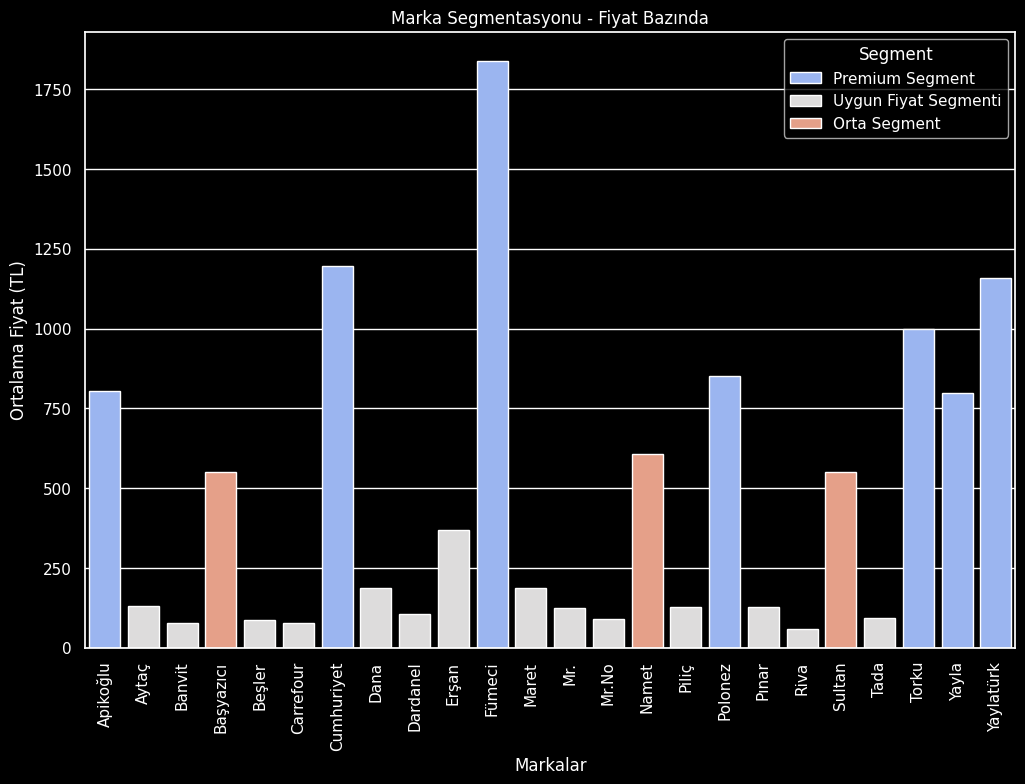

In [32]:
# Her markanın ortalama fiyatını hesaplayalım
marka_fiyat_ortalama = df.groupby('Marka')['Fiyat'].mean()

# Pazarın genel fiyat ortalaması
genel_ortalama_fiyat = df['Fiyat'].mean()

# Segmentasyon kriterlerini belirleyelim
premium_threshold = genel_ortalama_fiyat * 1.2  # Genel ortalamadan %20 daha yüksek olanlar premium segment
uygun_fiyat_threshold = genel_ortalama_fiyat * 0.8  # Genel ortalamadan %20 daha düşük olanlar uygun fiyat segmenti

# Her markayı fiyat segmentine göre sınıflandıralım
def fiyat_segmenti(fiyat):
    if fiyat >= premium_threshold:
        return 'Premium Segment'
    elif fiyat <= uygun_fiyat_threshold:
        return 'Uygun Fiyat Segmenti'
    else:
        return 'Orta Segment'

# Her marka için segmenti belirleyelim
marka_segmentleri = marka_fiyat_ortalama.apply(fiyat_segmenti)

# Her markayı segmentiyle beraber yazdıralım
segmentasyon_sonuclari = pd.DataFrame({'Marka': marka_fiyat_ortalama.index,
                                       'Ortalama Fiyat': marka_fiyat_ortalama.values,
                                       'Segment': marka_segmentleri.values})

print(segmentasyon_sonuclari)

# Segmentlere göre görselleştirelim
plt.figure(figsize=(12, 8))
sns.barplot(x='Marka', y='Ortalama Fiyat', hue='Segment', data=segmentasyon_sonuclari, palette='coolwarm')
plt.title('Marka Segmentasyonu - Fiyat Bazında')
plt.xticks(rotation=90)
plt.xlabel('Markalar')
plt.ylabel('Ortalama Fiyat (TL)')
plt.show()


# Kilogram bazında veri analizi

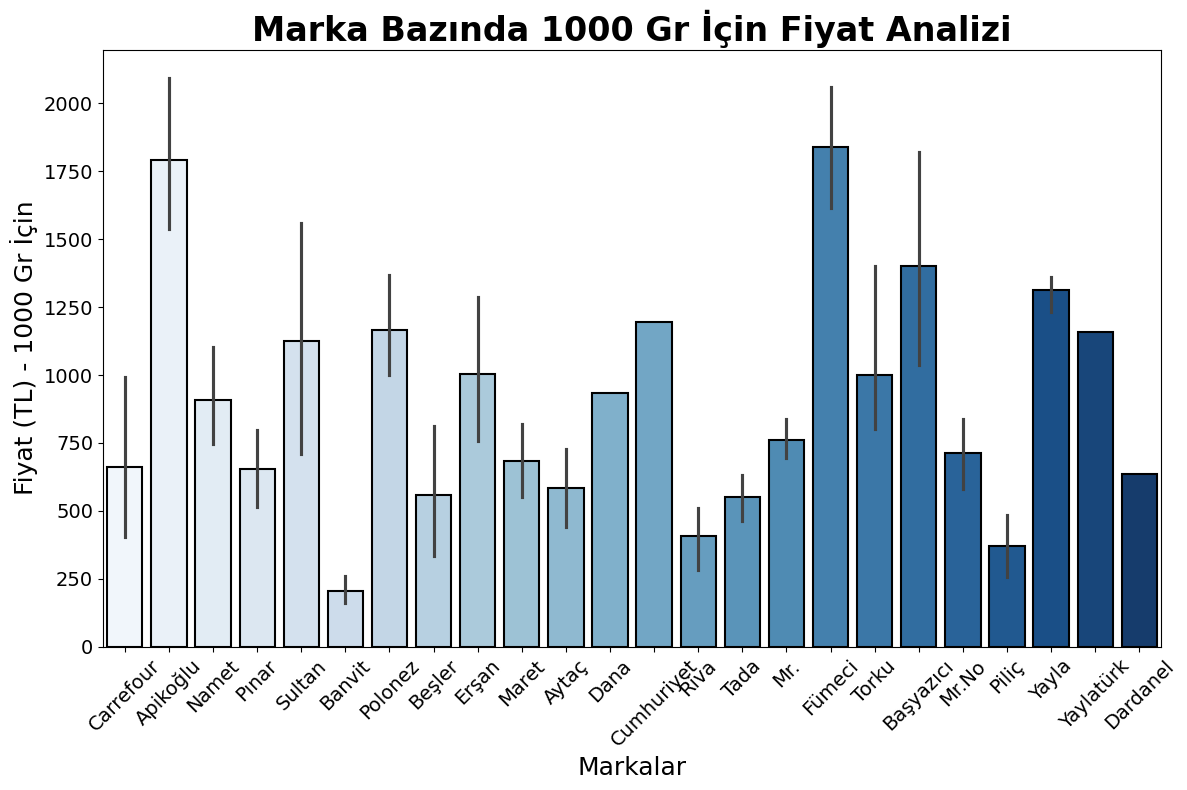

Fiyat Analizi:
         Marka  Fiyat/1000G
0    Carrefour   359.000000
1     Apikoğlu  1811.250000
2        Namet   366.666667
3    Carrefour   290.000000
4    Carrefour   510.000000
..         ...          ...
298      Aytaç   275.800000
299     Banvit   205.000000
300      Mr.No   555.555556
301      Mr.No   999.000000
302      Mr.No   576.153846

[302 rows x 2 columns]


In [34]:
# 1000 gram (1 kg) için fiyatı hesaplayalım
df['Fiyat/1000G'] = df['Fiyat'] / df['Gramaj (G)'] * 1000  # 1000 gram için fiyat hesaplama

# Koyu tema için stil ayarları
plt.style.use('default')

# Grafik boyutunu ayarlayalım
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Marka', y='Fiyat/1000G', data=df, palette='Blues')

# Başlık ve etiketleri ayarlayalım
plt.title('Marka Bazında 1000 Gr İçin Fiyat Analizi', fontsize=24, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Markalar', fontsize=18)
plt.ylabel('Fiyat (TL) - 1000 Gr İçin', fontsize=18)

# Barların etrafında parlak bir çerçeve ekleyelim
for bar in bar_plot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# Grafiği göster
plt.tight_layout()
plt.show()

# Fiyat analizi
print("Fiyat Analizi:")
print(df[['Marka', 'Fiyat/1000G']])

In [35]:
# Marka bazında istatistikler
analiz = df.groupby('Marka')['Fiyat/1000G'].agg(['mean', 'count', 'min', 'max'])
analiz.columns = ['Ortalama Fiyat (TL)', 'Ürün Sayısı', 'Minimum Fiyat (TL)', 'Maksimum Fiyat (TL)']
analiz.reset_index(inplace=True)

# Analiz sonuçlarını göster
print("Marka Bazında Analiz:")
print(analiz)


Marka Bazında Analiz:
         Marka  Ortalama Fiyat (TL)  Ürün Sayısı  Minimum Fiyat (TL)  \
0     Apikoğlu          1793.358438           21          999.500000   
1        Aytaç           584.264170           11          229.285714   
2       Banvit           206.065657            6          125.000000   
3    Başyazıcı          1401.020952           15          199.900000   
4       Beşler           557.333042            6          252.250000   
5    Carrefour           660.805556            6          290.000000   
6   Cumhuriyet          1195.000000            2         1195.000000   
7         Dana           934.500000            1          934.500000   
8     Dardanel           635.757576            1          635.757576   
9        Erşan          1005.192593           15          317.900000   
10      Fümeci          1838.654839           31          819.900000   
11       Maret           684.331405           11          285.000000   
12         Mr.           761.825079       

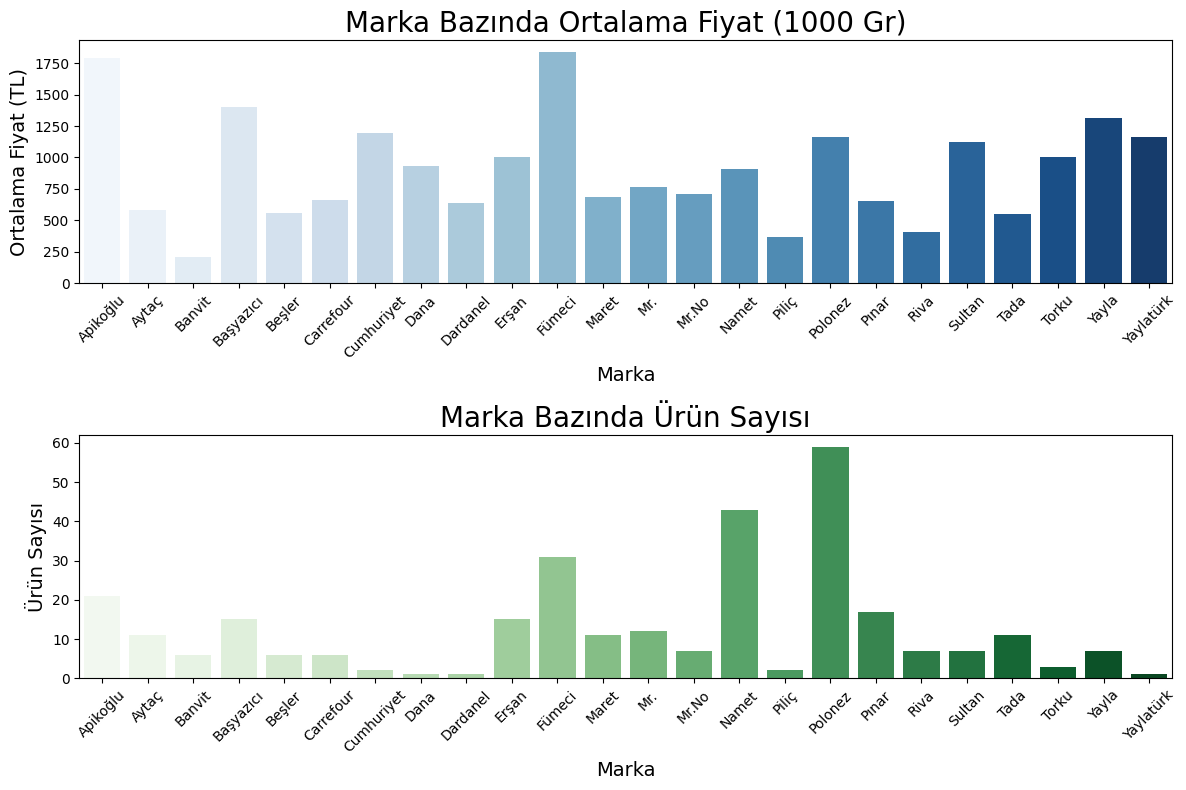

In [36]:
# Grafik ayarları
plt.figure(figsize=(12, 8))

# Ortalama fiyat grafiği
plt.subplot(2, 1, 1)
sns.barplot(x='Marka', y='Ortalama Fiyat (TL)', data=analiz, palette='Blues')
plt.title('Marka Bazında Ortalama Fiyat (1000 Gr)', fontsize=20)
plt.xlabel('Marka', fontsize=14)
plt.ylabel('Ortalama Fiyat (TL)', fontsize=14)
plt.xticks(rotation=45)

# Ürün sayısı grafiği
plt.subplot(2, 1, 2)
sns.barplot(x='Marka', y='Ürün Sayısı', data=analiz, palette='Greens')
plt.title('Marka Bazında Ürün Sayısı', fontsize=20)
plt.xlabel('Marka', fontsize=14)
plt.ylabel('Ürün Sayısı', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


         Marka  Ortalama Fiyat (1 kg TL)               Segment
0     Apikoğlu               1793.358438       Premium Segment
1        Aytaç                584.264170  Uygun Fiyat Segmenti
2       Banvit                206.065657  Uygun Fiyat Segmenti
3    Başyazıcı               1401.020952       Premium Segment
4       Beşler                557.333042  Uygun Fiyat Segmenti
5    Carrefour                660.805556  Uygun Fiyat Segmenti
6   Cumhuriyet               1195.000000          Orta Segment
7         Dana                934.500000          Orta Segment
8     Dardanel                635.757576  Uygun Fiyat Segmenti
9        Erşan               1005.192593          Orta Segment
10      Fümeci               1838.654839       Premium Segment
11       Maret                684.331405  Uygun Fiyat Segmenti
12         Mr.                761.825079  Uygun Fiyat Segmenti
13       Mr.No                713.284526  Uygun Fiyat Segmenti
14       Namet                909.082073          Orta 

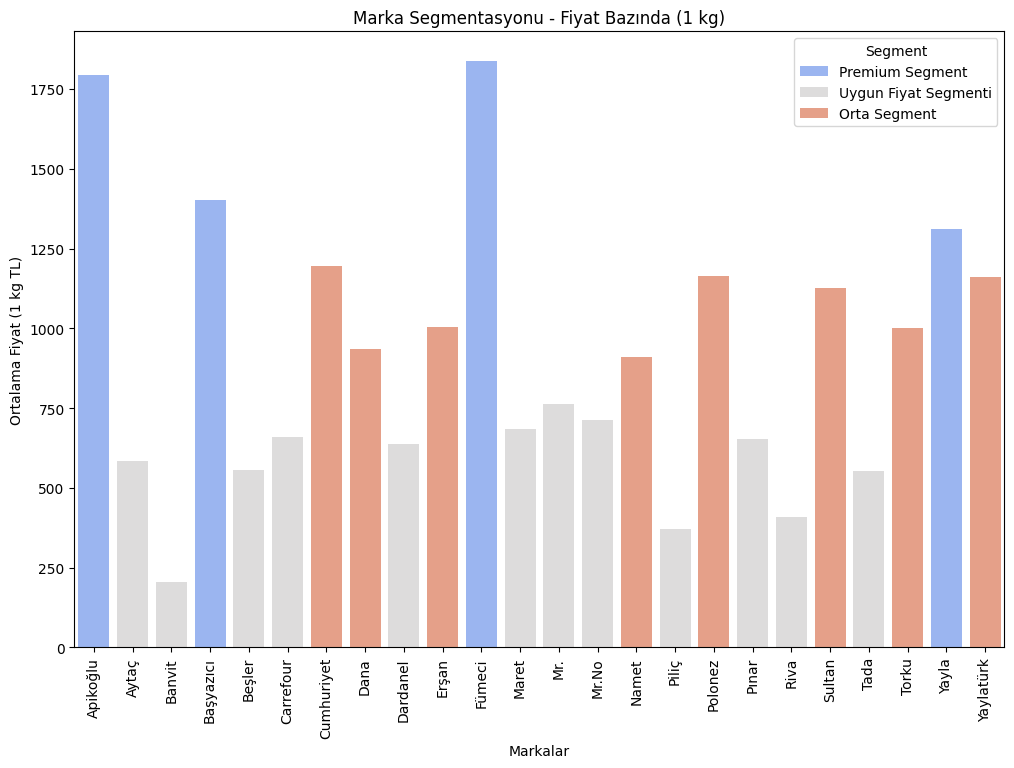

In [38]:
# 1000 gram (1 kg) için fiyatı hesaplayalım
df['Fiyat/1000G'] = df['Fiyat'] / df['Gramaj (G)'] * 1000  # 1000 gram için fiyat hesaplama

# Her markanın ortalama fiyatını hesaplayalım
marka_fiyat_ortalama = df.groupby('Marka')['Fiyat/1000G'].mean()

# Pazarın genel fiyat ortalaması
genel_ortalama_fiyat = df['Fiyat/1000G'].mean()

# Segmentasyon kriterlerini belirleyelim
premium_threshold = genel_ortalama_fiyat * 1.2  # Genel ortalamadan %20 daha yüksek olanlar premium segment
uygun_fiyat_threshold = genel_ortalama_fiyat * 0.8  # Genel ortalamadan %20 daha düşük olanlar uygun fiyat segmenti

# Her markayı fiyat segmentine göre sınıflandıralım
def fiyat_segmenti(fiyat):
    if fiyat >= premium_threshold:
        return 'Premium Segment'
    elif fiyat <= uygun_fiyat_threshold:
        return 'Uygun Fiyat Segmenti'
    else:
        return 'Orta Segment'

# Her marka için segmenti belirleyelim
marka_segmentleri = marka_fiyat_ortalama.apply(fiyat_segmenti)

# Her markayı segmentiyle beraber yazdıralım
segmentasyon_sonuclari = pd.DataFrame({'Marka': marka_fiyat_ortalama.index,
                                       'Ortalama Fiyat (1 kg TL)': marka_fiyat_ortalama.values,
                                       'Segment': marka_segmentleri.values})

print(segmentasyon_sonuclari)

# Segmentlere göre görselleştirelim
plt.figure(figsize=(12, 8))
sns.barplot(x='Marka', y='Ortalama Fiyat (1 kg TL)', hue='Segment', data=segmentasyon_sonuclari, palette='coolwarm')
plt.title('Marka Segmentasyonu - Fiyat Bazında (1 kg)')
plt.xticks(rotation=90)
plt.xlabel('Markalar')
plt.ylabel('Ortalama Fiyat (1 kg TL)')
plt.legend(title='Segment')
plt.show()

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Carrefour Analizi ===
Ortalama Fiyat (1 kg): 660.81 TL
Min Fiyat (1 kg): 290.00 TL, Max Fiyat (1 kg): 1432.50 TL
Ortalama Gramaj: 103.33 g
Min Gramaj: 50.00 g, Max Gramaj: 200.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6608 TL/g
Ürün Çeşitliliği: 6 çeşit ürün
Carrefour pazarda fiyat açısından uygun bir segmentte.


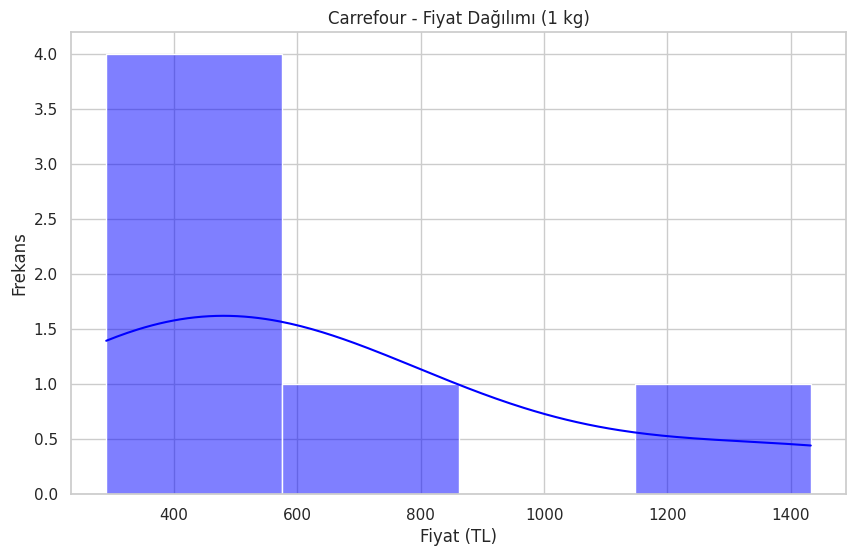

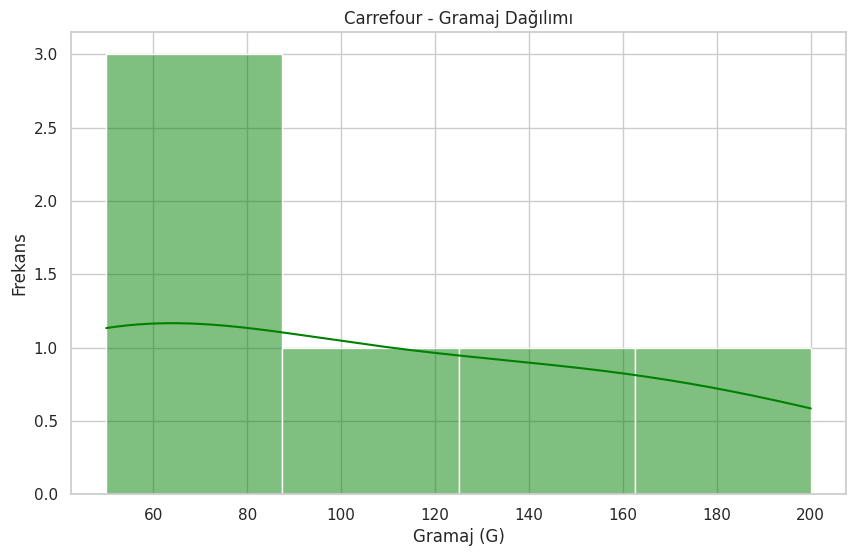

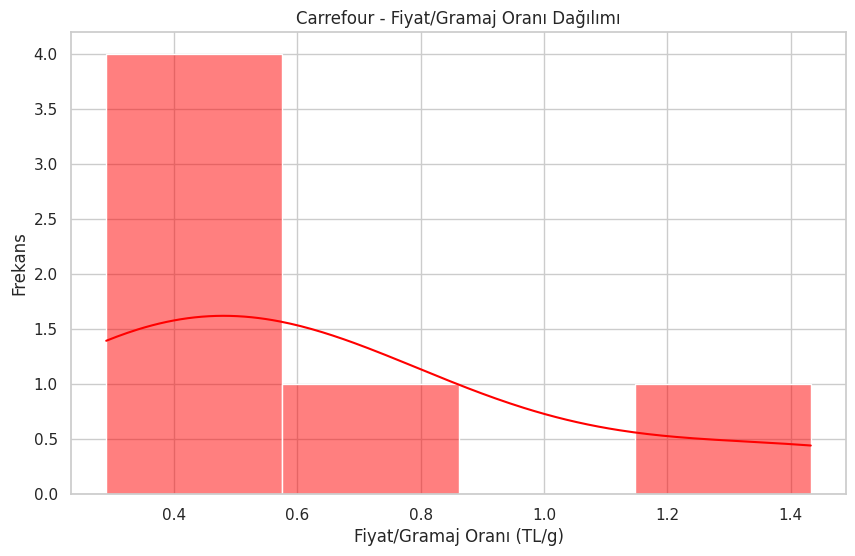

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Apikoğlu Analizi ===
Ortalama Fiyat (1 kg): 1793.36 TL
Min Fiyat (1 kg): 999.50 TL, Max Fiyat (1 kg): 3210.00 TL
Ortalama Gramaj: 508.10 g
Min Gramaj: 80.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.7934 TL/g
Ürün Çeşitliliği: 21 çeşit ürün
Apikoğlu pazarda fiyat açısından premium bir segmentte.


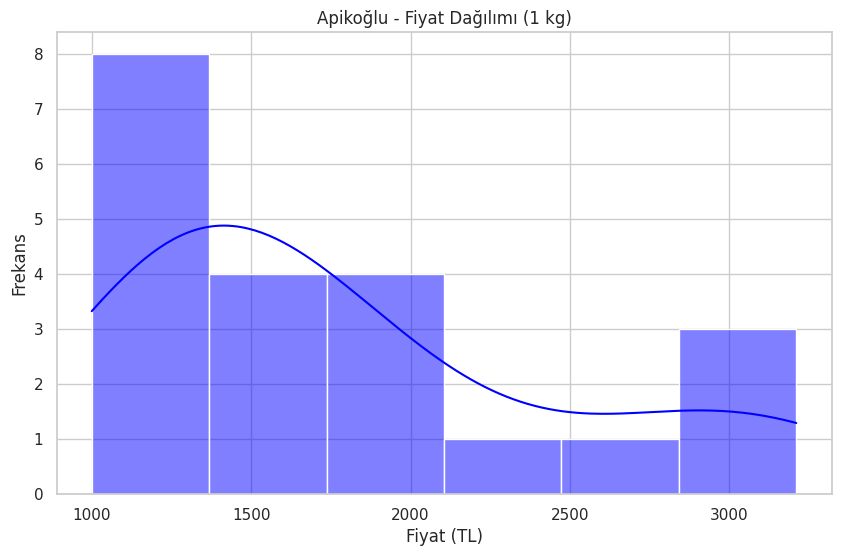

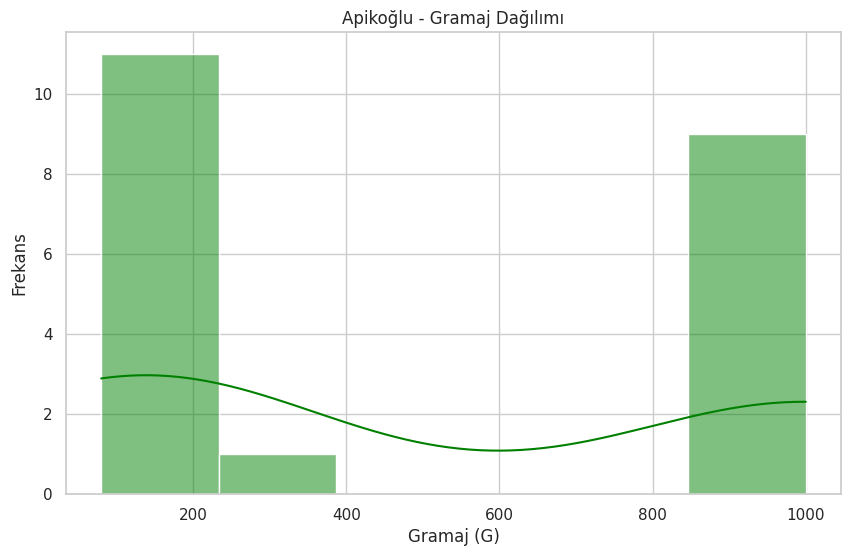

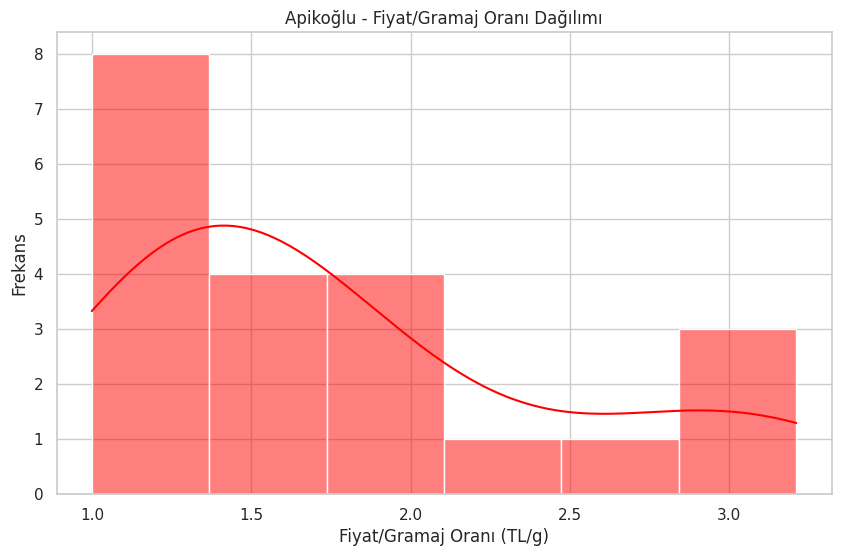

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Namet Analizi ===
Ortalama Fiyat (1 kg): 909.08 TL
Min Fiyat (1 kg): 85.90 TL, Max Fiyat (1 kg): 3422.31 TL
Ortalama Gramaj: 660.47 g
Min Gramaj: 50.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.9091 TL/g
Ürün Çeşitliliği: 43 çeşit ürün
Namet pazarda fiyat açısından uygun bir segmentte.


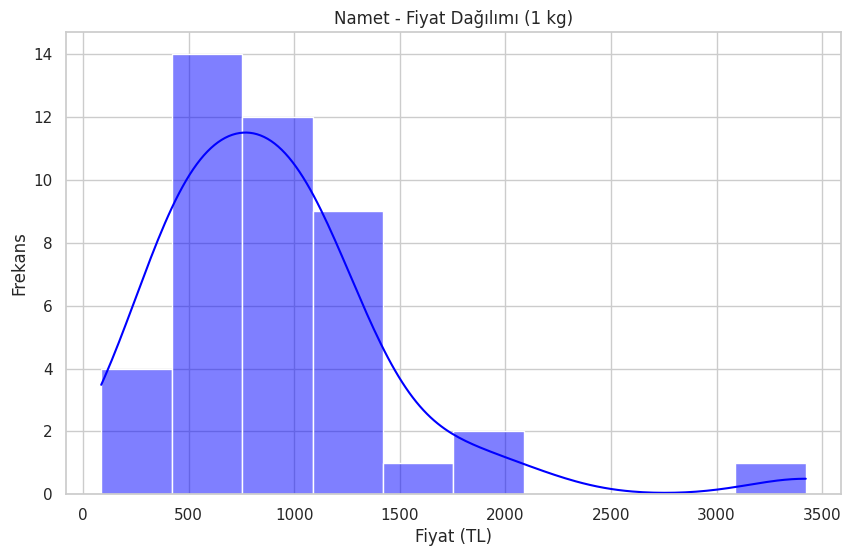

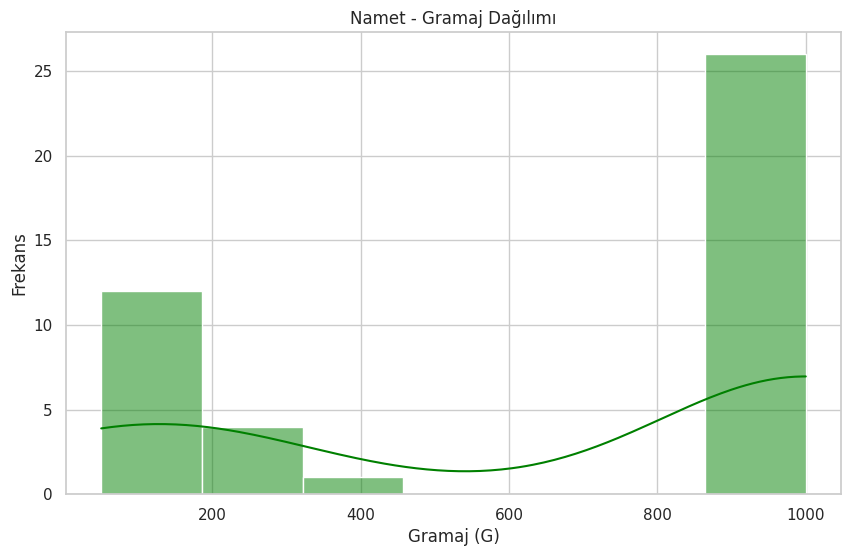

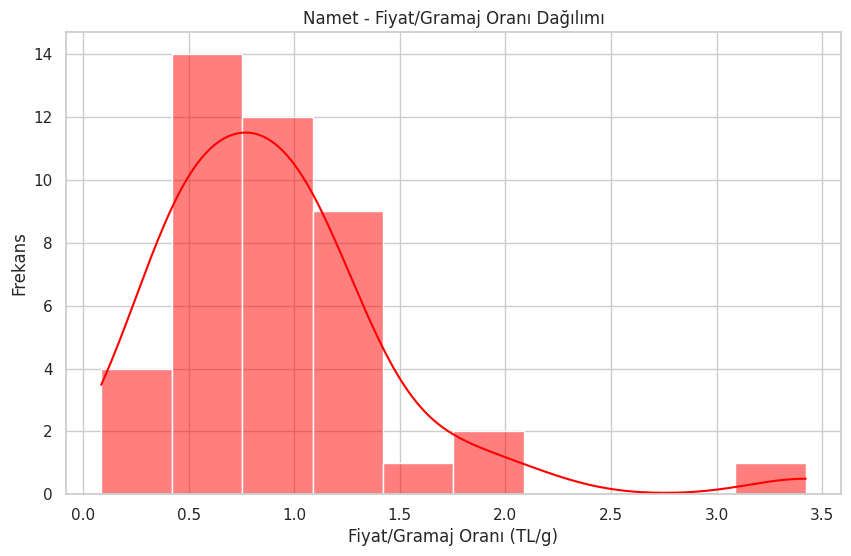

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Pınar Analizi ===
Ortalama Fiyat (1 kg): 653.70 TL
Min Fiyat (1 kg): 238.21 TL, Max Fiyat (1 kg): 1165.00 TL
Ortalama Gramaj: 223.24 g
Min Gramaj: 50.00 g, Max Gramaj: 700.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6537 TL/g
Ürün Çeşitliliği: 17 çeşit ürün
Pınar pazarda fiyat açısından uygun bir segmentte.


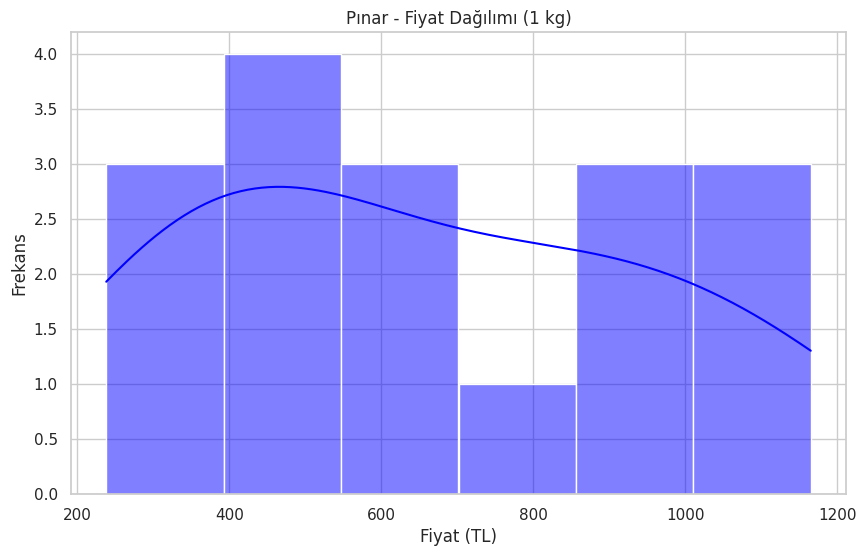

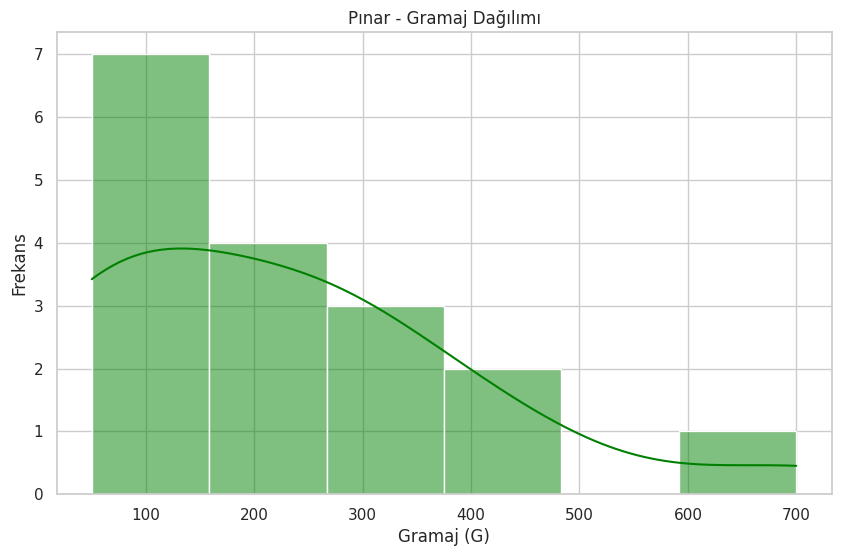

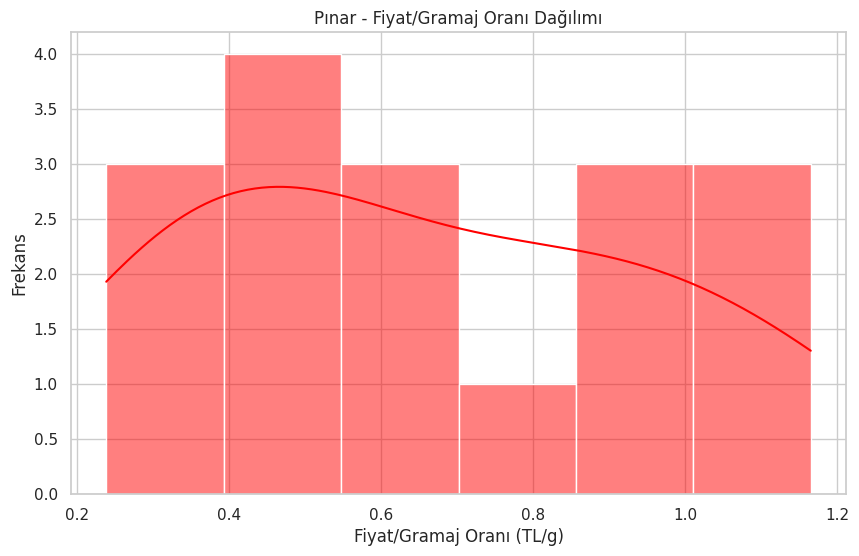

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Sultan Analizi ===
Ortalama Fiyat (1 kg): 1125.34 TL
Min Fiyat (1 kg): 399.90 TL, Max Fiyat (1 kg): 2162.50 TL
Ortalama Gramaj: 494.29 g
Min Gramaj: 60.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1253 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Sultan pazarda fiyat açısından premium bir segmentte.


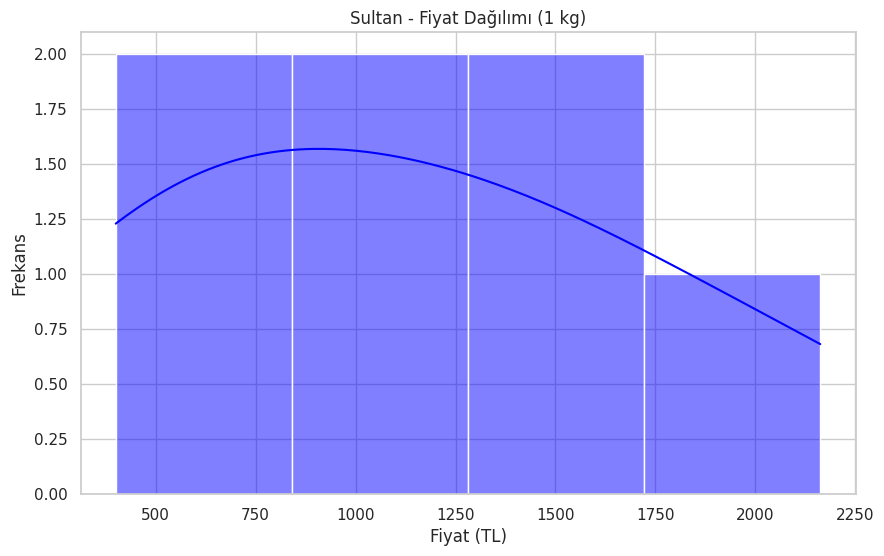

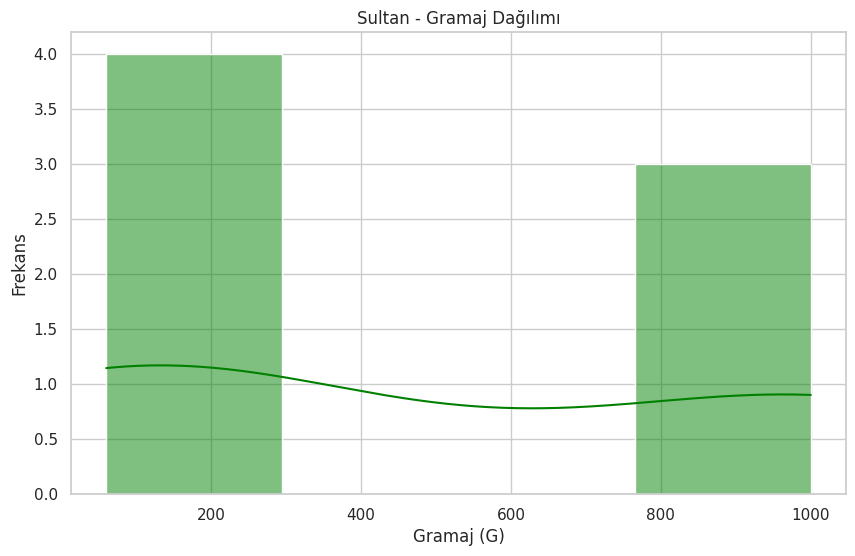

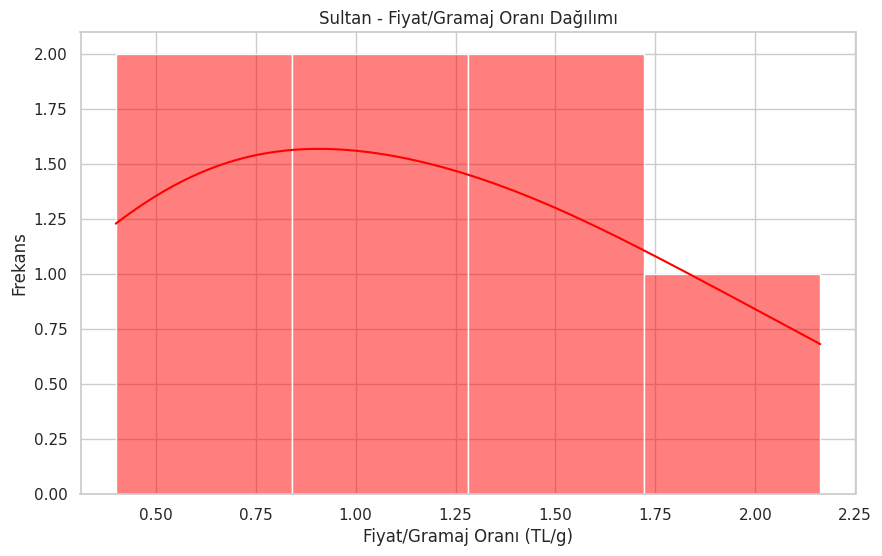

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Banvit Analizi ===
Ortalama Fiyat (1 kg): 206.07 TL
Min Fiyat (1 kg): 125.00 TL, Max Fiyat (1 kg): 316.67 TL
Ortalama Gramaj: 431.67 g
Min Gramaj: 60.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.2061 TL/g
Ürün Çeşitliliği: 6 çeşit ürün
Banvit pazarda fiyat açısından uygun bir segmentte.


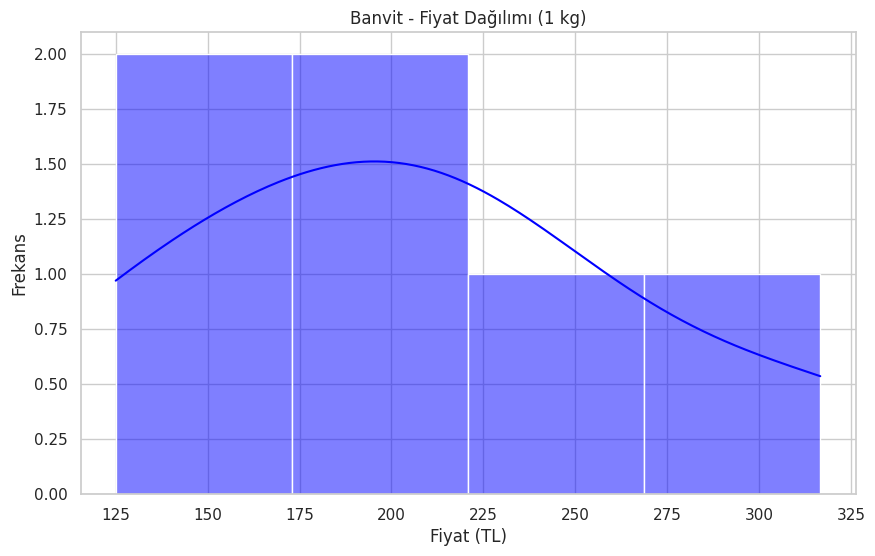

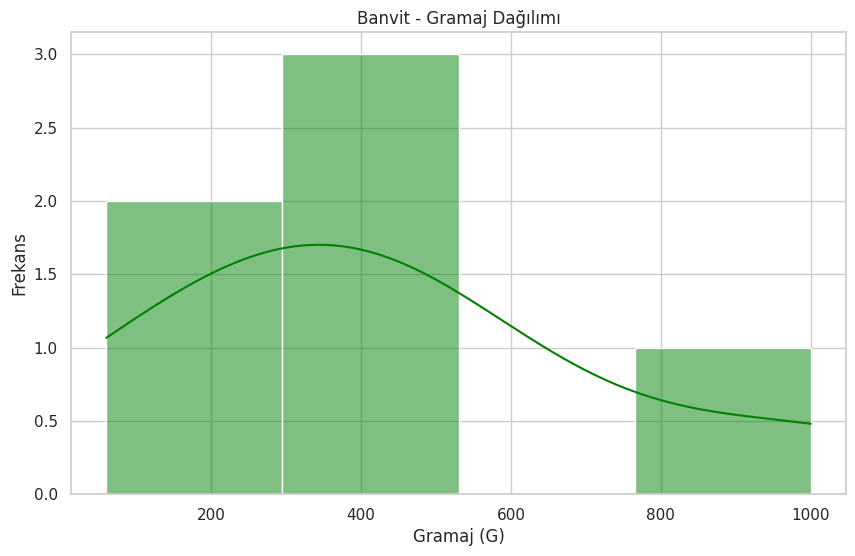

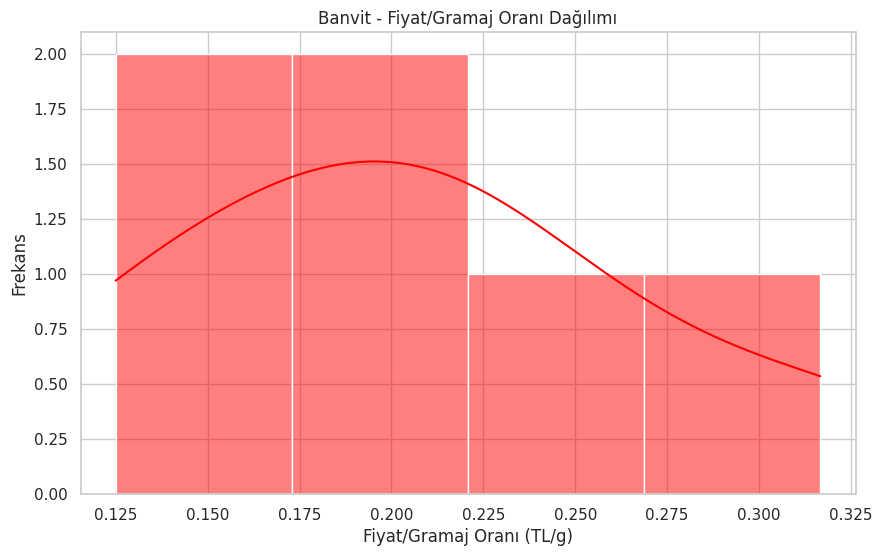

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Polonez Analizi ===
Ortalama Fiyat (1 kg): 1164.84 TL
Min Fiyat (1 kg): 79.90 TL, Max Fiyat (1 kg): 3479.90 TL
Ortalama Gramaj: 729.24 g
Min Gramaj: 50.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1648 TL/g
Ürün Çeşitliliği: 58 çeşit ürün
Polonez pazarda fiyat açısından premium bir segmentte.


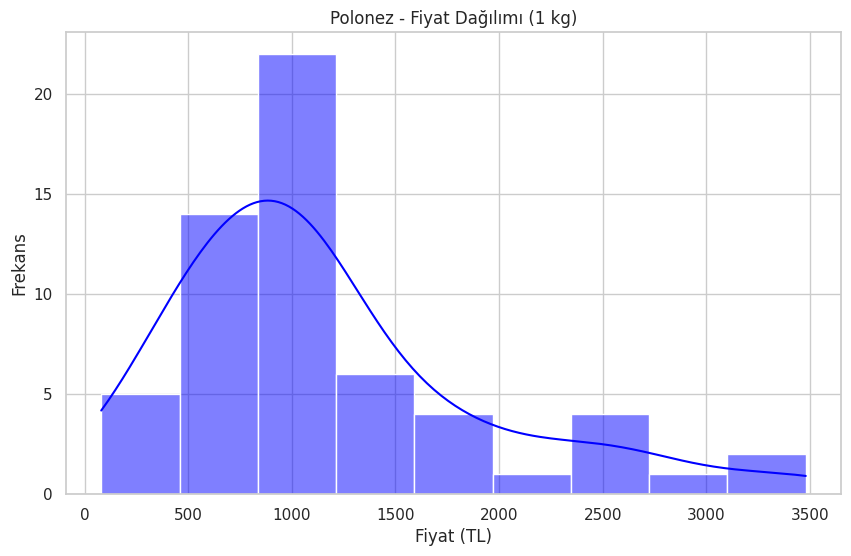

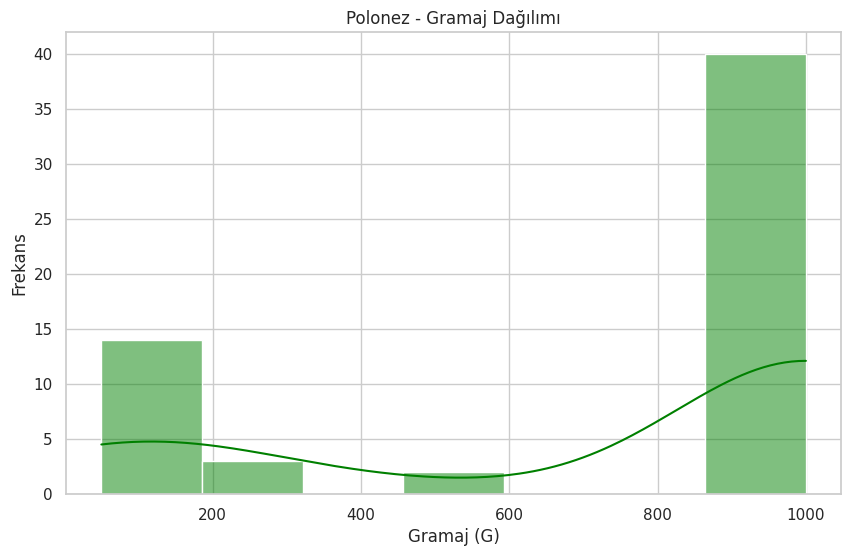

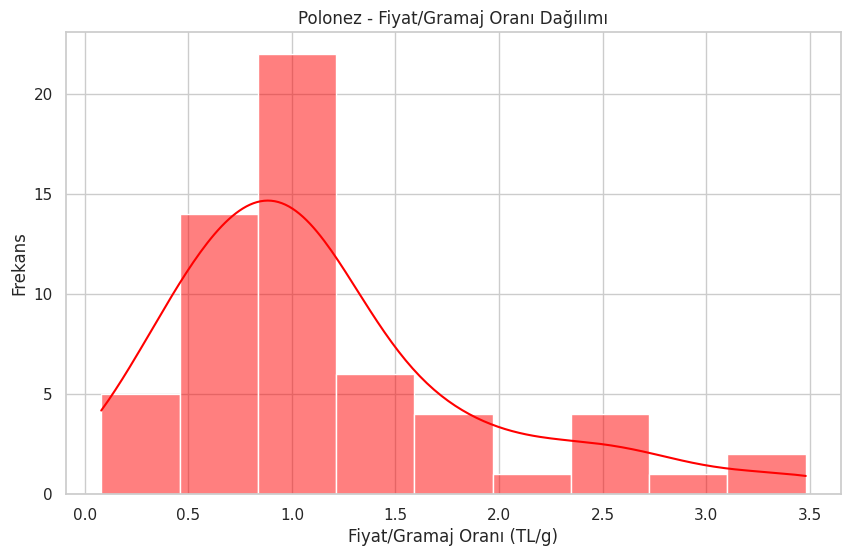

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Beşler Analizi ===
Ortalama Fiyat (1 kg): 557.33 TL
Min Fiyat (1 kg): 252.25 TL, Max Fiyat (1 kg): 990.00 TL
Ortalama Gramaj: 200.83 g
Min Gramaj: 50.00 g, Max Gramaj: 400.00 g
Ortalama Fiyat/Gramaj Oranı: 0.5573 TL/g
Ürün Çeşitliliği: 6 çeşit ürün
Beşler pazarda fiyat açısından uygun bir segmentte.


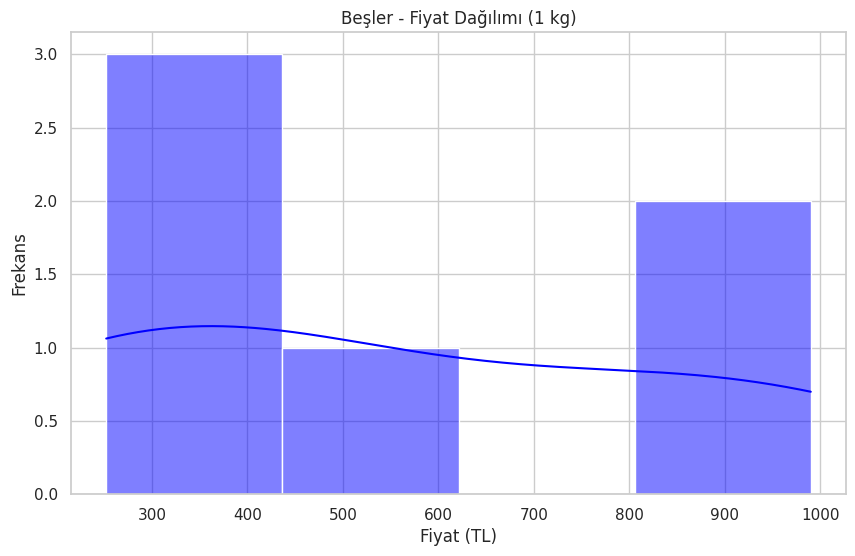

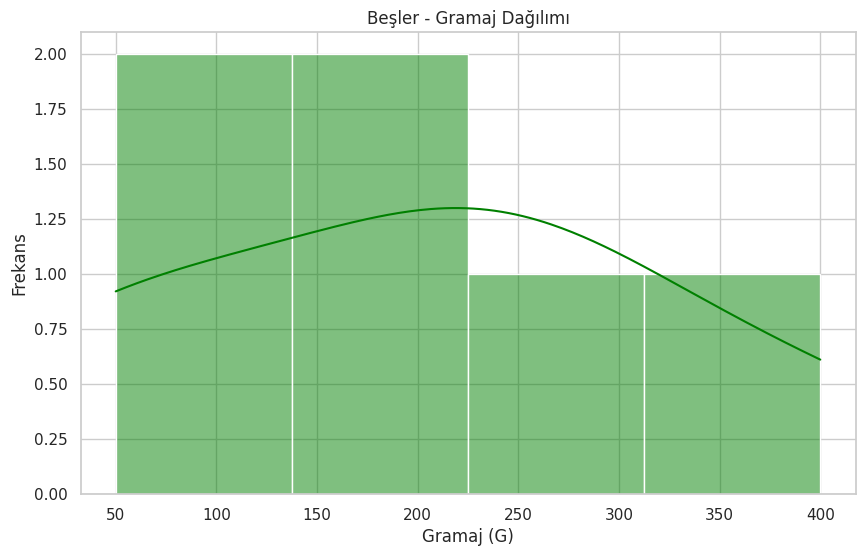

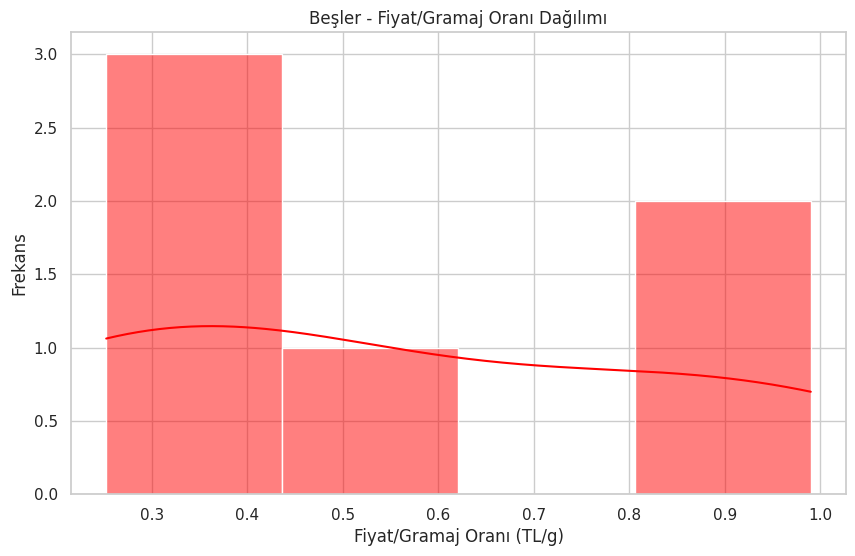

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Erşan Analizi ===
Ortalama Fiyat (1 kg): 1005.19 TL
Min Fiyat (1 kg): 317.90 TL, Max Fiyat (1 kg): 2250.00 TL
Ortalama Gramaj: 488.67 g
Min Gramaj: 90.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.0052 TL/g
Ürün Çeşitliliği: 15 çeşit ürün
Erşan pazarda fiyat açısından uygun bir segmentte.


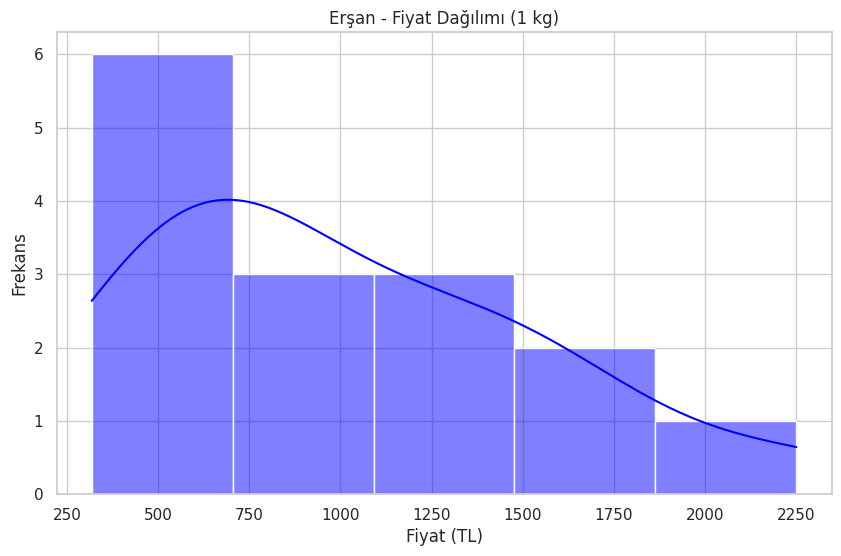

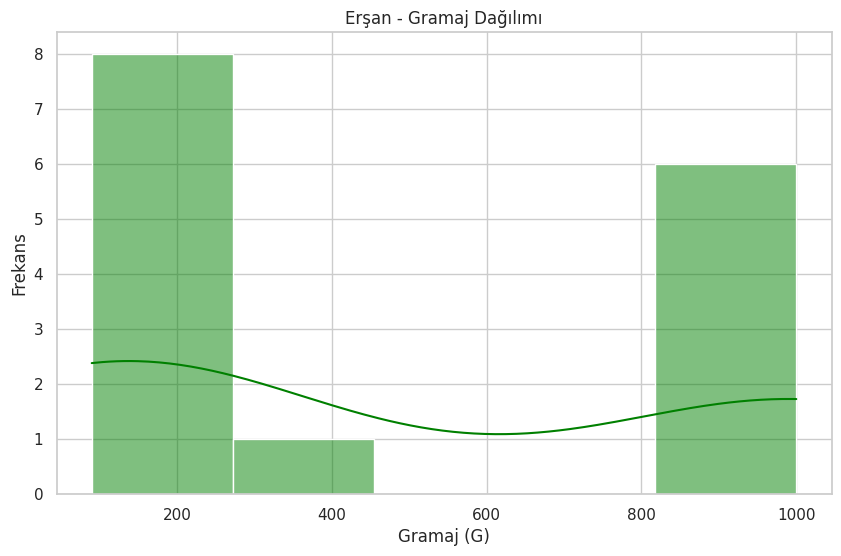

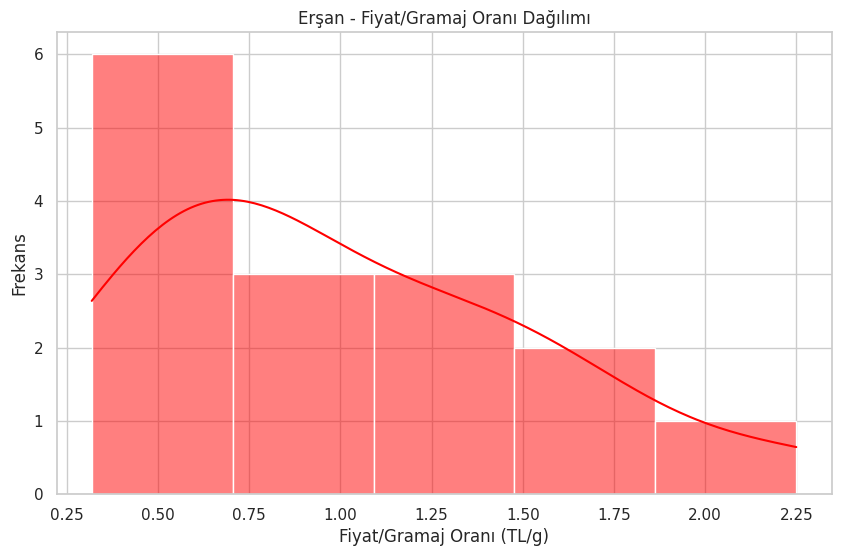

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Maret Analizi ===
Ortalama Fiyat (1 kg): 684.33 TL
Min Fiyat (1 kg): 285.00 TL, Max Fiyat (1 kg): 1160.00 TL
Ortalama Gramaj: 258.36 g
Min Gramaj: 50.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6843 TL/g
Ürün Çeşitliliği: 11 çeşit ürün
Maret pazarda fiyat açısından uygun bir segmentte.


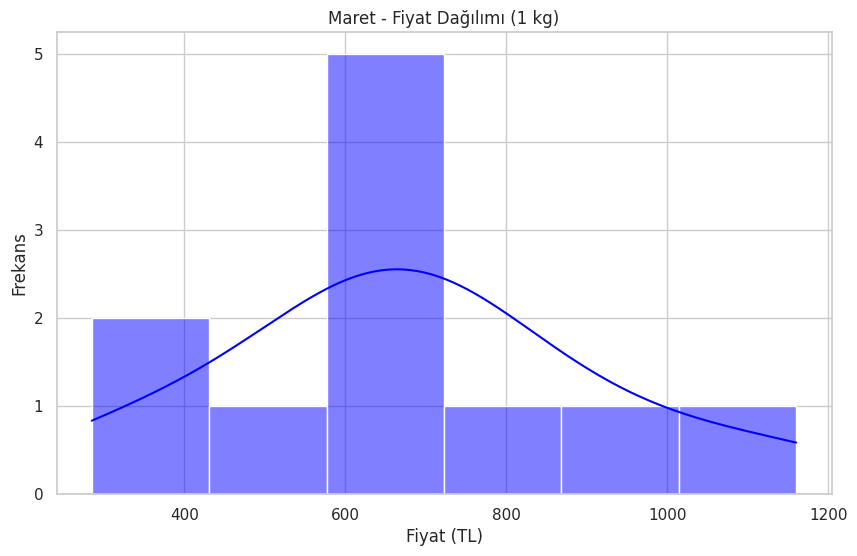

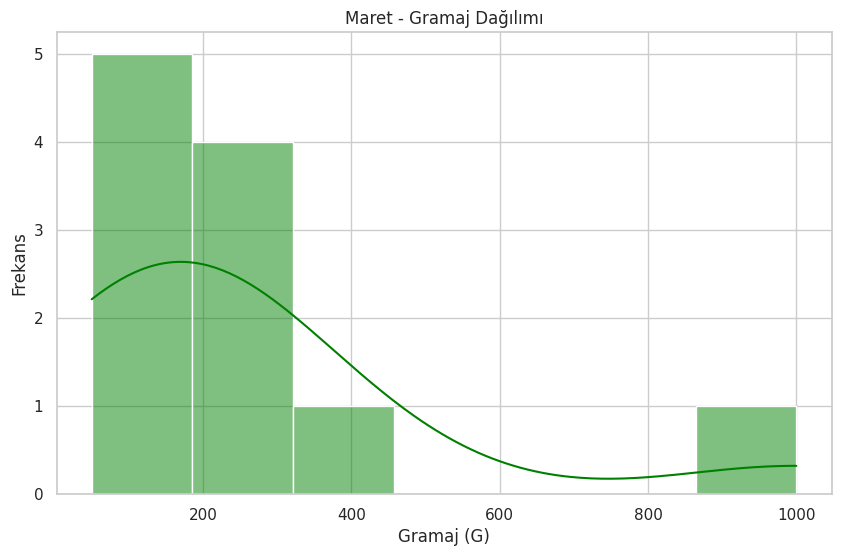

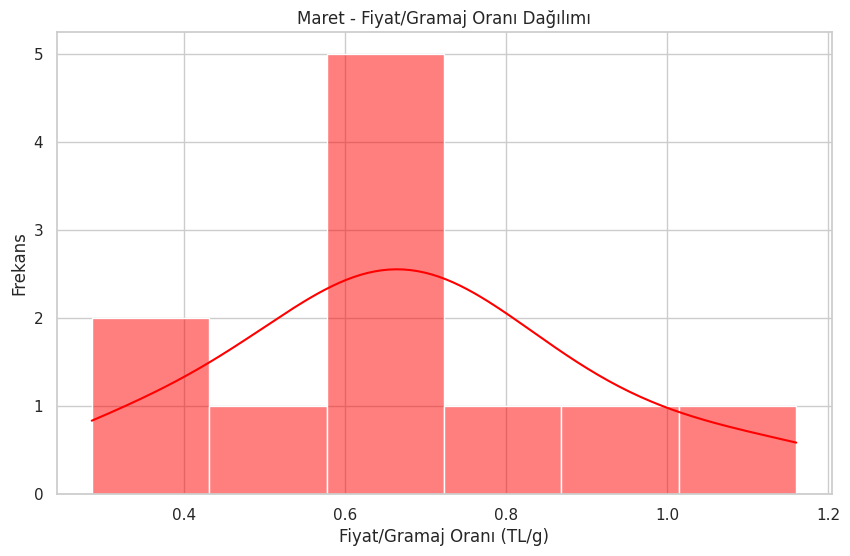

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Aytaç Analizi ===
Ortalama Fiyat (1 kg): 584.26 TL
Min Fiyat (1 kg): 229.29 TL, Max Fiyat (1 kg): 972.14 TL
Ortalama Gramaj: 235.00 g
Min Gramaj: 50.00 g, Max Gramaj: 500.00 g
Ortalama Fiyat/Gramaj Oranı: 0.5843 TL/g
Ürün Çeşitliliği: 11 çeşit ürün
Aytaç pazarda fiyat açısından uygun bir segmentte.


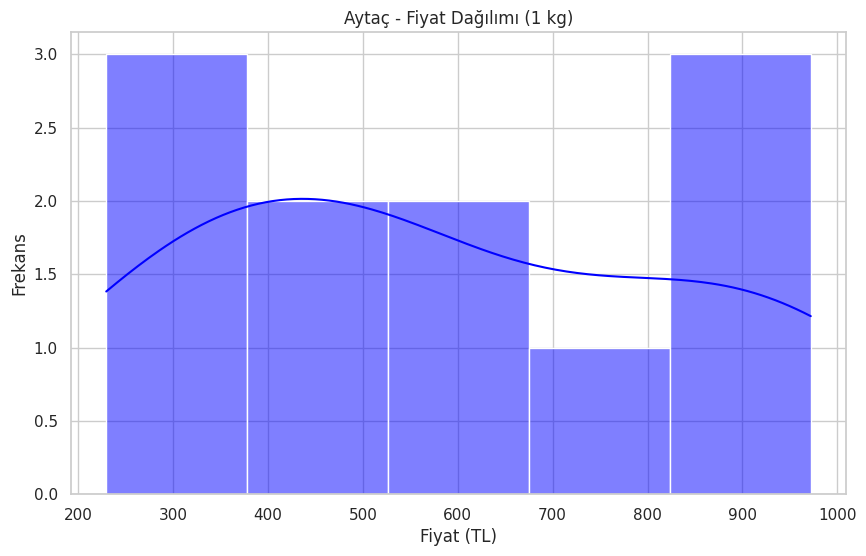

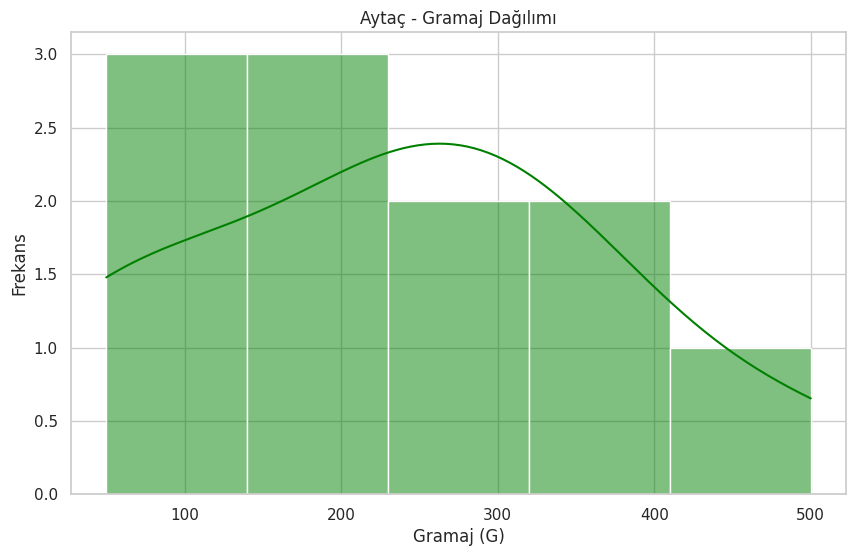

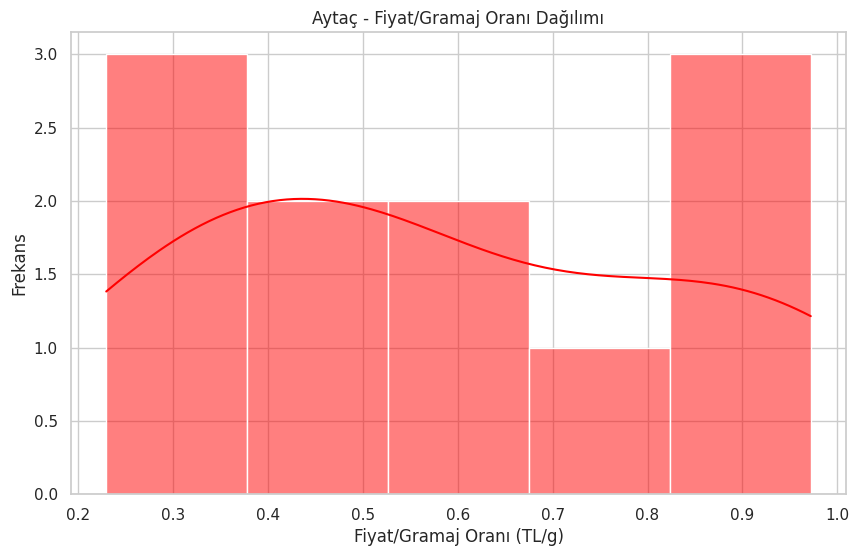

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Dana Analizi ===
Ortalama Fiyat (1 kg): 934.50 TL
Min Fiyat (1 kg): 934.50 TL, Max Fiyat (1 kg): 934.50 TL
Ortalama Gramaj: 200.00 g
Min Gramaj: 200.00 g, Max Gramaj: 200.00 g
Ortalama Fiyat/Gramaj Oranı: 0.9345 TL/g
Ürün Çeşitliliği: 1 çeşit ürün
Dana pazarda fiyat açısından uygun bir segmentte.


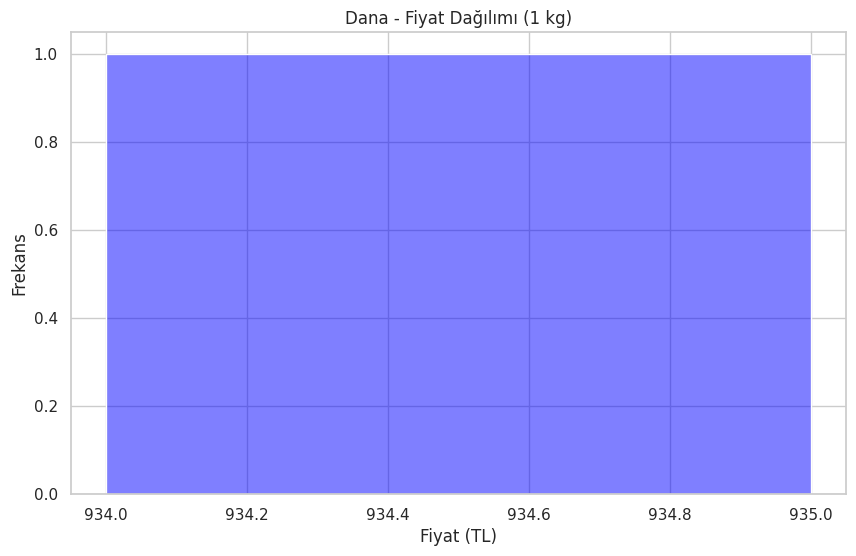

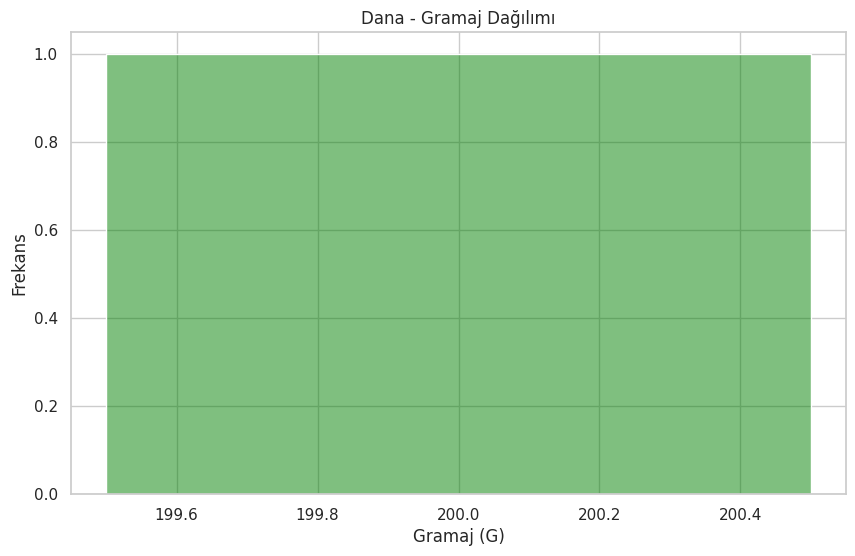

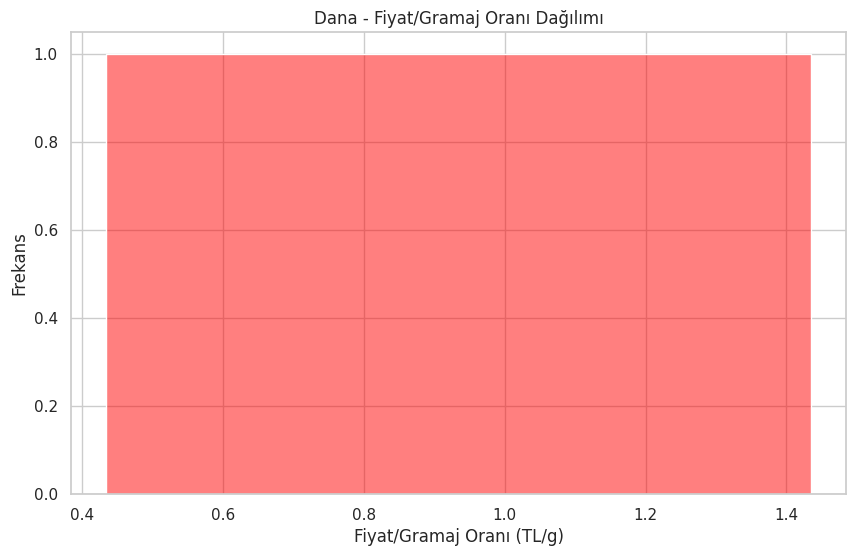

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Cumhuriyet Analizi ===
Ortalama Fiyat (1 kg): 1195.00 TL
Min Fiyat (1 kg): 1195.00 TL, Max Fiyat (1 kg): 1195.00 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1950 TL/g
Ürün Çeşitliliği: 2 çeşit ürün
Cumhuriyet pazarda fiyat açısından premium bir segmentte.


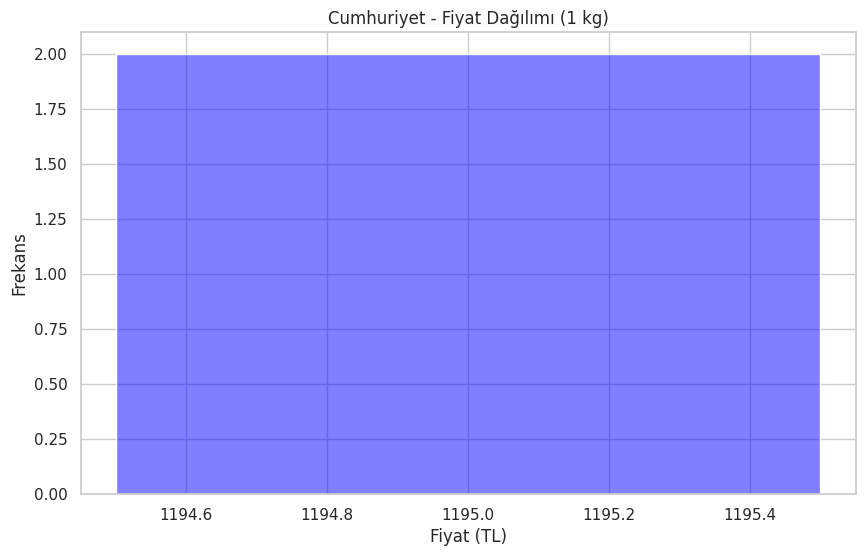

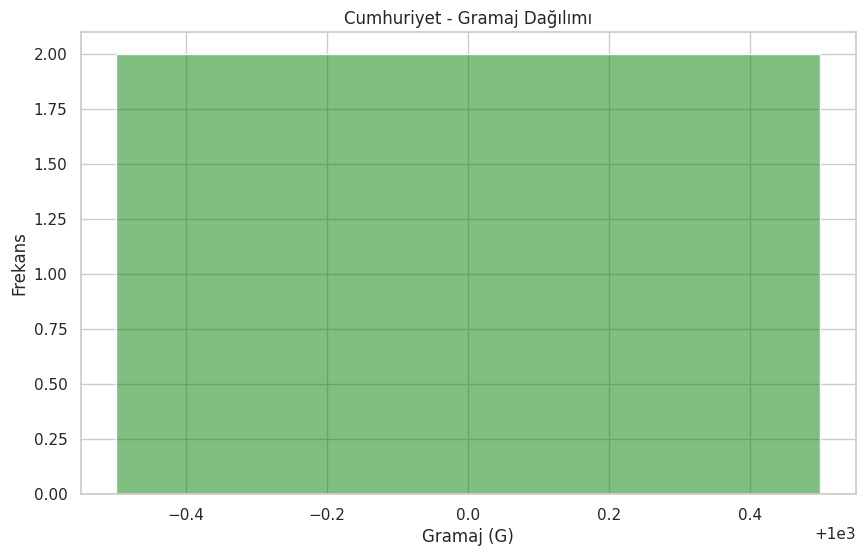

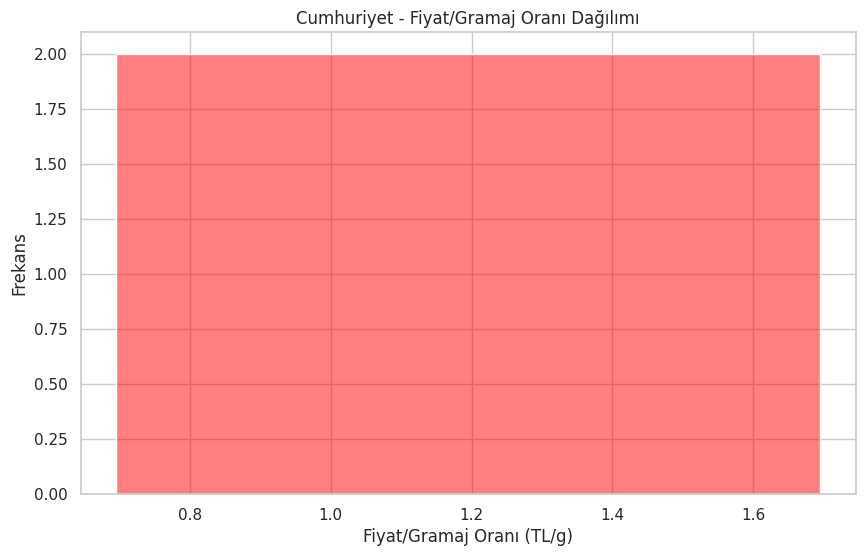

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Riva Analizi ===
Ortalama Fiyat (1 kg): 408.28 TL
Min Fiyat (1 kg): 252.78 TL, Max Fiyat (1 kg): 613.79 TL
Ortalama Gramaj: 143.57 g
Min Gramaj: 130.00 g, Max Gramaj: 180.00 g
Ortalama Fiyat/Gramaj Oranı: 0.4083 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Riva pazarda fiyat açısından uygun bir segmentte.


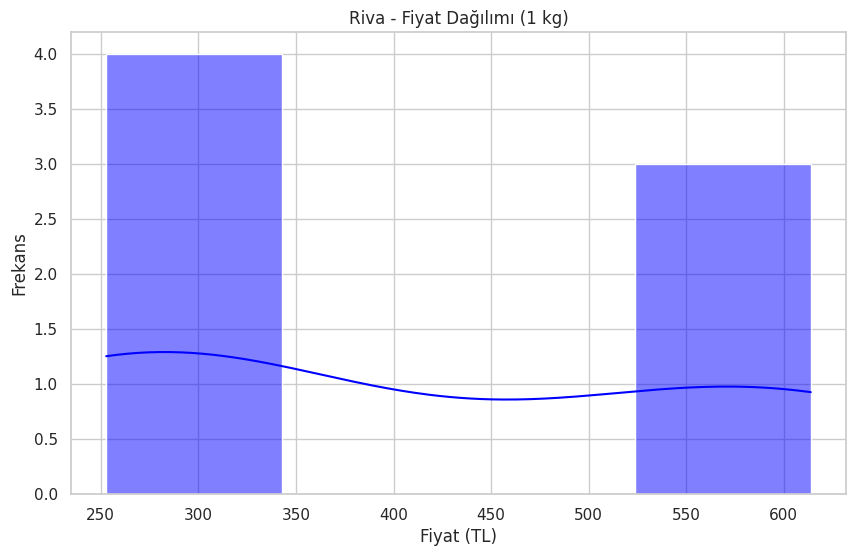

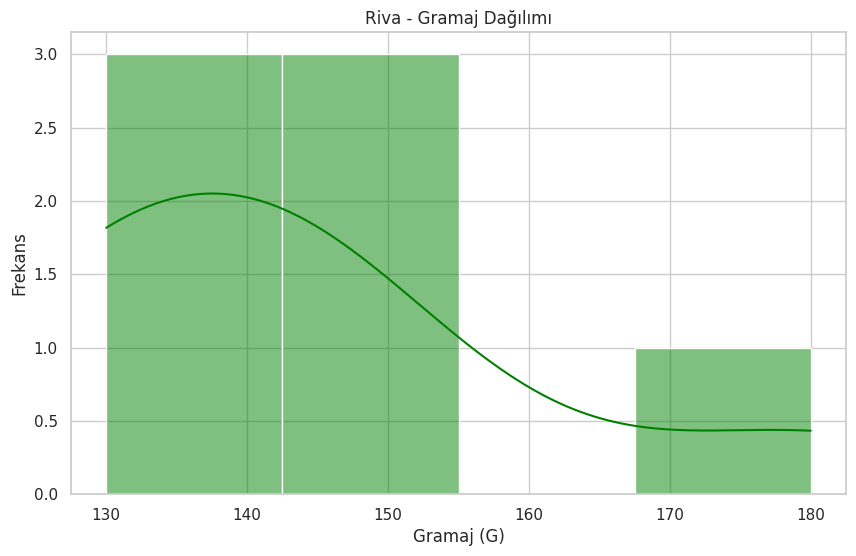

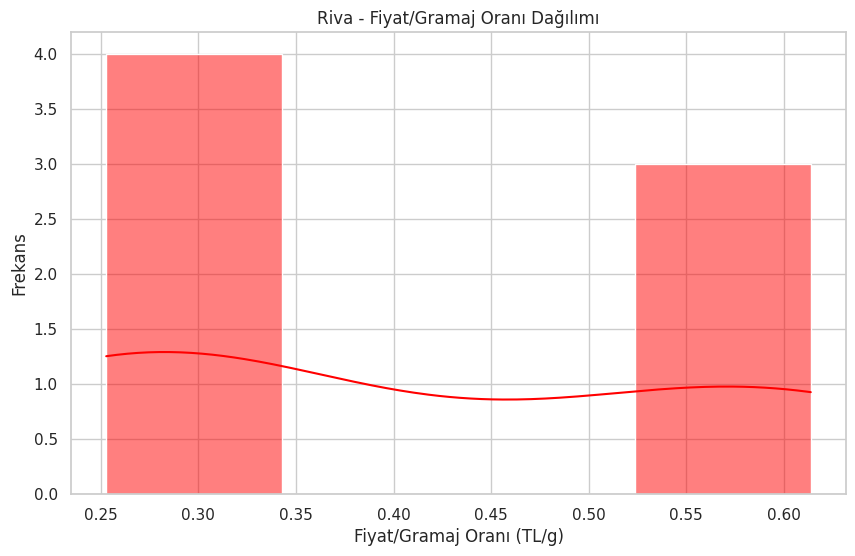

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Tada Analizi ===
Ortalama Fiyat (1 kg): 551.26 TL
Min Fiyat (1 kg): 250.00 TL, Max Fiyat (1 kg): 750.00 TL
Ortalama Gramaj: 168.18 g
Min Gramaj: 160.00 g, Max Gramaj: 220.00 g
Ortalama Fiyat/Gramaj Oranı: 0.5513 TL/g
Ürün Çeşitliliği: 11 çeşit ürün
Tada pazarda fiyat açısından uygun bir segmentte.


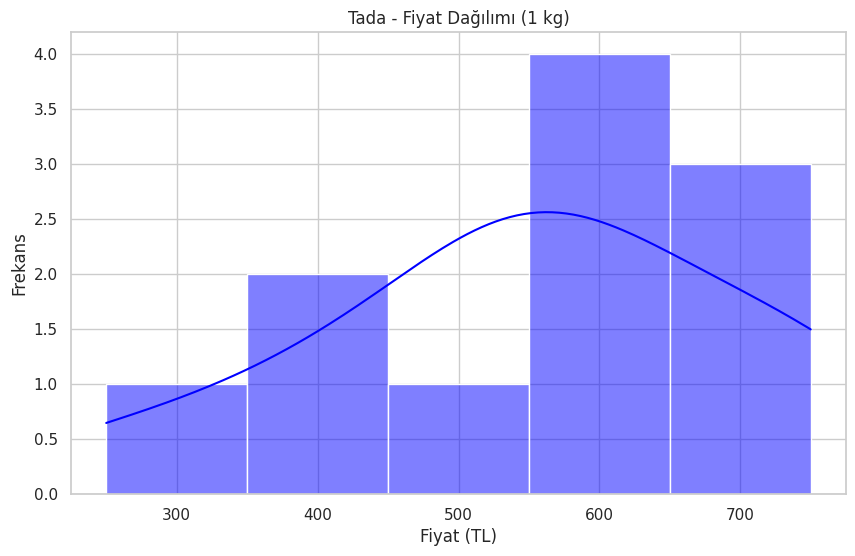

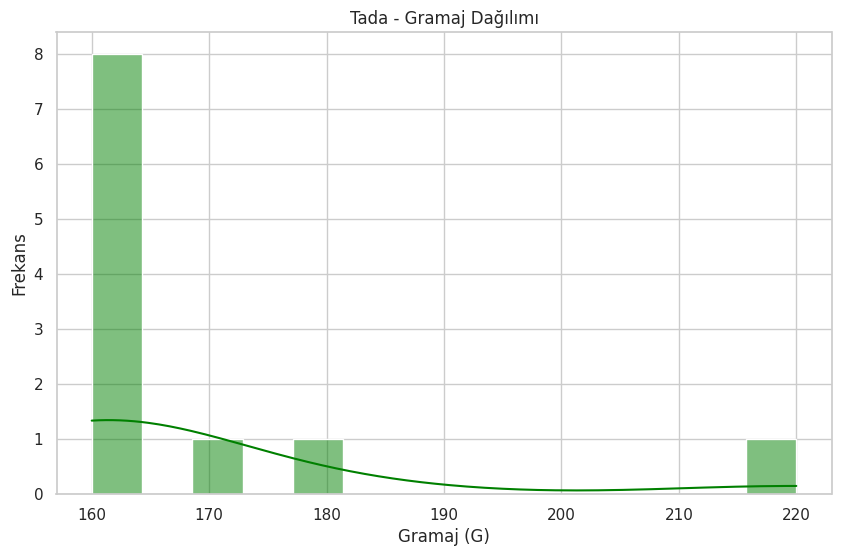

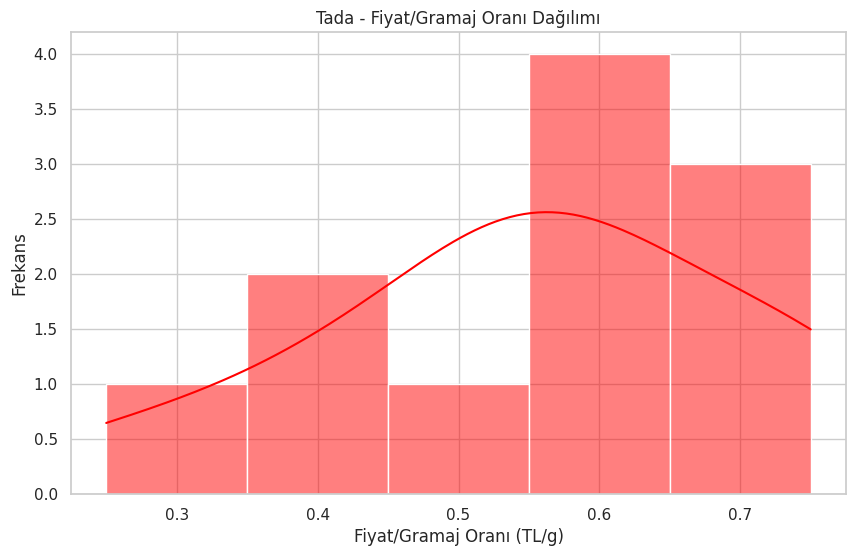

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Mr. Analizi ===
Ortalama Fiyat (1 kg): 761.83 TL
Min Fiyat (1 kg): 567.03 TL, Max Fiyat (1 kg): 1000.00 TL
Ortalama Gramaj: 163.33 g
Min Gramaj: 145.00 g, Max Gramaj: 230.00 g
Ortalama Fiyat/Gramaj Oranı: 0.7618 TL/g
Ürün Çeşitliliği: 12 çeşit ürün
Mr. pazarda fiyat açısından uygun bir segmentte.


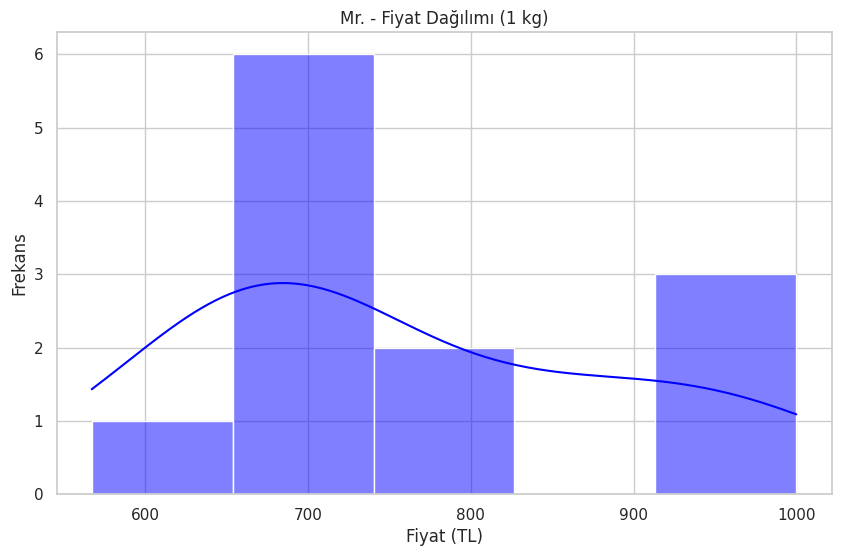

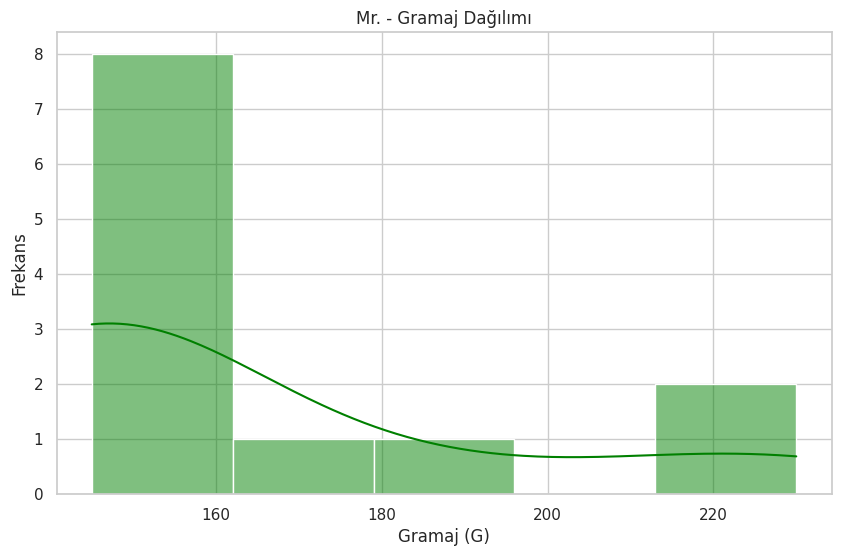

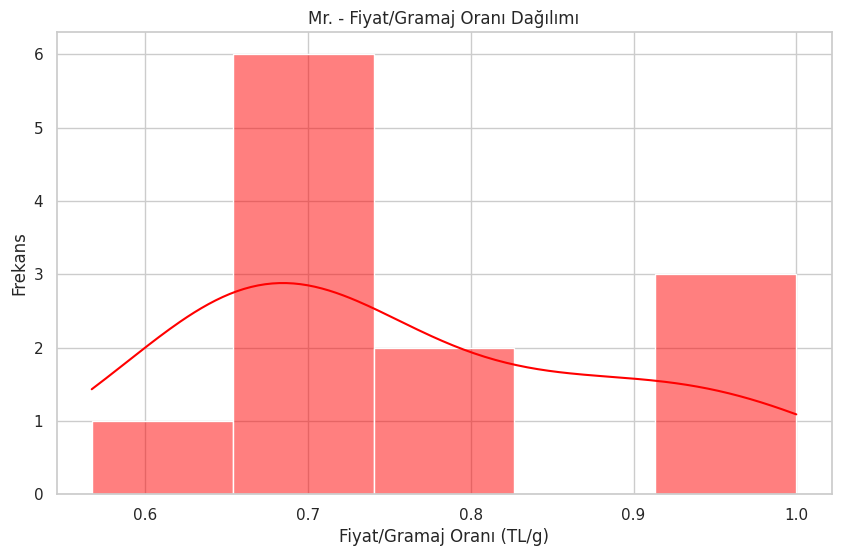

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Fümeci Analizi ===
Ortalama Fiyat (1 kg): 1838.65 TL
Min Fiyat (1 kg): 819.90 TL, Max Fiyat (1 kg): 3099.90 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.8387 TL/g
Ürün Çeşitliliği: 31 çeşit ürün
Fümeci pazarda fiyat açısından premium bir segmentte.


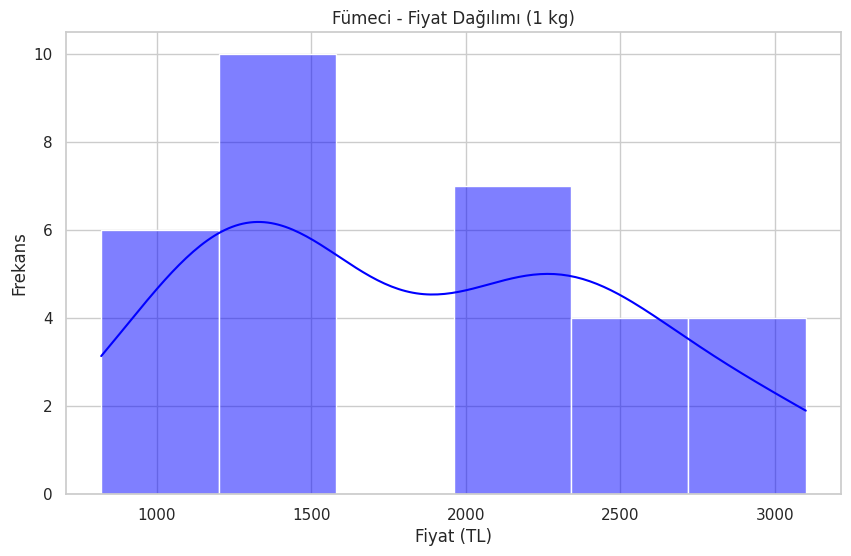

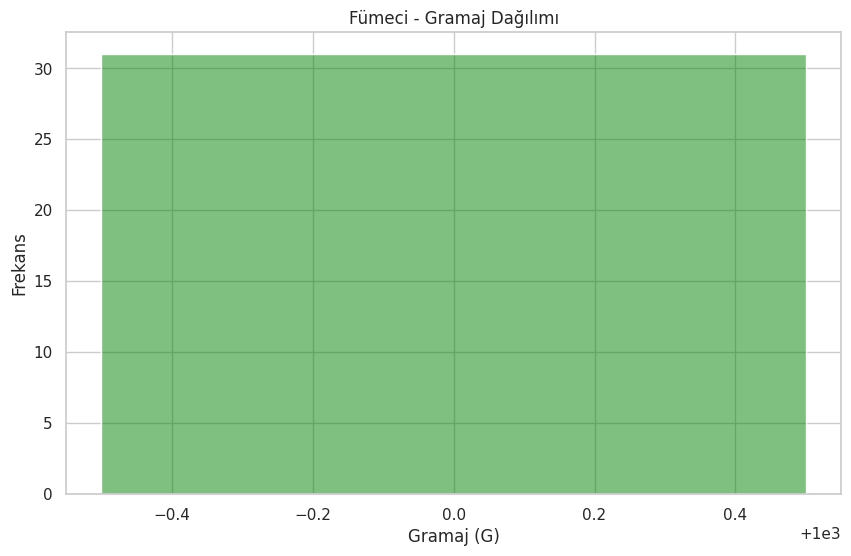

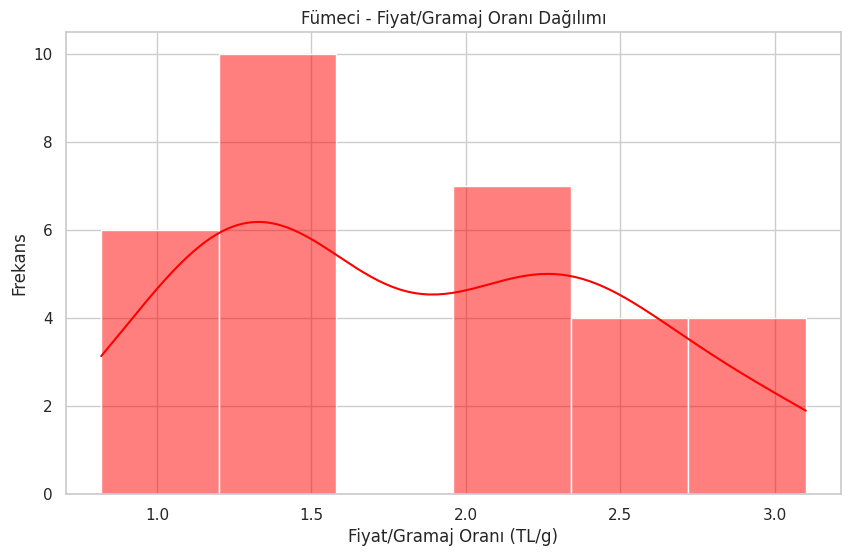

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Torku Analizi ===
Ortalama Fiyat (1 kg): 999.90 TL
Min Fiyat (1 kg): 799.90 TL, Max Fiyat (1 kg): 1399.90 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 0.9999 TL/g
Ürün Çeşitliliği: 3 çeşit ürün
Torku pazarda fiyat açısından uygun bir segmentte.


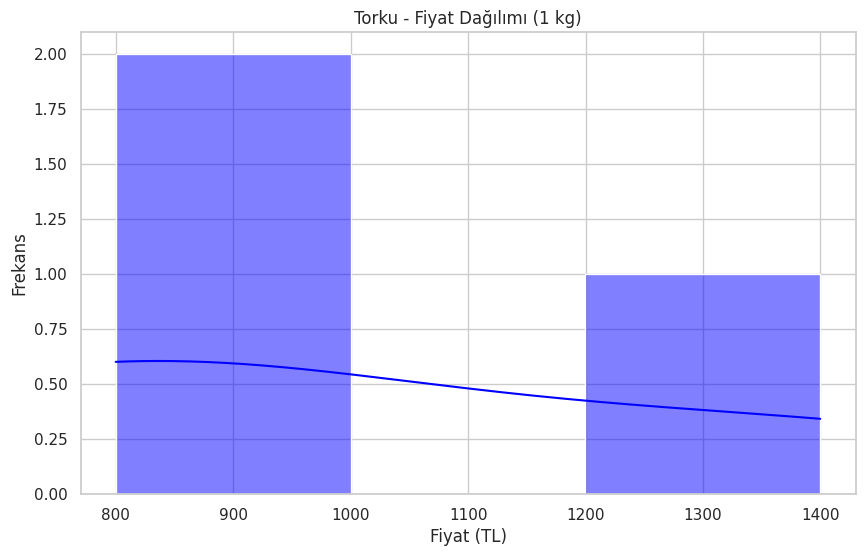

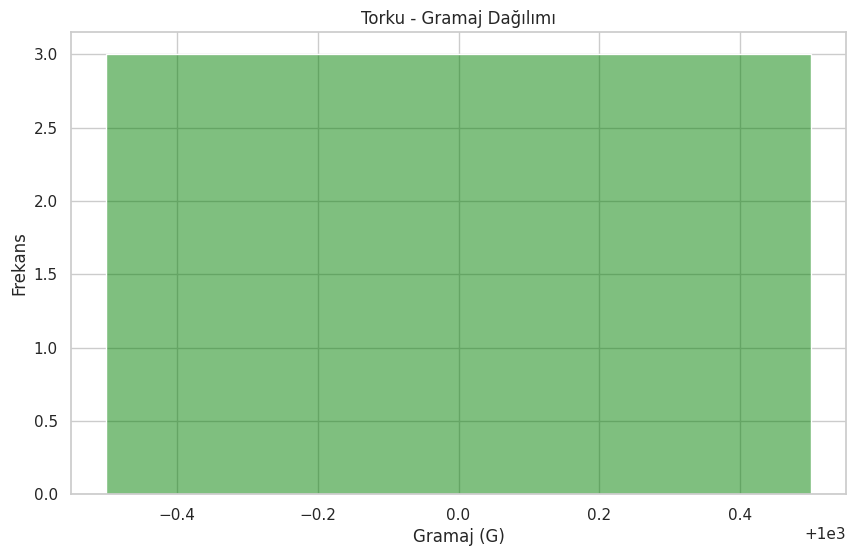

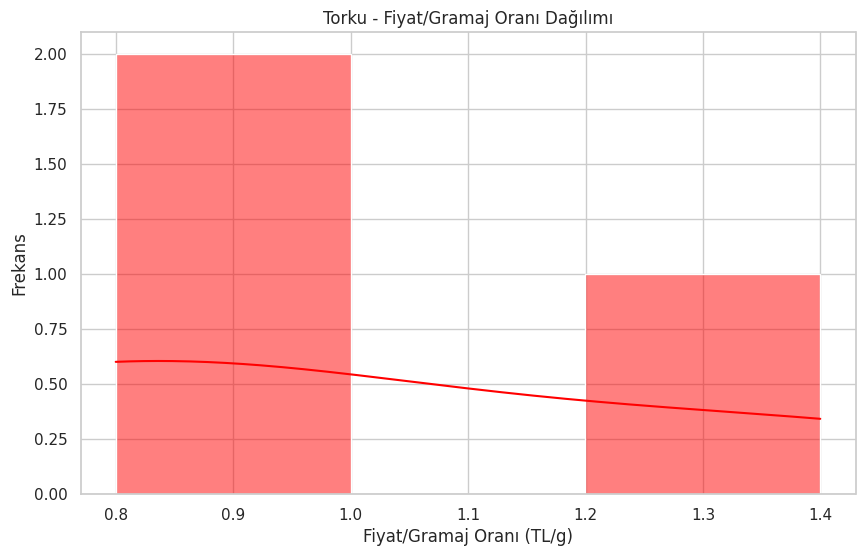

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Başyazıcı Analizi ===
Ortalama Fiyat (1 kg): 1401.02 TL
Min Fiyat (1 kg): 199.90 TL, Max Fiyat (1 kg): 2999.00 TL
Ortalama Gramaj: 514.67 g
Min Gramaj: 100.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.4010 TL/g
Ürün Çeşitliliği: 15 çeşit ürün
Başyazıcı pazarda fiyat açısından premium bir segmentte.


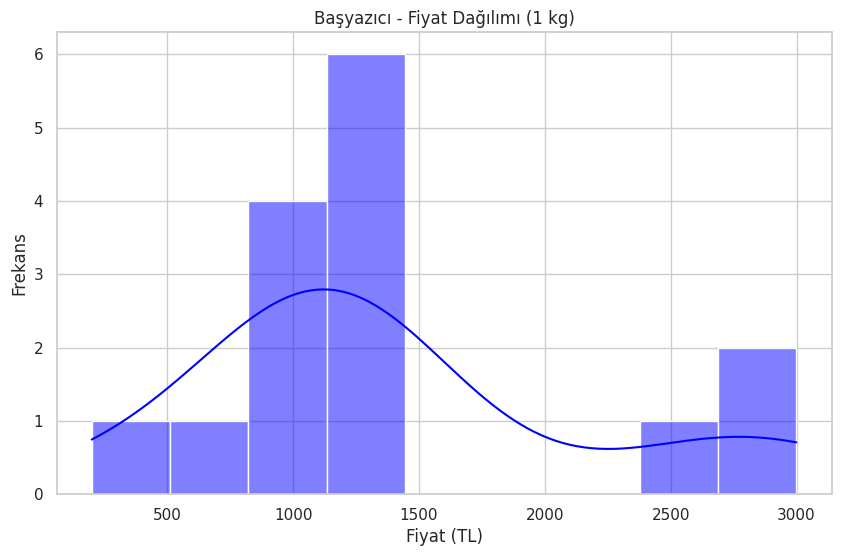

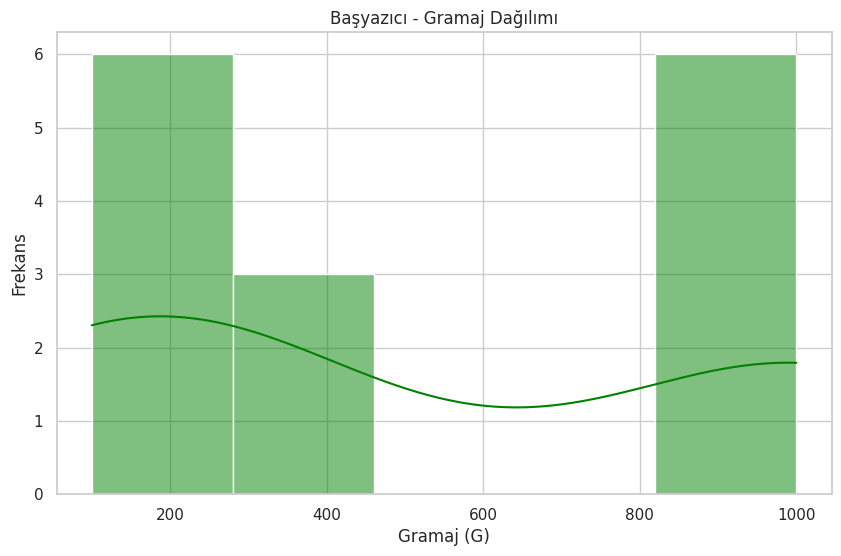

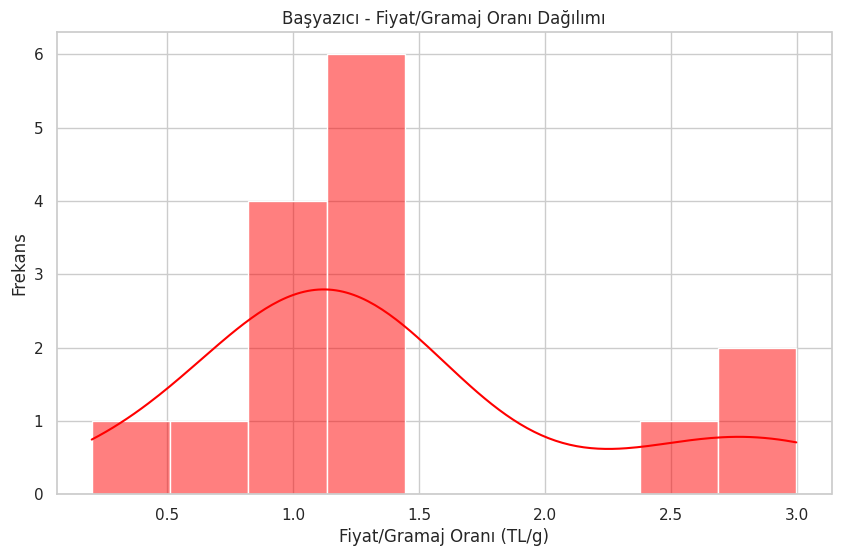

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Mr.No Analizi ===
Ortalama Fiyat (1 kg): 713.28 TL
Min Fiyat (1 kg): 555.56 TL, Max Fiyat (1 kg): 999.00 TL
Ortalama Gramaj: 121.43 g
Min Gramaj: 60.00 g, Max Gramaj: 185.00 g
Ortalama Fiyat/Gramaj Oranı: 0.7133 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Mr.No pazarda fiyat açısından uygun bir segmentte.


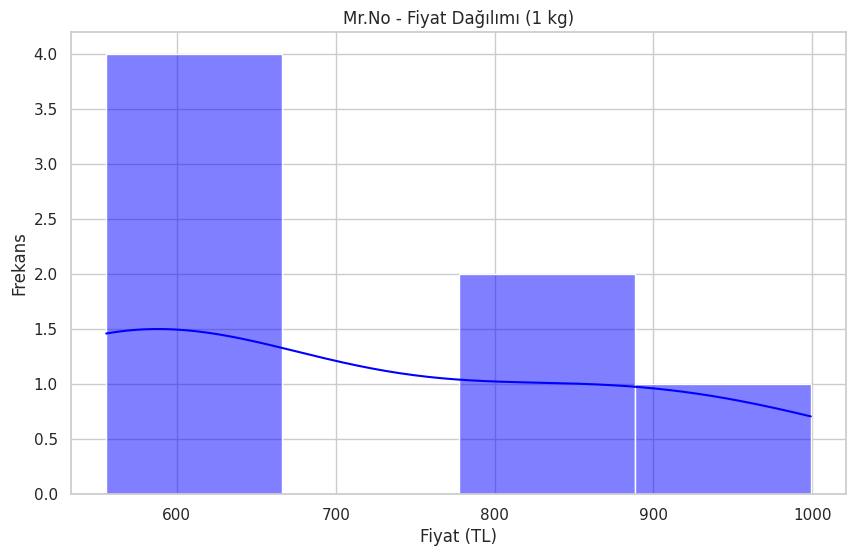

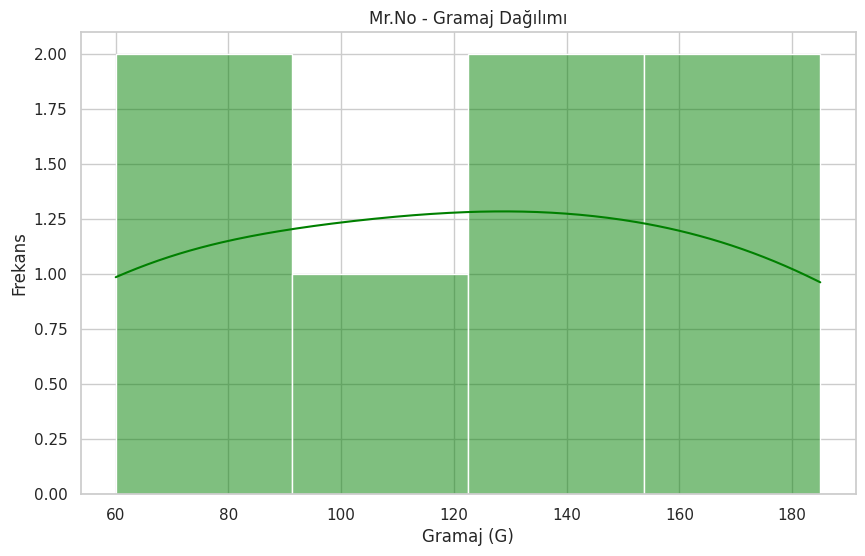

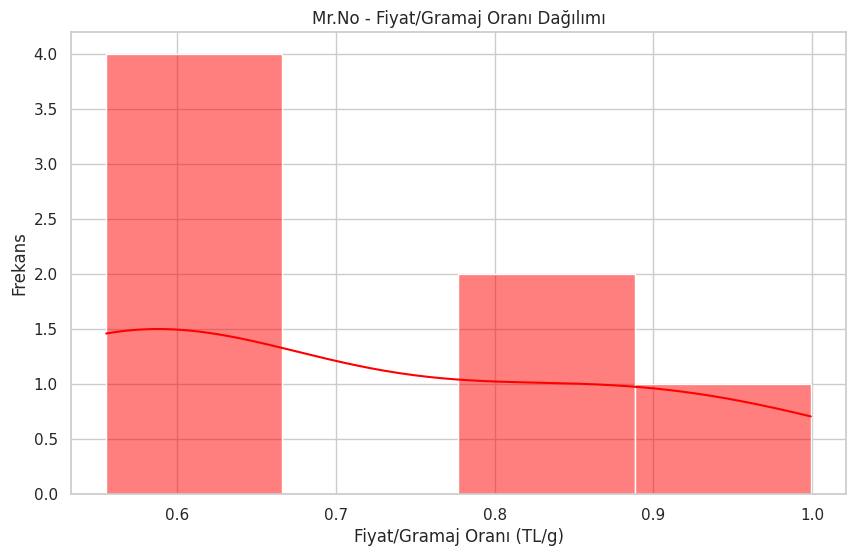

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Piliç Analizi ===
Ortalama Fiyat (1 kg): 370.06 TL
Min Fiyat (1 kg): 257.00 TL, Max Fiyat (1 kg): 483.12 TL
Ortalama Gramaj: 325.00 g
Min Gramaj: 250.00 g, Max Gramaj: 400.00 g
Ortalama Fiyat/Gramaj Oranı: 0.3701 TL/g
Ürün Çeşitliliği: 2 çeşit ürün
Piliç pazarda fiyat açısından uygun bir segmentte.


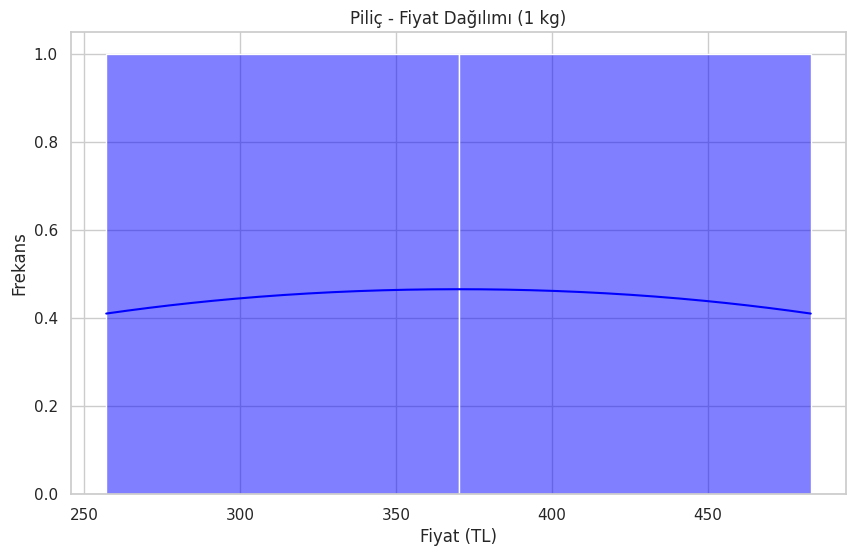

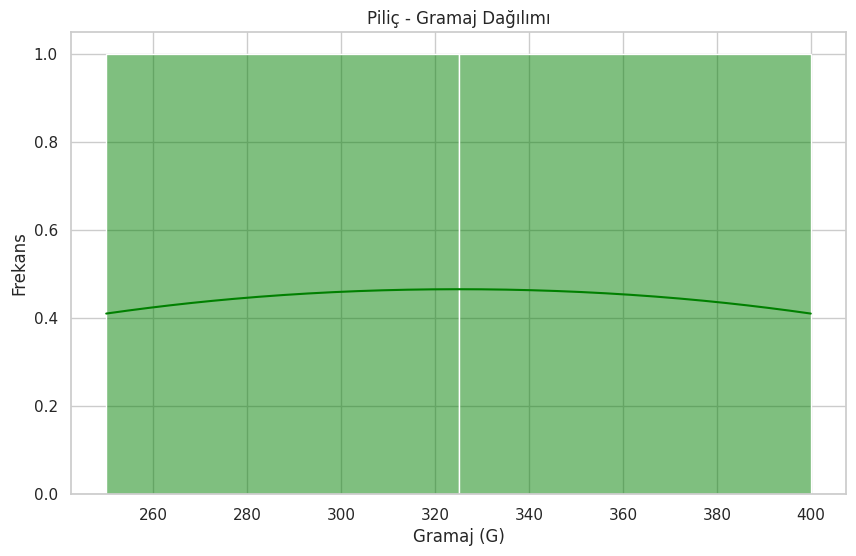

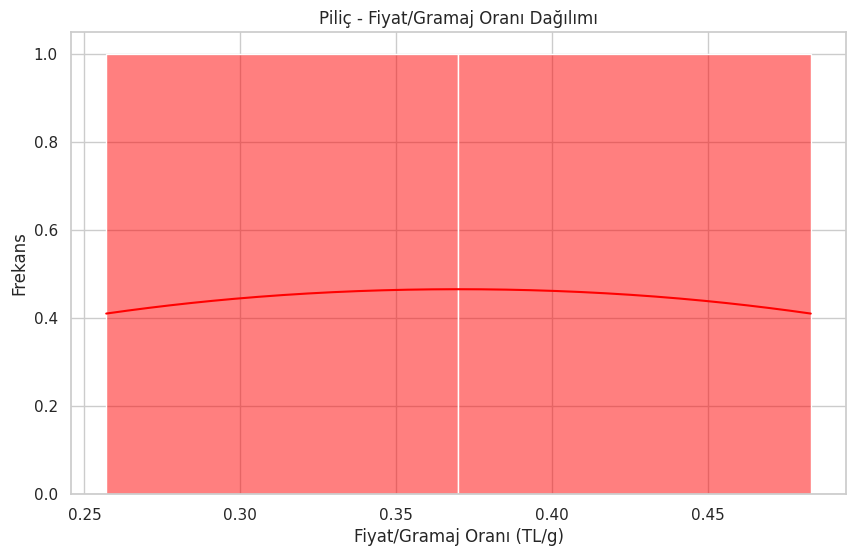

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Yayla Analizi ===
Ortalama Fiyat (1 kg): 1312.44 TL
Min Fiyat (1 kg): 1079.90 TL, Max Fiyat (1 kg): 1362.50 TL
Ortalama Gramaj: 622.86 g
Min Gramaj: 120.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.3124 TL/g
Ürün Çeşitliliği: 7 çeşit ürün
Yayla pazarda fiyat açısından premium bir segmentte.


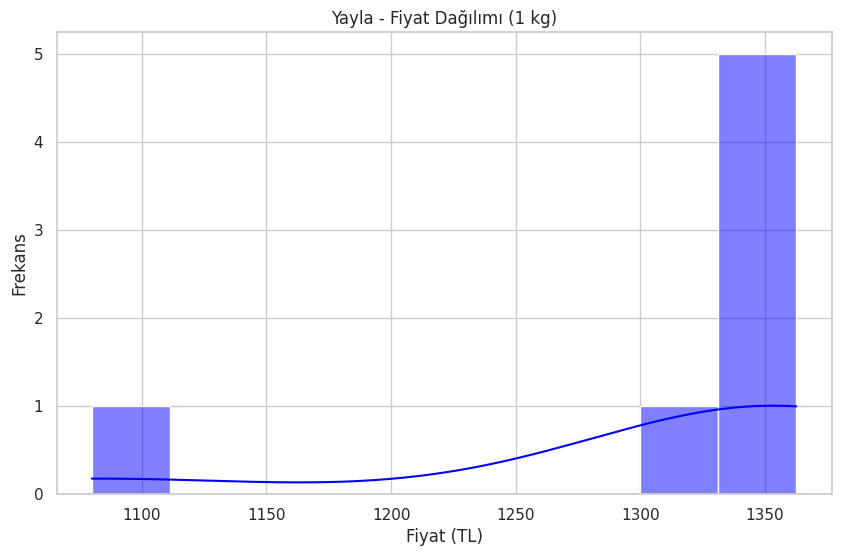

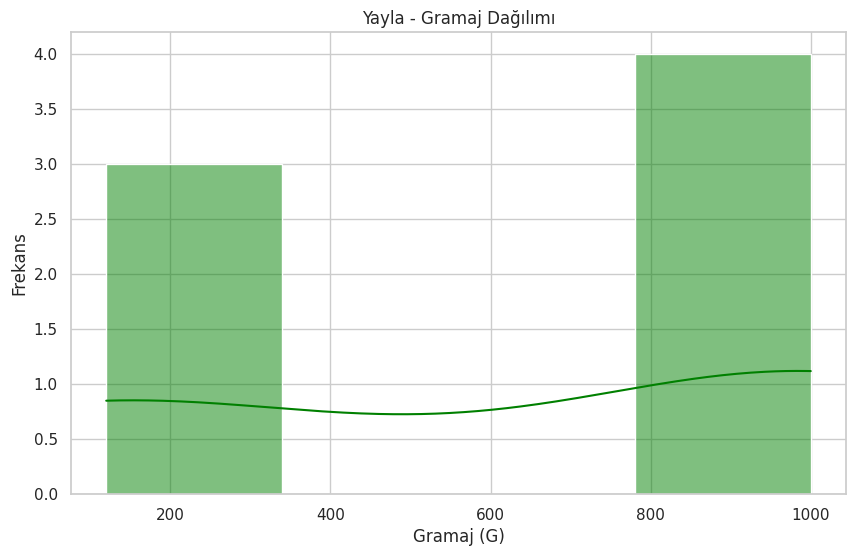

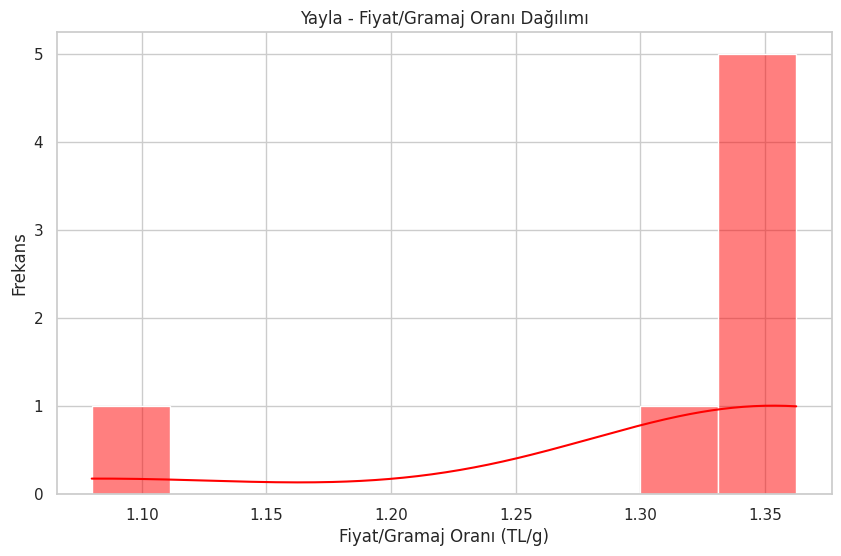

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Yaylatürk Analizi ===
Ortalama Fiyat (1 kg): 1159.90 TL
Min Fiyat (1 kg): 1159.90 TL, Max Fiyat (1 kg): 1159.90 TL
Ortalama Gramaj: 1000.00 g
Min Gramaj: 1000.00 g, Max Gramaj: 1000.00 g
Ortalama Fiyat/Gramaj Oranı: 1.1599 TL/g
Ürün Çeşitliliği: 1 çeşit ürün
Yaylatürk pazarda fiyat açısından premium bir segmentte.


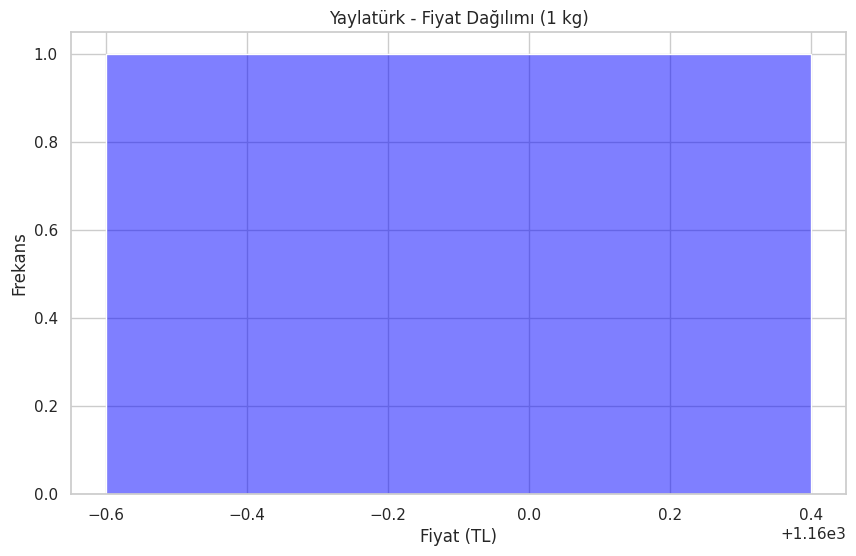

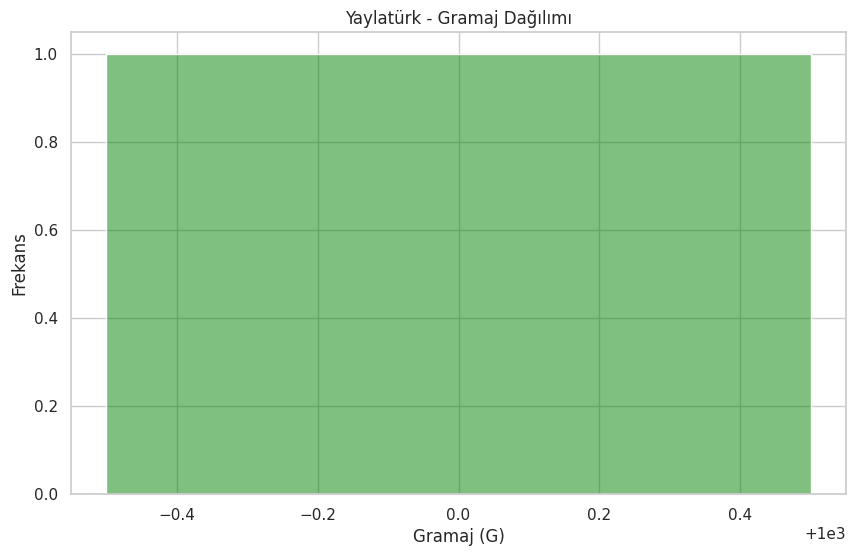

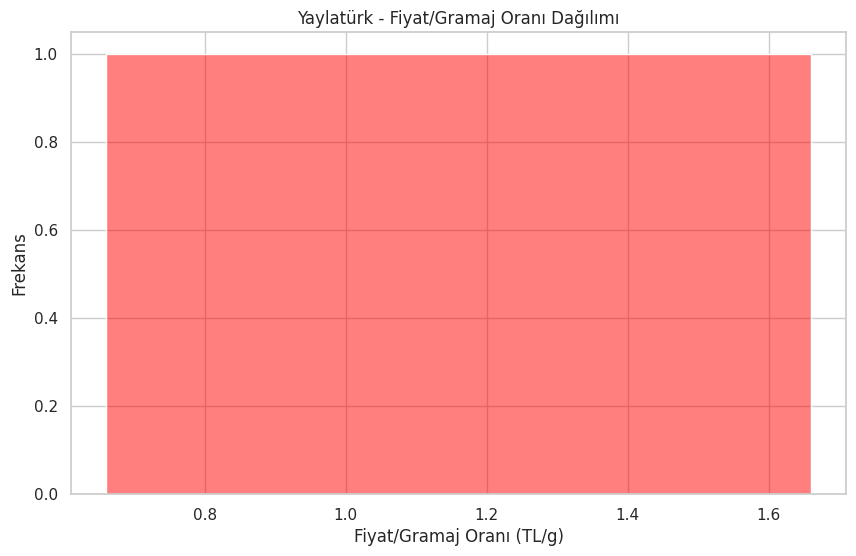

<ipython-input-39-c0c2a7ef545c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']


=== Dardanel Analizi ===
Ortalama Fiyat (1 kg): 635.76 TL
Min Fiyat (1 kg): 635.76 TL, Max Fiyat (1 kg): 635.76 TL
Ortalama Gramaj: 165.00 g
Min Gramaj: 165.00 g, Max Gramaj: 165.00 g
Ortalama Fiyat/Gramaj Oranı: 0.6358 TL/g
Ürün Çeşitliliği: 1 çeşit ürün
Dardanel pazarda fiyat açısından uygun bir segmentte.


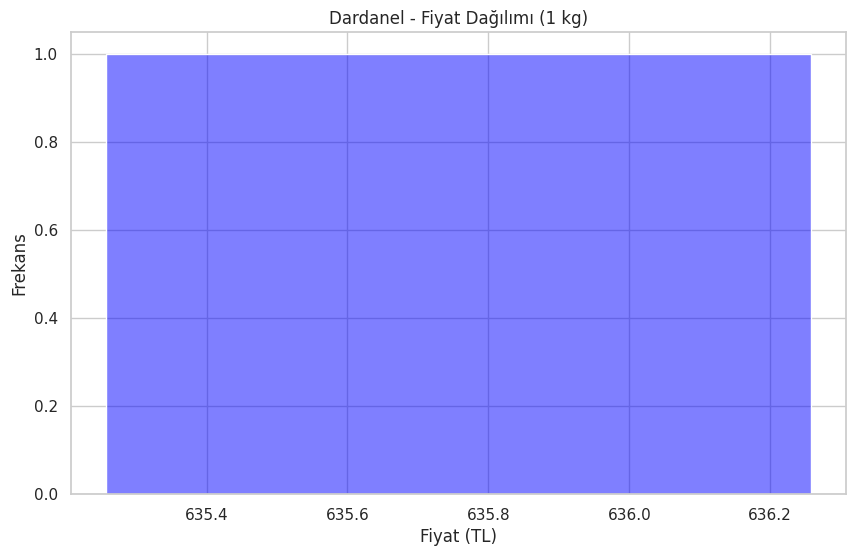

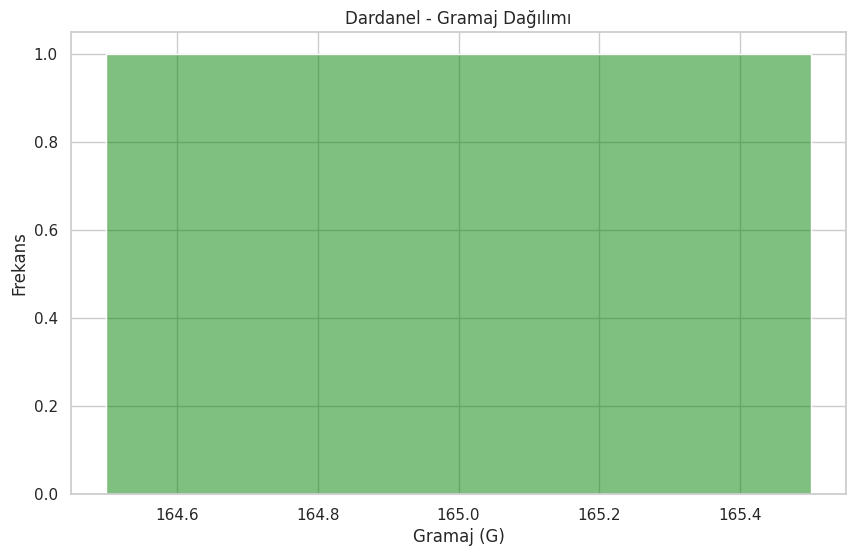

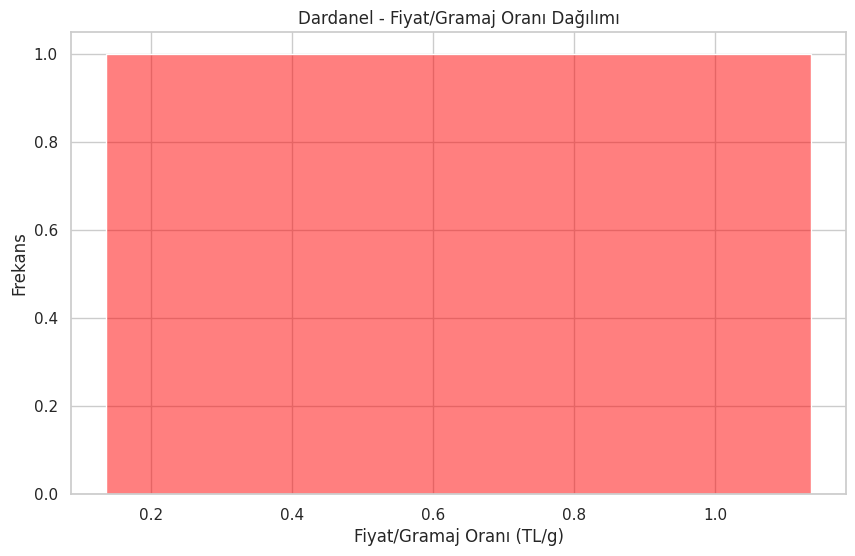

In [39]:
# Her marka için analiz fonksiyonu
def marka_analizi(df, marka):
    marka_df = df[df['Marka'] == marka]

    # 1. Fiyat Analizi
    ortalama_fiyat = marka_df['Fiyat/1000G'].mean()
    min_fiyat = marka_df['Fiyat/1000G'].min()
    max_fiyat = marka_df['Fiyat/1000G'].max()

    # 2. Gramaj Analizi
    ortalama_gramaj = marka_df['Gramaj (G)'].mean()
    min_gramaj = marka_df['Gramaj (G)'].min()
    max_gramaj = marka_df['Gramaj (G)'].max()

    # 3. Fiyat/Gramaj Oranı
    marka_df['Fiyat/Gramaj Oranı'] = marka_df['Fiyat'] / marka_df['Gramaj (G)']
    ortalama_fiyat_gramaj_orani = marka_df['Fiyat/Gramaj Oranı'].mean()

    # 4. Ürün Çeşitliliği
    urun_sayisi = marka_df['Ürün İsmi'].nunique()

    # 5. Piyasa Pozisyonu (Genel fiyat karşılaştırması)
    genel_ortalama_fiyat = df['Fiyat/1000G'].mean()

    print(f"=== {marka} Analizi ===")
    print(f"Ortalama Fiyat (1 kg): {ortalama_fiyat:.2f} TL")
    print(f"Min Fiyat (1 kg): {min_fiyat:.2f} TL, Max Fiyat (1 kg): {max_fiyat:.2f} TL")
    print(f"Ortalama Gramaj: {ortalama_gramaj:.2f} g")
    print(f"Min Gramaj: {min_gramaj:.2f} g, Max Gramaj: {max_gramaj:.2f} g")
    print(f"Ortalama Fiyat/Gramaj Oranı: {ortalama_fiyat_gramaj_orani:.4f} TL/g")
    print(f"Ürün Çeşitliliği: {urun_sayisi} çeşit ürün")

    if ortalama_fiyat > genel_ortalama_fiyat:
        print(f"{marka} pazarda fiyat açısından premium bir segmentte.")
    else:
        print(f"{marka} pazarda fiyat açısından uygun bir segmentte.")

    # Görselleştirme
    sns.set(style="whitegrid")

    # 1. Fiyat Dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(marka_df['Fiyat/1000G'], kde=True, color='blue')
    plt.title(f"{marka} - Fiyat Dağılımı (1 kg)")
    plt.xlabel('Fiyat (TL)')
    plt.ylabel('Frekans')
    plt.show()

    # 2. Gramaj Dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(marka_df['Gramaj (G)'], kde=True, color='green')
    plt.title(f"{marka} - Gramaj Dağılımı")
    plt.xlabel('Gramaj (G)')
    plt.ylabel('Frekans')
    plt.show()

    # 3. Fiyat/Gramaj Oranı Dağılımı
    plt.figure(figsize=(10, 6))
    sns.histplot(marka_df['Fiyat/Gramaj Oranı'], kde=True, color='red')
    plt.title(f"{marka} - Fiyat/Gramaj Oranı Dağılımı")
    plt.xlabel('Fiyat/Gramaj Oranı (TL/g)')
    plt.ylabel('Frekans')
    plt.show()

# Tüm markalar için analiz yapalım
markalar = df['Marka'].unique()

for marka in markalar:
    marka_analizi(df, marka)

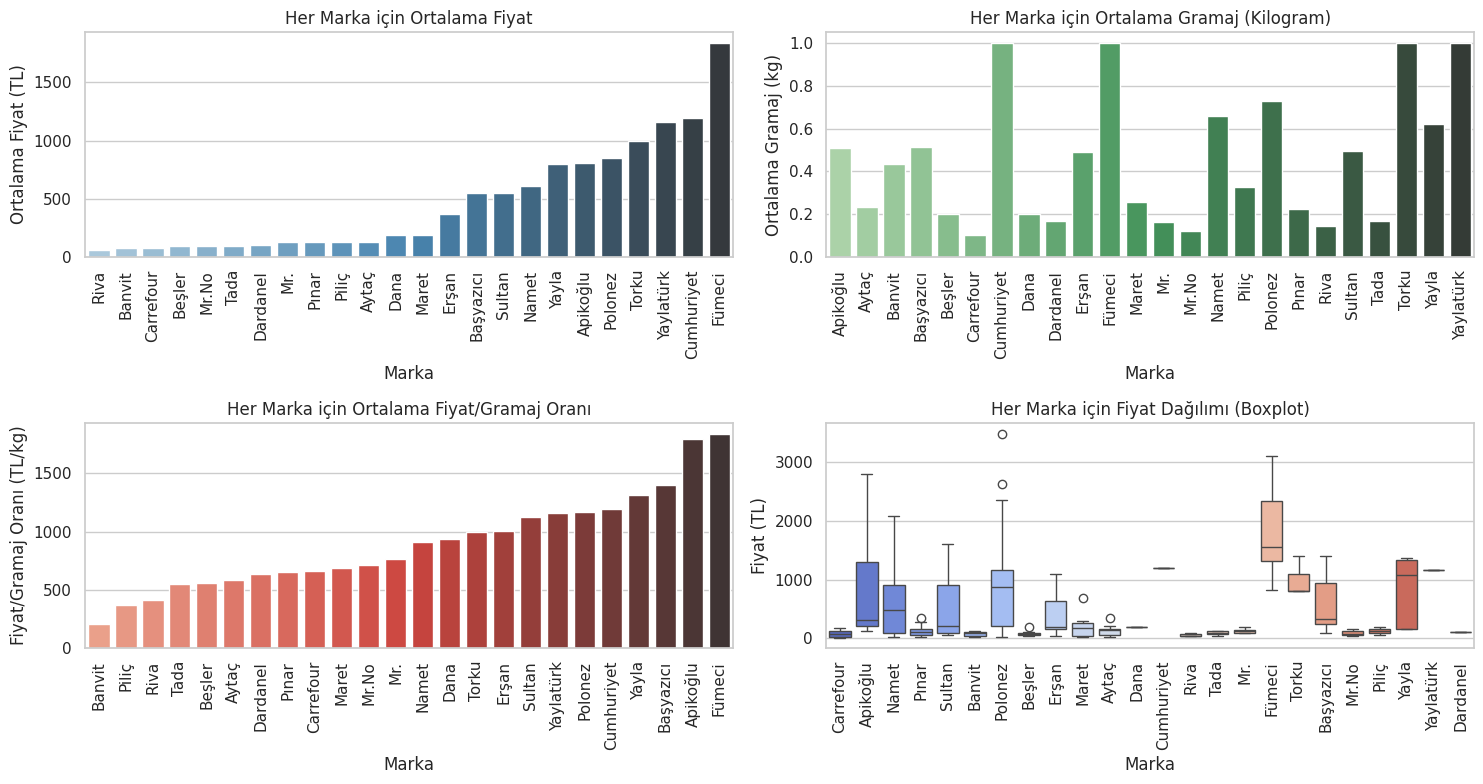

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def marka_gorsel_analizi(df):
    # Görselleştirme ayarları
    plt.figure(figsize=(15, 8))

    # Her marka için ortalama fiyat grafiği
    plt.subplot(2, 2, 1)
    ortalama_fiyat = df.groupby('Marka')['Fiyat'].mean().sort_values()
    sns.barplot(x=ortalama_fiyat.index, y=ortalama_fiyat.values, palette='Blues_d')
    plt.title('Her Marka için Ortalama Fiyat')
    plt.xticks(rotation=90)
    plt.ylabel('Ortalama Fiyat (TL)')

    # Her marka için ortalama gramaj grafiği (kilogram cinsinden)
    plt.subplot(2, 2, 2)
    ortalama_gramaj = df.groupby('Marka')['Gramaj (G)'].mean() / 1000  # Gramajı kilograma dönüştürüyoruz
    sns.barplot(x=ortalama_gramaj.index, y=ortalama_gramaj.values, palette='Greens_d')
    plt.title('Her Marka için Ortalama Gramaj (Kilogram)')
    plt.xticks(rotation=90)
    plt.ylabel('Ortalama Gramaj (kg)')

    # Her marka için Fiyat/Gramaj Oranı
    plt.subplot(2, 2, 3)
    df['Fiyat/Gramaj Oranı'] = df['Fiyat'] / (df['Gramaj (G)'] / 1000)  # Gramajı kilograma dönüştürüyoruz
    fiyat_gramaj_orani = df.groupby('Marka')['Fiyat/Gramaj Oranı'].mean().sort_values()
    sns.barplot(x=fiyat_gramaj_orani.index, y=fiyat_gramaj_orani.values, palette='Reds_d')
    plt.title('Her Marka için Ortalama Fiyat/Gramaj Oranı')
    plt.xticks(rotation=90)
    plt.ylabel('Fiyat/Gramaj Oranı (TL/kg)')

    # Her marka için fiyat dağılımı (Boxplot)
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Marka', y='Fiyat', data=df, palette='coolwarm')
    plt.title('Her Marka için Fiyat Dağılımı (Boxplot)')
    plt.xticks(rotation=90)
    plt.ylabel('Fiyat (TL)')

    # Grafiklerin düzenlenmesi ve gösterimi
    plt.tight_layout()
    plt.show()

# Fonksiyonu veri seti üzerinde çalıştır
marka_gorsel_analizi(df)